## CLEANING & FEATURE ENGINEERING

In [1]:
import copy
from seaborn.utils import os, np, plt, pd
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500,
             'display.precision', 2)

In [3]:
from project_methods import MSc_Proj as proj

In [4]:
# data_dir = 'PDS//'
# os.listdir(data_dir)

In [5]:
start = 'PDS' # folder name containing all enroll-HD CSV files

partic_dict = proj.load_participant_based()#start)
study_data_dict = proj.load_study_based()#start)
visit_data_dict = proj.load_visit_based()#start)

Starting search from: W:\MSc-AIDS-UoH\Trimester_3\Submit

Starting search from: W:\MSc-AIDS-UoH\Trimester_3\Submit

Starting search from: W:\MSc-AIDS-UoH\Trimester_3\Submit



In [6]:
display(partic_dict.keys(), study_data_dict.keys(), visit_data_dict.keys())

dict_keys(['profile', 'pharm', 'nonpharm', 'nutsup', 'comorbid'])

dict_keys(['participation', 'event'])

dict_keys(['enroll', 'registry', 'assessment', 'ad_hoc'])

In [7]:
part_key_vars = ['subjid', 'visitnum', 'studyid', 'hdcat_0', 'hdcat_l']
partic = study_data_dict['participation']
hd_participants = proj.get_hd_categories(partic)

display(partic.info(), hd_participants.keys(), list(map(len, hd_participants.values())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27665 entries, 0 to 27664
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subjid    27665 non-null  object 
 1   studyid   27665 non-null  object 
 2   study     27665 non-null  object 
 3   subjstat  27665 non-null  object 
 4   hdcat_0   25284 non-null  float64
 5   hdcat_l   25284 non-null  float64
 6   age_0     27665 non-null  object 
 7   rfstdy    27665 non-null  int64  
 8   rficdy    27363 non-null  float64
 9   rfendy    10478 non-null  float64
 10  dsterm    2972 non-null   float64
 11  evtnum    21116 non-null  float64
 12  visitnum  27665 non-null  int64  
 13  visit1    27665 non-null  object 
 14  visit2    21230 non-null  object 
 15  visit3    14705 non-null  object 
 16  visit4    9641 non-null   object 
 17  visit5    5691 non-null   object 
 18  visit6    2719 non-null   object 
 19  visit7    962 non-null    object 
 20  visit8    253 non-null    ob

None

dict_keys(['2. pre_manifest', '3. manifest', '4. gtype_negative', '5. fam_controls'])

[5468, 11598, 2639, 2357]

In [8]:
profile = partic_dict['profile']
display(profile.info(), profile)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21116 entries, 0 to 21115
Data columns (total 62 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subjid    21116 non-null  object 
 1   region    21116 non-null  object 
 2   sex       21116 non-null  object 
 3   race      21116 non-null  int64  
 4   handed    21116 non-null  int64  
 5   hxsid     18773 non-null  float64
 6   dssage    1011 non-null   float64
 7   dsplace   1010 non-null   float64
 8   dsend     1009 non-null   float64
 9   caghigh   21116 non-null  object 
 10  caglow    21116 non-null  object 
 11  momhd     18773 non-null  float64
 12  momagesx  9061 non-null   float64
 13  dadhd     18773 non-null  float64
 14  dadagesx  7941 non-null   float64
 15  fhx       21116 non-null  int64  
 16  ccmtr     18773 non-null  float64
 17  ccmtrage  12141 non-null  float64
 18  sxsubj    13332 non-null  float64
 19  sxsubjm   13176 non-null  float64
 20  sxs_m     1062 non-null   fl

None

,subjid,region,sex,race,handed,hxsid,dssage,dsplace,dsend,caghigh,caglow,momhd,momagesx,dadhd,dadagesx,fhx,ccmtr,ccmtrage,sxsubj,sxsubjm,sxs_m,sxs_c,sxs_p,sxs_o,sxfam,sxfamm,sxf_m,sxf_c,sxf_p,sxf_o,hddiagn,sxest,sxrater,sxestcfd,sxreas,sxgs,sxgsdy,sxraterm,sxr_m,sxr_c,sxr_p,sxr_o,ccdep,ccdepage,ccirb,ccirbage,ccvab,ccvabage,ccapt,ccaptage,ccpob,ccpobage,ccpsy,ccpsyage,ccpsyfh,cccog,cccogage,xgwas,xbsp,xpheno,xmorpho,ximage
0,R000024542,Northern America,m,1,1,0.0,NaN,NaN,NaN,44,19,1.0,50.0,0.0,NaN,1,1.0,42.0,42.0,1.0,NaN,NaN,NaN,NaN,42.0,1.0,NaN,NaN,NaN,NaN,47.0,1.0,42.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,46.0,0.0,NaN,0.0,NaN,1.0,46.0,0.0,NaN,NaN,0.0,NaN,1,0,0,0,0
1,R00010372X,Northern America,m,1,1,0.0,NaN,NaN,NaN,41,22,0.0,NaN,9999.0,NaN,1,1.0,61.0,60.0,6.0,1.0,NaN,1.0,NaN,60.0,6.0,1.0,NaN,1.0,NaN,64.0,1.0,60.0,2.0,NaN,NaN,NaN,6.0,1.0,NaN,1.0,NaN,1.0,59.0,1.0,59.0,1.0,59.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,1.0,63.0,1,0,0,0,0
2,R000147438,Europe,m,1,3,0.0,NaN,NaN,NaN,41,23,9999.0,NaN,9999.0,NaN,1,1.0,76.0,76.0,1.0,NaN,NaN,NaN,NaN,77.0,1.0,NaN,NaN,NaN,NaN,81.0,1.0,76.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,33.0,0.0,NaN,0.0,NaN,1.0,80.0,1.0,81.0,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0
3,R00021725X,Europe,f,1,1,0.0,NaN,NaN,NaN,38,24,1.0,55.0,0.0,NaN,1,0.0,NaN,9997.0,9997.0,NaN,NaN,NaN,NaN,9997.0,9997.0,NaN,NaN,NaN,NaN,9998.0,NaN,NaN,NaN,NaN,NaN,NaN,9997.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1,1,1,1,1
4,R00023946X,Europe,m,1,1,0.0,NaN,NaN,NaN,41,20,0.0,NaN,1.0,70.0,1,1.0,65.0,67.0,1.0,NaN,NaN,NaN,NaN,70.0,1.0,NaN,NaN,NaN,NaN,70.0,1.0,66.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,9997.0,1.0,71.0,1.0,75.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21111,R999841810,Europe,f,1,2,0.0,NaN,NaN,NaN,44,18,0.0,NaN,1.0,55.0,1,1.0,40.0,40.0,6.0,1.0,1.0,1.0,NaN,40.0,6.0,1.0,1.0,1.0,NaN,53.0,1.0,40.0,1.0,NaN,NaN,NaN,6.0,1.0,1.0,1.0,1.0,1.0,51.0,1.0,51.0,0.0,NaN,1.0,51.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0
21112,R999891140,Europe,m,1,1,0.0,NaN,NaN,NaN,40,26,0.0,NaN,1.0,65.0,1,1.0,59.0,60.0,6.0,1.0,NaN,1.0,NaN,60.0,1.0,NaN,NaN,NaN,NaN,61.0,1.0,60.0,1.0,NaN,NaN,NaN,6.0,1.0,NaN,1.0,NaN,1.0,62.0,1.0,60.0,0.0,NaN,1.0,62.0,1.0,62.0,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0
21113,R99990772X,Europe,m,1,2,1.0,NaN,NaN,NaN,41,24,0.0,NaN,0.0,NaN,1,1.0,67.0,67.0,1.0,NaN,NaN,NaN,NaN,67.0,1.0,NaN,NaN,NaN,NaN,68.0,1.0,67.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,47.0,1.0,66.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1,0,0,0,0
21114,R999989129,Europe,m,1,1,0.0,NaN,NaN,NaN,45,19,1.0,36.0,0.0,NaN,1,1.0,34.0,33.0,1.0,NaN,NaN,NaN,NaN,33.0,1.0,NaN,NaN,NaN,NaN,35.0,1.0,33.0,9998.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,38.0,0.0,NaN,0.0,NaN,1.0,38.0,0.0,NaN,0.0,NaN,NaN,1.0,40.0,1,0,0,0,0


In [9]:
prof_key_vars = ['subjid', 'sex', 'ccdep', 'ccdepage', 'cccog', 'cccogage', 'ccapt', 'ccaptage', 
                 'ccmtr', 'ccmtrage', 'caghigh', 'caglow']
display(profile[prof_key_vars])
# profile_hd_categs = proj.hd_categorize_df(partic, profile)
# display(profile_hd_categs.keys(), list(map(pd.DataFrame.info, profile_hd_categs.values())))

,subjid,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow
0,R000024542,m,0.0,NaN,0.0,NaN,0.0,NaN,1.0,42.0,44,19
1,R00010372X,m,1.0,59.0,1.0,63.0,0.0,NaN,1.0,61.0,41,22
2,R000147438,m,1.0,33.0,0.0,NaN,1.0,80.0,1.0,76.0,41,23
3,R00021725X,f,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,38,24
4,R00023946X,m,0.0,NaN,0.0,NaN,1.0,75.0,1.0,65.0,41,20
...,...,...,...,...,...,...,...,...,...,...,...,...
21111,R999841810,f,1.0,51.0,0.0,NaN,1.0,51.0,1.0,40.0,44,18
21112,R999891140,m,1.0,62.0,0.0,NaN,1.0,62.0,1.0,59.0,40,26
21113,R99990772X,m,1.0,47.0,0.0,NaN,0.0,NaN,1.0,67.0,41,24
21114,R999989129,m,1.0,38.0,1.0,40.0,1.0,38.0,1.0,34.0,45,19


In [10]:
# cond = ((profile['ccmtrage'].isna()) |
#         (profile['ccdepage'].isna()) |
#         (profile['ccaptage'].isna()) |
#         (profile['cccogage'].isna()))

# profile[prof_key_vars].loc[cond]

In [11]:
proj.null_checker(profile[prof_key_vars])

subjid          0
sex             0
caghigh         0
caglow          0
ccdep        2343
cccog        2343
ccapt        2343
ccmtr        2343
ccmtrage     8975
ccdepage     9291
ccaptage    12122
cccogage    13994
dtype: int64

In [12]:
pharm = partic_dict['pharm']
display(pharm.info(), pharm)
# pharm_hd_categs = proj.hd_categorize_df(partic, pharm)
# display(pharm_hd_categs.keys(), list(map(pd.DataFrame.info, pharm_hd_categs.values())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110269 entries, 0 to 110268
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   subjid          110269 non-null  object 
 1   cmtrt__modify   110269 non-null  object 
 2   cmtrt__decod    110269 non-null  object 
 3   cmtrt__ing      110265 non-null  object 
 4   cmtrt__atc      110265 non-null  object 
 5   cmindc__modify  109825 non-null  object 
 6   cmindc__decod   110259 non-null  object 
 7   cmdostot        108796 non-null  float64
 8   cmdose__cmdosu  110267 non-null  object 
 9   cmdosfrq        110269 non-null  int64  
 10  cmroute         110269 non-null  int64  
 11  cmstdy          110269 non-null  int64  
 12  cmenrf          110269 non-null  int64  
 13  cmendy          46791 non-null   float64
dtypes: float64(2), int64(4), object(8)
memory usage: 11.8+ MB


None

,subjid,cmtrt__modify,cmtrt__decod,cmtrt__ing,cmtrt__atc,cmindc__modify,cmindc__decod,cmdostot,cmdose__cmdosu,cmdosfrq,cmroute,cmstdy,cmenrf,cmendy
0,R000024542,Xenazine,RX000090013,Tetrabenazine,N07XX,Chorea,CX997675208,37.50,milligram,1,1,0,0,283.0
1,R000024542,Aleve,RX000126663,Naproxen sodium,"G02CC,M01AE,M02AA",Back pain,CX862962203,440.00,milligram,1,1,-400,0,1045.0
2,R000024542,Xenazine,RX000090013,Tetrabenazine,N07XX,Chorea,CX997675208,100.00,milligram,1,1,283,0,1198.0
3,R000024542,Celexa,RX000069660,Citalopram hydrobromide,N06AB,Anxiety,CX797206714,20.00,milligram,1,1,194,1,NaN
4,R000024542,Clonazepam,RX000134155,Clonazepam,"N03AE,N05BA",Insomnia,CX959836908,0.25,milligram,1,1,-355,0,1061.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110264,R999989129,Escitalopram,RX000127620,Escitalopram,N06AB,Depression,CX875727542,5.00,milligram,1,1,-2142,0,-1489.0
110265,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,12.50,milligram,1,1,-1994,0,-1835.0
110266,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,12.50,milligram,1,1,-1834,0,-1645.0
110267,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,25.00,milligram,1,1,-1644,1,NaN


In [13]:
# swallowing therapy
# cmtrt == 6
nonpharm_key_vars = ['subjid', 'cmtrt', 'cmfrq', 'cmdosfrq']
nonpharm = partic_dict['nonpharm']
display(nonpharm.info(), nonpharm[nonpharm_key_vars])
# nonpharm_hd_categs = proj.hd_categorize_df(partic, nonpharm)
# display(nonpharm_hd_categs.keys(), list(map(pd.DataFrame.info, nonpharm_hd_categs.values())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15553 entries, 0 to 15552
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subjid    15553 non-null  object 
 1   cmtrt     15553 non-null  int64  
 2   cmfrq     15553 non-null  float64
 3   cmdosfrq  15553 non-null  int64  
 4   cmstdy    15553 non-null  int64  
 5   cmenrf    15553 non-null  int64  
 6   cmendy    5644 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 850.7+ KB


None

,subjid,cmtrt,cmfrq,cmdosfrq
0,R000024542,1,3.0,2
1,R000147438,1,2.0,2
2,R00023946X,1,1.0,2
3,R00023946X,1,3.0,2
4,R00023946X,1,4.0,2
...,...,...,...,...
15548,R99990772X,1,1.0,2
15549,R999989129,1,2.0,2
15550,R999989129,5,2.0,2
15551,R999989129,3,2.0,2


In [14]:
# high calorie supplements
# cmcat == 7
nutsuppl_key_vars = ['subjid', 'cmcat',  'cmstdy', 'cmenrf', 'cmendy']
guide = {'cmcat':'supplement'}
nutsup = partic_dict['nutsup']#.rename(columns=guide)
display(nutsup.info(), nutsup[nutsuppl_key_vars])
# nutsup_hd_categs = proj.hd_categorize_df(partic, nutsup)
# display(nutsup_hd_categs.keys(), list(map(pd.DataFrame.info, nutsup_hd_categs.values())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23261 entries, 0 to 23260
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subjid         23261 non-null  object 
 1   cmcat          23261 non-null  int64  
 2   cmtrt__modify  23261 non-null  object 
 3   cmtrt__decod   23261 non-null  object 
 4   cmtrt__atc     23261 non-null  object 
 5   cmtrt__ing     23261 non-null  object 
 6   cmdostot       23261 non-null  float64
 7   cmdosunit      23261 non-null  int64  
 8   cmdosfrq       23261 non-null  int64  
 9   cmstdy         23261 non-null  int64  
 10  cmenrf         23261 non-null  int64  
 11  cmendy         5812 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


None

,subjid,cmcat,cmstdy,cmenrf,cmendy
0,R000024542,1,330,1,NaN
1,R00010372X,1,-1490,1,NaN
2,R00010372X,1,-137,1,NaN
3,R00010372X,1,-759,1,NaN
4,R00010372X,1,1955,1,NaN
...,...,...,...,...,...
23256,R999820346,1,807,1,NaN
23257,R999841810,1,-172,1,NaN
23258,R999993234,1,370,0,737.0
23259,R999993234,1,737,0,1050.0


In [15]:
comb_key_vars = ['subjid', 'mhbodsys']
comb = partic_dict['comorbid']
display(comb.info(), comb[comb_key_vars], proj.get_gastroint_issues(comb[comb_key_vars[-1]]))
# comb_hd_categs = proj.hd_categorize_df(partic, comb)
# display(comb_hd_categs.keys(), list(map(pd.DataFrame.info, comb_hd_categs.values())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82320 entries, 0 to 82319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subjid          82320 non-null  object 
 1   mhterm__modify  82320 non-null  object 
 2   mhterm__decod   82320 non-null  object 
 3   mhbodsys        82320 non-null  int64  
 4   mhstdy          82320 non-null  int64  
 5   mhenrf          82320 non-null  int64  
 6   mhendy          33557 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.4+ MB


None

,subjid,mhbodsys
0,R000024542,14
1,R000024542,12
2,R000024542,13
3,R000024542,3
4,R000024542,11
...,...,...
82315,R999993234,14
82316,R999993234,8
82317,R999993234,13
82318,R999993234,8


0        0
1        0
2        0
3        0
4        0
        ..
82315    0
82316    0
82317    0
82318    0
82319    0
Name: mhbodsys, Length: 82320, dtype: int64

In [16]:
enroll = visit_data_dict['enroll']
display(enroll.info(), enroll)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67096 entries, 0 to 67095
Columns: 305 entries, subjid to dpdy
dtypes: float64(298), int64(2), object(5)
memory usage: 156.1+ MB


None

,subjid,studyid,seq,visit,visdy,visstat,age,hdcat,hxalcab,hxtobab,hxtobcpd,hxtobyos,hxpacky,hxdrugab,hxmar,hxmarfrq,hxher,hxherfrq,hxcoc,hxcocfrq,hxclb,hxclbfrq,hxamp,hxampfrq,hxrit,hxritfrq,hxhal,hxhalfrq,hxinh,hxinhfrq,hxopi,hxopifrq,hxpak,hxpakfrq,hxbar,hxbarfrq,hxtrq,hxtrqfrq,height,weight,bmi,alcab,alcunits,tobab,tobcpd,tobyos,packy,cafab,cafpd,drugab,mar,marfrq,her,herfrq,coc,cocfrq,clb,clbfrq,amp,ampfrq,rit,ritfrq,hal,halfrq,inh,inhfrq,opi,opifrq,pak,pakfrq,bar,barfrq,trq,trqfrq,updsc,maristat,res,isced,jobclas,jobpaid,rdcwk,rdcwkd,rdcwkhw,emplnrsn,emplnrd,ssdb,rtrnwk,rtrddur,updmed,updmh,updhdh,updfh,motscore,miscore,ocularh,ocularv,sacinith,sacinitv,sacvelh,sacvelv,dysarth,tongue,fingtapr,fingtapl,prosupr,prosupl,luria,rigarmr,rigarml,brady,dysttrnk,dystrue,dystlue,dystrle,dystlle,chorface,chorbol,chortrnk,chorrue,chorlue,chorrle,chorlle,gait,tandem,retropls,diagconf,tfcscore,occupatn,finances,chores,adl,carelevl,fascore,fiscore,emplusl,emplany,volunt,fafinan,grocery,cash,supchild,drive,housewrk,laundry,prepmeal,telephon,ownmeds,feedself,dress,bathe,pubtrans,walknbr,walkfall,walkhelp,comb,trnchair,bed,toilet,carehome,indepscl,gen1,gen2,gen3,gen4,gen5,gen6,sdmt,sdmt1,sdmt2,sdmtnd,verfct,verfctd,verfct5,verfct6,verfct7,verfctnd,scnt,scnt1,scnt2,scnt3,scntnd,swrt,swrt1,swrt2,swrt3,swrtnd,sit,sit1,sit2,sit3,trl,trla1,trla2,trla3,trlb1,trlb2,trlb3,verflt,verflt05,verflt06,verflt07,mmsetotal,tug,tug1,scst,scst1,depscore,irascore,psyscore,aptscore,exfscore,pbas1sv,pbas1fr,pbas1wo,pbas2sv,pbas2fr,pbas2wo,pbas3sv,pbas3fr,pbas3wo,pbas4sv,pbas4fr,pbas4wo,pbas5sv,pbas5fr,pbas5wo,pbas6sv,pbas6fr,pbas6wo,pbas7sv,pbas7fr,pbas7wo,pbas8sv,pbas8fr,pbas8wo,pbas9sv,pbas9fr,pbas9wo,pbas10sv,pbas10sm__1,pbas10sm__2,pbas10sm__3,pbas10sm__4,pbas10sm__5,pbas10fr,pbas10wo,pbas11sv,pbas11fr,pbas11wo,pbainfo,pbahshd,scoring,pf,rp,bp,gh,vt,sf,re,mh,pcs,mcs,anxscore,hads_depscore,irrscore,outscore,inwscore,wpaiscr1,wpaiscr2,wpaiscr3,wpaiscr4,sid1,sid2,sid3,sid4,sid5,int1,int2,int3,int4,int5,int6,sbh1,sbh1n,sbh2,sbh3,sbh3n,sbh4,sbh4n,sbh5,sbh6,sbh7,attmpt1dy,attmpt11,attmpt12,attmpt2dy,attmpt21,attmpt22,attmpt3dy,attmpt31,attmpt32,mvsrc,mvrsn,crlvl,dpdy
0,R000024542,ENR,1,Baseline,0,completed,48,3.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.4,67.9,19.8,1.0,9998.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,4.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,28.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,11.0,2.0,2.0,2.0,3.0,2.0,24.0,24.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,95.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,21.0,1.0,NaN,1.0,1.0,11.0,0.0,1.0,NaN,1.0,43.0,0.0,0.0,NaN,1.0,45.0,0.0,3.0,NaN,1.0,21.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.0,0.0,25.0,NaN,NaN,NaN,NaN,8.0,10.0,0.0,1.0,6.0,0.0,0.0,9997.0,0.0,0.0,9997.0,2.0,4.0,9997.0,3.0,2.0,9997.0,2.0,2.0,9997.0,1.0,1.0,9997.0,2.0,3.0,9997.0,0.0,0.0,9997.0,0.0,0.0,9997.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,9997.0,0.0,0.0,9997.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R000024542,ENR,2,Follow Up,371,completed,49,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,67.2,19.6,1.0,9998.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,32.0,32.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,11.0,2.0,2.

#### Engineer chorea_score (Max of 28)
to indicate if a participant is exhibiting chorea in any part of the body (face, trunk, etc)<br>
{0:'absent', 
1:'slight/intermittent', 
2:'mild/common or moderate/intermittent', 
3:'moderate/common',
4:'marked/prolonged'}

In [17]:
chorea_vars = proj.get_columns_with_pattern(enroll, 'chor').drop('chores', axis=1)
display(chorea_vars)
chorea_indicator = pd.Series(chorea_vars.sum(axis=1),
                             name='chorea_score')
display(chorea_indicator)
enroll = pd.concat([enroll, chorea_indicator], axis=1)
display(enroll['chorea_score'])

,chorface,chorbol,chortrnk,chorrue,chorlue,chorrle,chorlle
0,2.0,1.0,2.0,2.0,2.0,1.0,1.0
1,2.0,2.0,2.0,1.0,1.0,1.0,1.0
2,2.0,2.0,3.0,4.0,4.0,3.0,3.0
3,2.0,2.0,3.0,3.0,2.0,3.0,3.0
4,3.0,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...
67091,1.0,2.0,2.0,1.0,1.0,2.0,2.0
67092,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67093,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67094,0.0,1.0,1.0,0.0,0.0,0.0,0.0


0        11.0
1        10.0
2        21.0
3        18.0
4        17.0
         ... 
67091    11.0
67092     0.0
67093     1.0
67094     2.0
67095     0.0
Name: chorea_score, Length: 67096, dtype: float64

0        11.0
1        10.0
2        21.0
3        18.0
4        17.0
         ... 
67091    11.0
67092     0.0
67093     1.0
67094     2.0
67095     0.0
Name: chorea_score, Length: 67096, dtype: float64

,subjid,studyid,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,prepmeal,feedself,grocery,sdmt1,verfct5,scnt1,swrt1,depscore,aptscore,exfscore,irascore,psyscore
0,R000024542,ENR,3.0,67.9,185.4,19.8,1,0,48,11.0,28.0,28.0,95.0,24.0,24.0,11.0,1.0,1.0,1.0,21.0,11.0,43.0,45.0,8.0,1.0,6.0,10.0,0.0
1,R000024542,ENR,3.0,67.2,185.0,19.6,2,371,49,10.0,32.0,32.0,80.0,22.0,22.0,11.0,1.0,1.0,1.0,12.0,9.0,31.0,32.0,4.0,3.0,8.0,0.0,0.0
2,R000024542,ENR,3.0,65.4,185.0,19.1,3,734,50,21.0,45.0,45.0,75.0,20.0,20.0,11.0,0.0,1.0,0.0,9.0,6.0,53.0,26.0,3.0,2.0,2.0,0.0,0.0
3,R000024542,ENR,3.0,63.8,185.0,18.6,4,1098,51,18.0,45.0,45.0,65.0,12.0,12.0,8.0,0.0,1.0,0.0,12.0,6.0,16.0,23.0,0.0,9.0,2.0,0.0,0.0
4,R000024542,ENR,3.0,62.5,185.0,18.3,5,1469,52,17.0,47.0,47.0,70.0,15.0,15.0,6.0,1.0,1.0,0.0,1.0,6.0,9.0,11.0,0.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,ENR,3.0,73.0,180.0,22.5,1,0,44,11.0,32.0,32.0,80.0,20.0,20.0,9.0,1.0,1.0,1.0,27.0,16.0,51.0,61.0,0.0,6.0,6.0,12.0,0.0
67092,R999993234,ENR,2.0,57.0,168.0,20.2,1,0,47,0.0,0.0,0.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,50.0,23.0,72.0,97.0,0.0,0.0,0.0,1.0,0.0
67093,R999993234,ENR,2.0,57.3,167.6,20.4,2,380,48,1.0,1.0,1.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,48.0,18.0,74.0,99.0,0.0,0.0,8.0,1.0,0.0
67094,R999993234,ENR,2.0,57.0,167.0,20.4,3,777,49,2.0,2.0,2.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,40.0,20.0,80.0,100.0,0.0,0.0,6.0,2.0,0.0


subjid              0
studyid             0
seq                 0
visdy               0
age                 0
chorea_score        0
weight          10917
height          10917
hdcat           10918
grocery         10973
feedself        10973
indepscl        10973
prepmeal        10973
miscore         11044
fiscore         11051
tfcscore        11115
irascore        11255
motscore        11423
aptscore        11622
depscore        11638
psyscore        11679
exfscore        11738
fascore         12030
bmi             12379
verfct5         12949
scnt1           13497
swrt1           13624
sdmt1           14995
dtype: int64

No handles with labels found to put in legend.



Only columns with null values are included

In percentage

Only columns with null values are included


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2281: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})


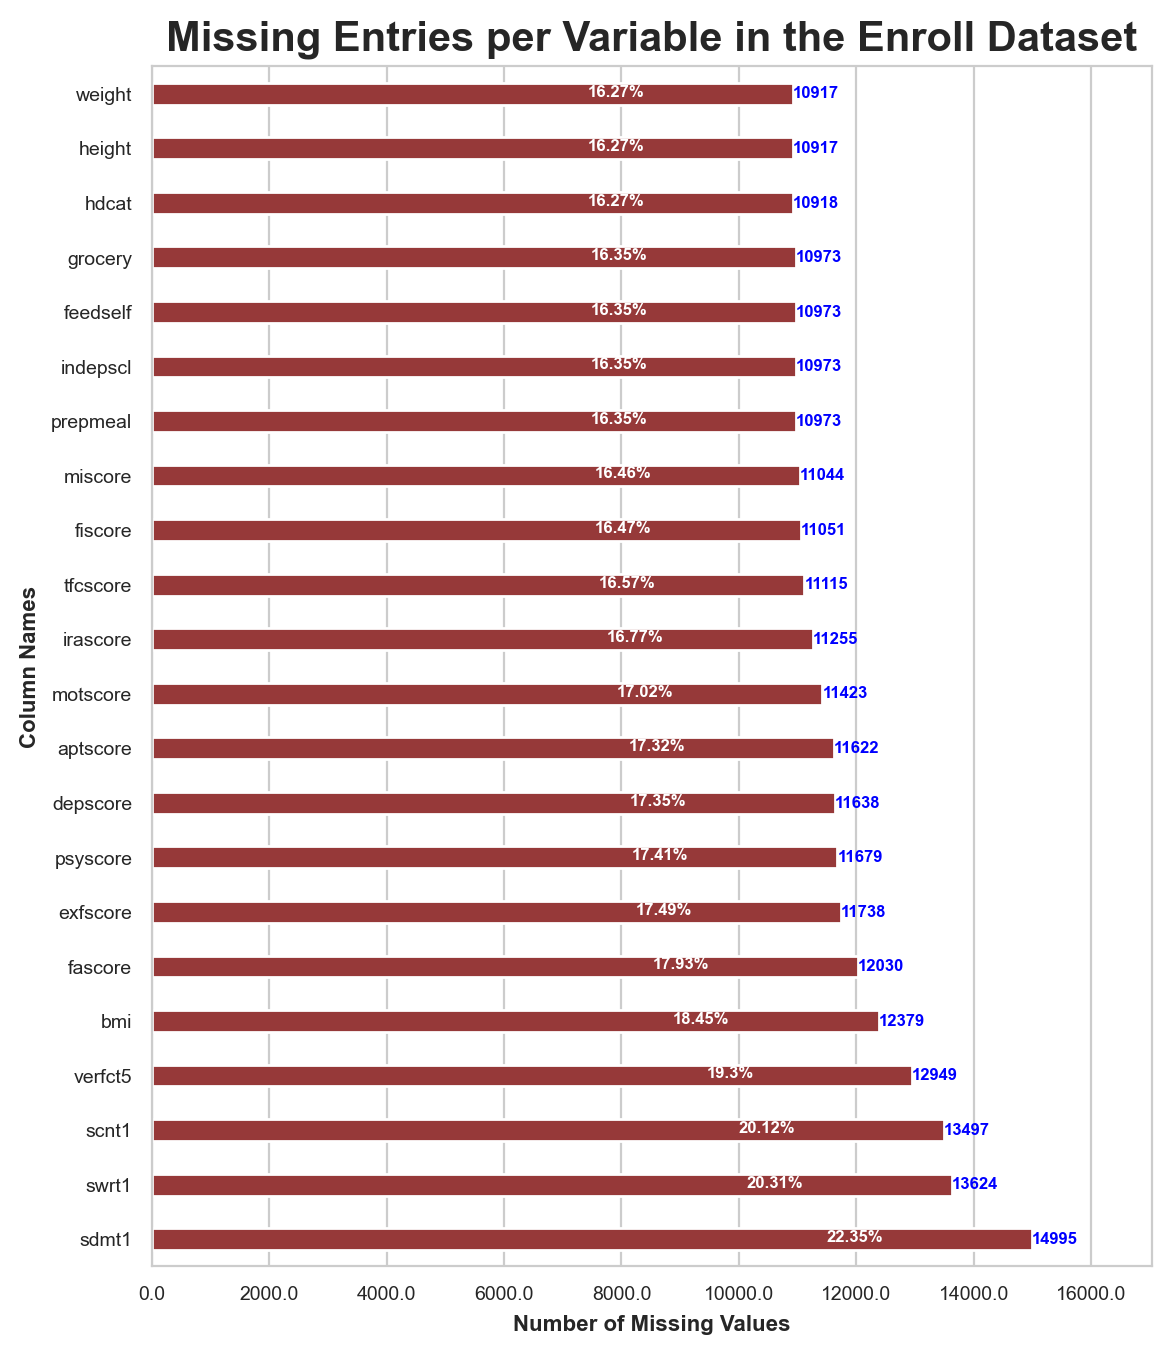

In [18]:
# hd_stat = partic[['subjid', 'studyid', 'hdcat_0', 'hdcat_l']]
# enroll = pd.merge(hd_stat, enroll, on=['subjid', 'studyid'])
enr_key_vars = ['subjid', 'studyid', 'hdcat', 'weight', 'height', 'bmi', 'seq', 'visdy', 'age', 'chorea_score',
                'motscore', 'miscore', 'indepscl','fiscore', 'fascore', 'tfcscore', 'prepmeal', 'feedself', 
                'grocery', 'sdmt1', 'verfct5', 'scnt1', 'swrt1', 'depscore', 'aptscore', 'exfscore', 'irascore',
                'psyscore']
display(enroll[enr_key_vars], proj.null_checker(enroll[enr_key_vars]))
proj.visualize_nulls(enroll[enr_key_vars], plot_title='Missing Entries per Variable in the Enroll Dataset', use_bar=True,
                     include_perc=True, perc_total=enroll.shape[0], perc_labe_gap=-3500, h_labe_shift=-0.45,
                     perc_labe_color='white', reduce_barw_by=2, fig_size=(5, 6))
# display(proj.compare_variables(enroll[enr_key_vars[2]], enroll[enr_key_vars[1]], where_equal=False))#.sample(10))

### MERGE RECORDS

In [19]:
# join profile to enroll
enrl = pd.merge(profile[prof_key_vars], enroll[enr_key_vars], on='subjid')
enrl

,subjid,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,studyid,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,prepmeal,feedself,grocery,sdmt1,verfct5,scnt1,swrt1,depscore,aptscore,exfscore,irascore,psyscore
0,R000024542,m,0.0,NaN,0.0,NaN,0.0,NaN,1.0,42.0,44,19,ENR,3.0,67.9,185.4,19.8,1,0,48,11.0,28.0,28.0,95.0,24.0,24.0,11.0,1.0,1.0,1.0,21.0,11.0,43.0,45.0,8.0,1.0,6.0,10.0,0.0
1,R000024542,m,0.0,NaN,0.0,NaN,0.0,NaN,1.0,42.0,44,19,ENR,3.0,67.2,185.0,19.6,2,371,49,10.0,32.0,32.0,80.0,22.0,22.0,11.0,1.0,1.0,1.0,12.0,9.0,31.0,32.0,4.0,3.0,8.0,0.0,0.0
2,R000024542,m,0.0,NaN,0.0,NaN,0.0,NaN,1.0,42.0,44,19,ENR,3.0,65.4,185.0,19.1,3,734,50,21.0,45.0,45.0,75.0,20.0,20.0,11.0,0.0,1.0,0.0,9.0,6.0,53.0,26.0,3.0,2.0,2.0,0.0,0.0
3,R000024542,m,0.0,NaN,0.0,NaN,0.0,NaN,1.0,42.0,44,19,ENR,3.0,63.8,185.0,18.6,4,1098,51,18.0,45.0,45.0,65.0,12.0,12.0,8.0,0.0,1.0,0.0,12.0,6.0,16.0,23.0,0.0,9.0,2.0,0.0,0.0
4,R000024542,m,0.0,NaN,0.0,NaN,0.0,NaN,1.0,42.0,44,19,ENR,3.0,62.5,185.0,18.3,5,1469,52,17.0,47.0,47.0,70.0,15.0,15.0,6.0,1.0,1.0,0.0,1.0,6.0,9.0,11.0,0.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,m,1.0,38.0,1.0,40.0,1.0,38.0,1.0,34.0,45,19,ENR,3.0,73.0,180.0,22.5,1,0,44,11.0,32.0,32.0,80.0,20.0,20.0,9.0,1.0,1.0,1.0,27.0,16.0,51.0,61.0,0.0,6.0,6.0,12.0,0.0
67092,R999993234,f,1.0,48.0,0.0,NaN,1.0,50.0,0.0,NaN,41,17,ENR,2.0,57.0,168.0,20.2,1,0,47,0.0,0.0,0.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,50.0,23.0,72.0,97.0,0.0,0.0,0.0,1.0,0.0
67093,R999993234,f,1.0,48.0,0.0,NaN,1.0,50.0,0.0,NaN,41,17,ENR,2.0,57.3,167.6,20.4,2,380,48,1.0,1.0,1.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,48.0,18.0,74.0,99.0,0.0,0.0,8.0,1.0,0.0
67094,R999993234,f,1.0,48.0,0.0,NaN,1.0,50.0,0.0,NaN,41,17,ENR,2.0,57.0,167.0,20.4,3,777,49,2.0,2.0,2.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,40.0,20.0,80.0,100.0,0.0,0.0,6.0,2.0,0.0


In [20]:
# join participation to enroll
enrl = pd.merge(partic[part_key_vars], enrl, on=['subjid', 'studyid'])
enrl

,subjid,visitnum,studyid,hdcat_0,hdcat_l,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,prepmeal,feedself,grocery,sdmt1,verfct5,scnt1,swrt1,depscore,aptscore,exfscore,irascore,psyscore
0,R000024542,6,ENR,3.0,3.0,m,0.0,NaN,0.0,NaN,0.0,NaN,1.0,42.0,44,19,3.0,67.9,185.4,19.8,1,0,48,11.0,28.0,28.0,95.0,24.0,24.0,11.0,1.0,1.0,1.0,21.0,11.0,43.0,45.0,8.0,1.0,6.0,10.0,0.0
1,R000024542,6,ENR,3.0,3.0,m,0.0,NaN,0.0,NaN,0.0,NaN,1.0,42.0,44,19,3.0,67.2,185.0,19.6,2,371,49,10.0,32.0,32.0,80.0,22.0,22.0,11.0,1.0,1.0,1.0,12.0,9.0,31.0,32.0,4.0,3.0,8.0,0.0,0.0
2,R000024542,6,ENR,3.0,3.0,m,0.0,NaN,0.0,NaN,0.0,NaN,1.0,42.0,44,19,3.0,65.4,185.0,19.1,3,734,50,21.0,45.0,45.0,75.0,20.0,20.0,11.0,0.0,1.0,0.0,9.0,6.0,53.0,26.0,3.0,2.0,2.0,0.0,0.0
3,R000024542,6,ENR,3.0,3.0,m,0.0,NaN,0.0,NaN,0.0,NaN,1.0,42.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,18.0,45.0,45.0,65.0,12.0,12.0,8.0,0.0,1.0,0.0,12.0,6.0,16.0,23.0,0.0,9.0,2.0,0.0,0.0
4,R000024542,6,ENR,3.0,3.0,m,0.0,NaN,0.0,NaN,0.0,NaN,1.0,42.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,17.0,47.0,47.0,70.0,15.0,15.0,6.0,1.0,1.0,0.0,1.0,6.0,9.0,11.0,0.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,ENR,3.0,3.0,m,1.0,38.0,1.0,40.0,1.0,38.0,1.0,34.0,45,19,3.0,73.0,180.0,22.5,1,0,44,11.0,32.0,32.0,80.0,20.0,20.0,9.0,1.0,1.0,1.0,27.0,16.0,51.0,61.0,0.0,6.0,6.0,12.0,0.0
67092,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,NaN,1.0,50.0,0.0,NaN,41,17,2.0,57.0,168.0,20.2,1,0,47,0.0,0.0,0.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,50.0,23.0,72.0,97.0,0.0,0.0,0.0,1.0,0.0
67093,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,NaN,1.0,50.0,0.0,NaN,41,17,2.0,57.3,167.6,20.4,2,380,48,1.0,1.0,1.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,48.0,18.0,74.0,99.0,0.0,0.0,8.0,1.0,0.0
67094,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,NaN,1.0,50.0,0.0,NaN,41,17,2.0,57.0,167.0,20.4,3,777,49,2.0,2.0,2.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,40.0,20.0,80.0,100.0,0.0,0.0,6.0,2.0,0.0


### Clean up enroll + profile + participation

In [21]:
for col in enrl.columns:
    print(f"{col}:\n{np.sort(enrl[col].unique())}\n\n")

subjid:
['R000024542' 'R00010372X' 'R000147438' ... 'R99990772X' 'R999989129'
 'R999993234']


visitnum:
[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15]


studyid:
['ENR']


hdcat_0:
[2. 3. 4. 5.]


hdcat_l:
[2. 3. 4. 5.]


sex:
['f' 'm']


ccdep:
[0.000e+00 1.000e+00 9.996e+03 9.997e+03 9.998e+03       nan]


ccdepage:
[1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00 7.000e+00
 8.000e+00 9.000e+00 1.000e+01 1.100e+01 1.200e+01 1.300e+01 1.400e+01
 1.500e+01 1.600e+01 1.700e+01 1.800e+01 1.900e+01 2.000e+01 2.100e+01
 2.200e+01 2.300e+01 2.400e+01 2.500e+01 2.600e+01 2.700e+01 2.800e+01
 2.900e+01 3.000e+01 3.100e+01 3.200e+01 3.300e+01 3.400e+01 3.500e+01
 3.600e+01 3.700e+01 3.800e+01 3.900e+01 4.000e+01 4.100e+01 4.200e+01
 4.300e+01 4.400e+01 4.500e+01 4.600e+01 4.700e+01 4.800e+01 4.900e+01
 5.000e+01 5.100e+01 5.200e+01 5.300e+01 5.400e+01 5.500e+01 5.600e+01
 5.700e+01 5.800e+01 5.900e+01 6.000e+01 6.100e+01 6.200e+01 6.300e+01
 6.400e+01 6.500e+01 6.600e+01 6.700e+01 6.

aptscore:
[ 0.  1.  2.  3.  4.  6.  8.  9. 12. 16. nan]


exfscore:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 24. 25. 28. 32. nan]


irascore:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 24. 25. 28. 32. nan]


psyscore:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 24. 25. 28. 32. nan]




#### Replace Nan age of onset with 0 for ccmtr, ccdep, ccapt, cccog
Nan age of onset means pps no medical history of that clinical characteristic

In [22]:
cols = ['ccdepage', 'cccogage', 'ccaptage', 'ccmtrage']
for col in cols:
    enrl.loc[:, col] = enrl[col].fillna(0)
    
enrl[cols]

,ccdepage,cccogage,ccaptage,ccmtrage
0,0.0,0.0,0.0,42.0
1,0.0,0.0,0.0,42.0
2,0.0,0.0,0.0,42.0
3,0.0,0.0,0.0,42.0
4,0.0,0.0,0.0,42.0
...,...,...,...,...
67091,38.0,40.0,38.0,34.0
67092,48.0,0.0,50.0,0.0
67093,48.0,0.0,50.0,0.0
67094,48.0,0.0,50.0,0.0


#### Return placeholders 999- to nan

In [23]:
repl_guide = {9996:np.nan, 9997:np.nan, 9998:np.nan, 9999:np.nan}
enrl = proj.replace_value_with(enrl, repl_guide)
enrl

,subjid,visitnum,studyid,hdcat_0,hdcat_l,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,prepmeal,feedself,grocery,sdmt1,verfct5,scnt1,swrt1,depscore,aptscore,exfscore,irascore,psyscore
0,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.9,185.4,19.8,1,0,48,11.0,28.0,28.0,95.0,24.0,24.0,11.0,1.0,1.0,1.0,21.0,11.0,43.0,45.0,8.0,1.0,6.0,10.0,0.0
1,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.2,185.0,19.6,2,371,49,10.0,32.0,32.0,80.0,22.0,22.0,11.0,1.0,1.0,1.0,12.0,9.0,31.0,32.0,4.0,3.0,8.0,0.0,0.0
2,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,65.4,185.0,19.1,3,734,50,21.0,45.0,45.0,75.0,20.0,20.0,11.0,0.0,1.0,0.0,9.0,6.0,53.0,26.0,3.0,2.0,2.0,0.0,0.0
3,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,18.0,45.0,45.0,65.0,12.0,12.0,8.0,0.0,1.0,0.0,12.0,6.0,16.0,23.0,0.0,9.0,2.0,0.0,0.0
4,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,17.0,47.0,47.0,70.0,15.0,15.0,6.0,1.0,1.0,0.0,1.0,6.0,9.0,11.0,0.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,ENR,3.0,3.0,m,1.0,38.0,1.0,40.0,1.0,38.0,1.0,34.0,45,19,3.0,73.0,180.0,22.5,1,0,44,11.0,32.0,32.0,80.0,20.0,20.0,9.0,1.0,1.0,1.0,27.0,16.0,51.0,61.0,0.0,6.0,6.0,12.0,0.0
67092,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0.0,0.0,0.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,50.0,23.0,72.0,97.0,0.0,0.0,0.0,1.0,0.0
67093,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1.0,1.0,1.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,48.0,18.0,74.0,99.0,0.0,0.0,8.0,1.0,0.0
67094,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,2.0,2.0,2.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,40.0,20.0,80.0,100.0,0.0,0.0,6.0,2.0,0.0


### Drop missing HD category entries

In [24]:
# df = proj.convert_rows_to_columns(enrl, unique_identifier='subjid', shared_identifier='seq', var_prefix='vis')
# display(df, df.dropna(thresh=20000, axis=1))
# proj.null_checker(df,
#                   only_nulls=True)

In [25]:
display(proj.null_checker(enrl, only_nulls=True, in_perc=True))
nn_df = enrl.loc[enrl.hdcat.notnull()].reset_index(drop=True)
display(proj.null_checker(nn_df, in_perc=True, only_nulls=True))


In percentage

Only columns with null values are included


chorea_score     0.00
ccmtrage         0.59
ccdepage         0.80
ccaptage         0.85
cccogage         0.87
ccdep           11.68
ccmtr           11.69
ccapt           11.69
cccog           11.70
hdcat           16.28
miscore         16.46
fiscore         16.47
feedself        16.47
prepmeal        16.48
grocery         16.48
indepscl        16.51
tfcscore        16.57
irascore        16.77
height          16.91
motscore        17.02
aptscore        17.32
depscore        17.35
psyscore        17.41
exfscore        17.49
fascore         17.93
weight          18.28
bmi             18.55
verfct5         19.30
scnt1           20.21
swrt1           20.41
sdmt1           22.48
dtype: float64


In percentage

Only columns with null values are included


chorea_score     0.00
miscore          0.23
fiscore          0.24
feedself         0.24
prepmeal         0.25
grocery          0.25
indepscl         0.29
tfcscore         0.35
irascore         0.60
ccmtrage         0.61
height           0.76
ccdepage         0.79
ccaptage         0.87
cccogage         0.88
motscore         0.90
aptscore         1.26
depscore         1.28
psyscore         1.36
exfscore         1.46
fascore          1.98
weight           2.39
bmi              2.72
verfct5          3.62
scnt1            4.71
swrt1            4.95
sdmt1            7.41
ccdep           11.37
cccog           11.38
ccmtr           11.39
ccapt           11.39
dtype: float64

In [26]:
enrl = nn_df
enrl

,subjid,visitnum,studyid,hdcat_0,hdcat_l,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,prepmeal,feedself,grocery,sdmt1,verfct5,scnt1,swrt1,depscore,aptscore,exfscore,irascore,psyscore
0,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.9,185.4,19.8,1,0,48,11.0,28.0,28.0,95.0,24.0,24.0,11.0,1.0,1.0,1.0,21.0,11.0,43.0,45.0,8.0,1.0,6.0,10.0,0.0
1,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.2,185.0,19.6,2,371,49,10.0,32.0,32.0,80.0,22.0,22.0,11.0,1.0,1.0,1.0,12.0,9.0,31.0,32.0,4.0,3.0,8.0,0.0,0.0
2,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,65.4,185.0,19.1,3,734,50,21.0,45.0,45.0,75.0,20.0,20.0,11.0,0.0,1.0,0.0,9.0,6.0,53.0,26.0,3.0,2.0,2.0,0.0,0.0
3,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,18.0,45.0,45.0,65.0,12.0,12.0,8.0,0.0,1.0,0.0,12.0,6.0,16.0,23.0,0.0,9.0,2.0,0.0,0.0
4,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,17.0,47.0,47.0,70.0,15.0,15.0,6.0,1.0,1.0,0.0,1.0,6.0,9.0,11.0,0.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56170,R999989129,1,ENR,3.0,3.0,m,1.0,38.0,1.0,40.0,1.0,38.0,1.0,34.0,45,19,3.0,73.0,180.0,22.5,1,0,44,11.0,32.0,32.0,80.0,20.0,20.0,9.0,1.0,1.0,1.0,27.0,16.0,51.0,61.0,0.0,6.0,6.0,12.0,0.0
56171,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0.0,0.0,0.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,50.0,23.0,72.0,97.0,0.0,0.0,0.0,1.0,0.0
56172,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1.0,1.0,1.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,48.0,18.0,74.0,99.0,0.0,0.0,8.0,1.0,0.0
56173,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,2.0,2.0,2.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,40.0,20.0,80.0,100.0,0.0,0.0,6.0,2.0,0.0



Only columns with null values are included

In percentage

Only columns with null values are included


No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2281: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})


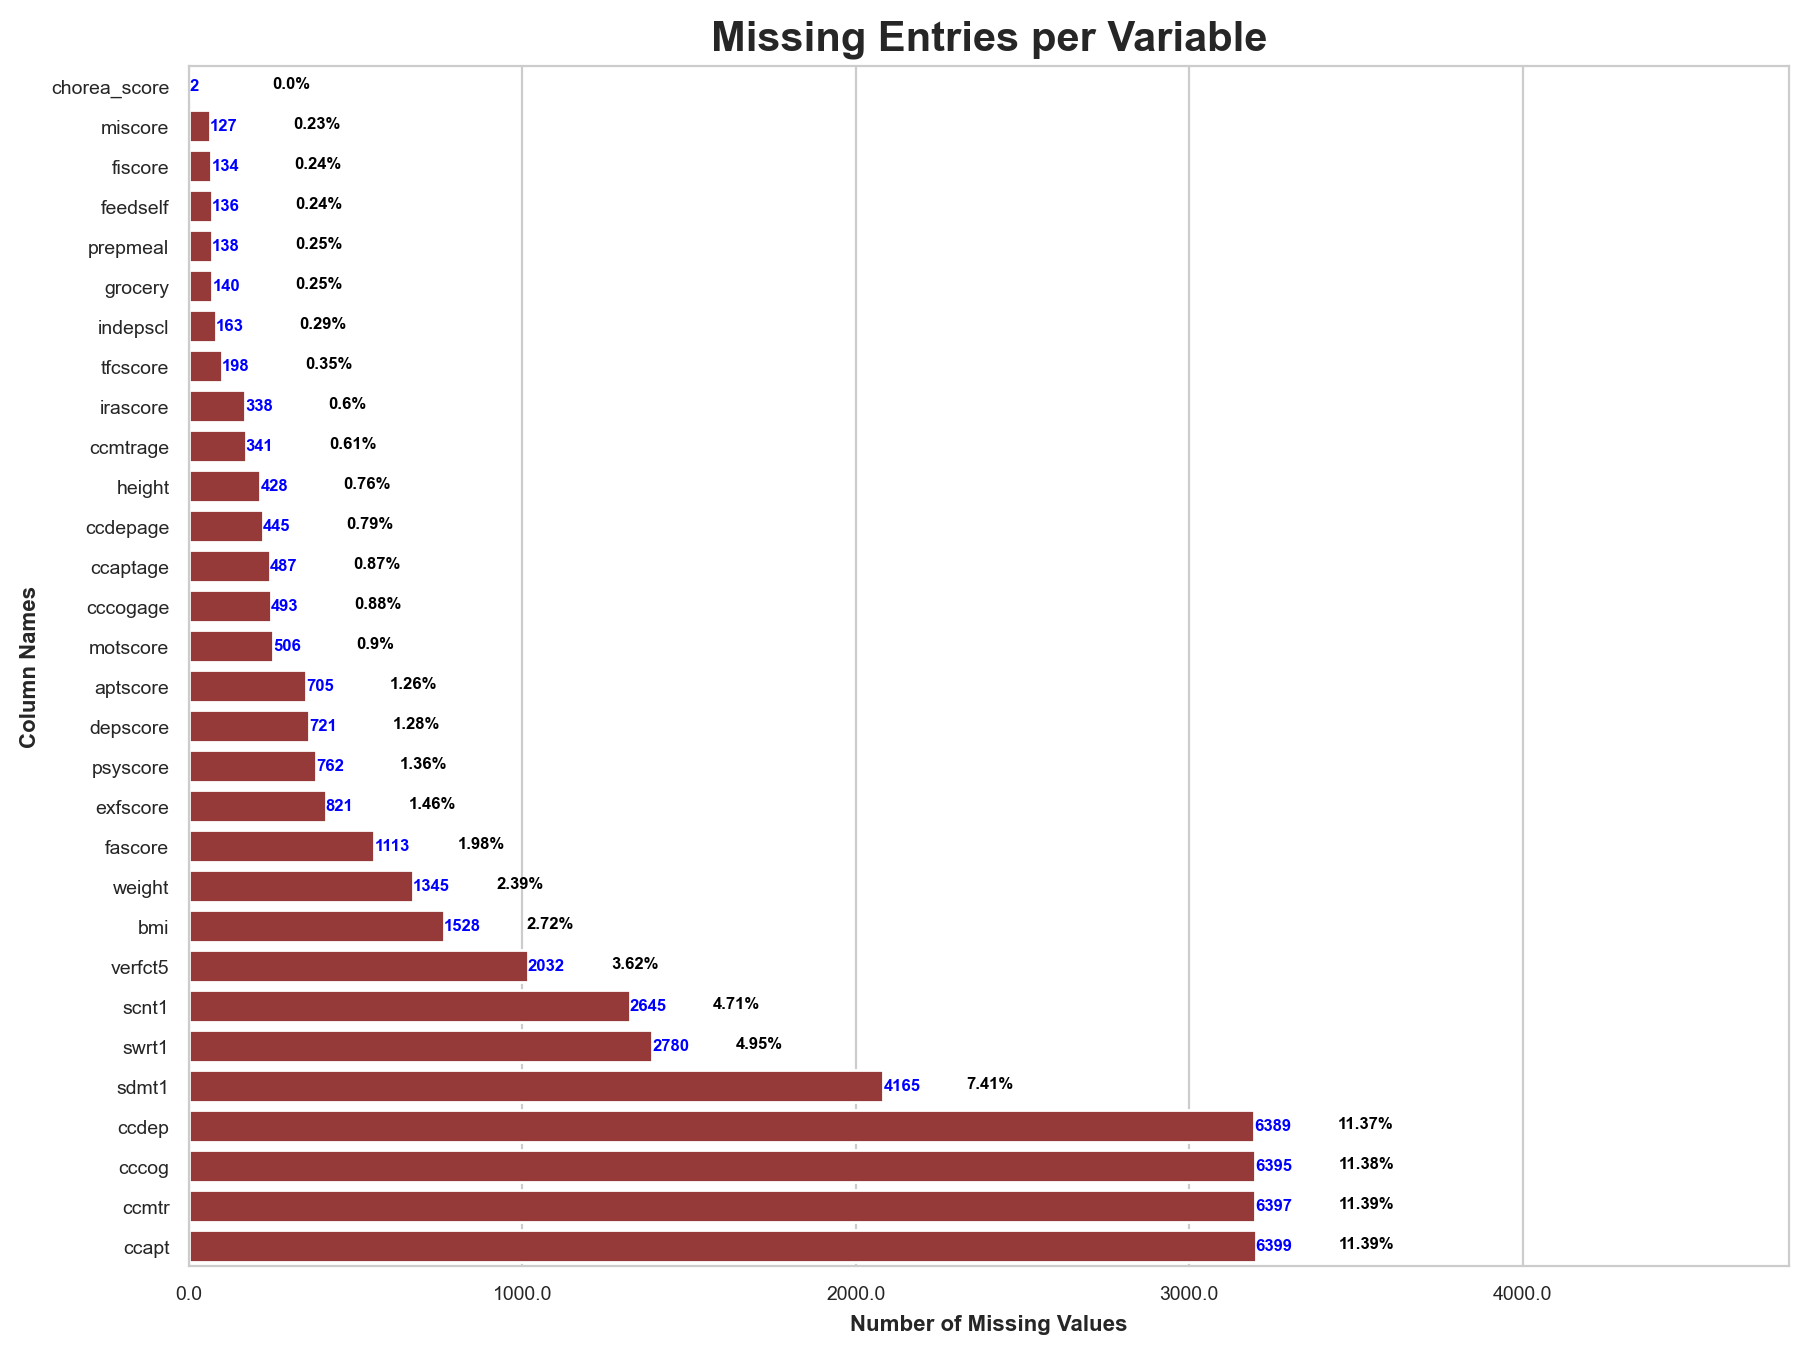

In [27]:
proj.visualize_nulls(enrl, use_bar=True, include_perc=True, perc_total=len(enrl), 
                     perc_labe_gap=500, h_labe_shift=-0.45)

In [28]:
for col in enrl.columns:
    print(f"{col}:\n{np.sort(enrl[col].unique())}\n\n")

subjid:
['R000024542' 'R00010372X' 'R000147438' ... 'R99990772X' 'R999989129'
 'R999993234']


visitnum:
[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15]


studyid:
['ENR']


hdcat_0:
[2. 3. 4. 5.]


hdcat_l:
[2. 3. 4. 5.]


sex:
['f' 'm']


ccdep:
[ 0.  1. nan]


ccdepage:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. nan]


cccog:
[ 0.  1. nan]


cccogage:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 

### Determine Participants Duration  in Study

In [29]:
cols = ['subjid', 'visdy']
# group up visitation (in days) per subject
agg_look = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()

# compute duration by subtracting last visitation day from the baseline
agg_look.loc[:, 'study_timeyr'] = agg_look.visdy.apply(lambda x: x[-1] / 365.25).round(1)
# display(agg_look)

# attach duration to enrl
enrl = pd.merge(enrl, agg_look[['subjid', 'study_timeyr']], on='subjid')
display(enrl)

,subjid,visitnum,studyid,hdcat_0,hdcat_l,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,prepmeal,feedself,grocery,sdmt1,verfct5,scnt1,swrt1,depscore,aptscore,exfscore,irascore,psyscore,study_timeyr
0,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.9,185.4,19.8,1,0,48,11.0,28.0,28.0,95.0,24.0,24.0,11.0,1.0,1.0,1.0,21.0,11.0,43.0,45.0,8.0,1.0,6.0,10.0,0.0,5.2
1,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.2,185.0,19.6,2,371,49,10.0,32.0,32.0,80.0,22.0,22.0,11.0,1.0,1.0,1.0,12.0,9.0,31.0,32.0,4.0,3.0,8.0,0.0,0.0,5.2
2,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,65.4,185.0,19.1,3,734,50,21.0,45.0,45.0,75.0,20.0,20.0,11.0,0.0,1.0,0.0,9.0,6.0,53.0,26.0,3.0,2.0,2.0,0.0,0.0,5.2
3,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,18.0,45.0,45.0,65.0,12.0,12.0,8.0,0.0,1.0,0.0,12.0,6.0,16.0,23.0,0.0,9.0,2.0,0.0,0.0,5.2
4,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,17.0,47.0,47.0,70.0,15.0,15.0,6.0,1.0,1.0,0.0,1.0,6.0,9.0,11.0,0.0,0.0,6.0,0.0,0.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56170,R999989129,1,ENR,3.0,3.0,m,1.0,38.0,1.0,40.0,1.0,38.0,1.0,34.0,45,19,3.0,73.0,180.0,22.5,1,0,44,11.0,32.0,32.0,80.0,20.0,20.0,9.0,1.0,1.0,1.0,27.0,16.0,51.0,61.0,0.0,6.0,6.0,12.0,0.0,0.0
56171,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0.0,0.0,0.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,50.0,23.0,72.0,97.0,0.0,0.0,0.0,1.0,0.0,3.2
56172,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1.0,1.0,1.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,48.0,18.0,74.0,99.0,0.0,0.0,8.0,1.0,0.0,3.2
56173,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,2.0,2.0,2.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,40.0,20.0,80.0,100.0,0.0,0.0,6.0,2.0,0.0,3.2


In [30]:
cols = ['subjid', 'visitnum']
enrl[cols].groupby(cols[0]).agg(pd.Series.unique).reset_index()[cols[-1]].value_counts()

2     4669
1     4331
3     3711
4     3358
5     2605
6     1555
7      670
8      167
9       34
10      10
12       2
11       2
14       1
15       1
Name: visitnum, dtype: int64

### Impute missing weight and height with participant's average

In [31]:
display(proj.null_checker(enrl[['weight', 'height']]))
# join the filled entries with not null entries at index
new_w = proj.impute_null_values(enrl, pivot_cols=['subjid'], target_col='weight')
new_h = proj.impute_null_values(enrl, pivot_cols=['subjid'], target_col='height')
display(new_w, new_h)
enrl.loc[:, 'height'] = new_h
enrl.loc[:, 'weight'] = new_w
display(proj.null_checker(enrl[['weight', 'height']]))

height     428
weight    1345
dtype: int64

0        67.9
1        67.2
2        65.4
3        63.8
4        62.5
         ... 
56170    73.0
56171    57.0
56172    57.3
56173    57.0
56174    60.0
Name: weight, Length: 56175, dtype: float64

0        185.4
1        185.0
2        185.0
3        185.0
4        185.0
         ...  
56170    180.0
56171    168.0
56172    167.6
56173    167.0
56174    167.0
Name: height, Length: 56175, dtype: float64

weight    0
height    0
dtype: int64

### Recompute BMI 


Only columns with null values are included

In percentage

Only columns with null values are included


No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2281: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})


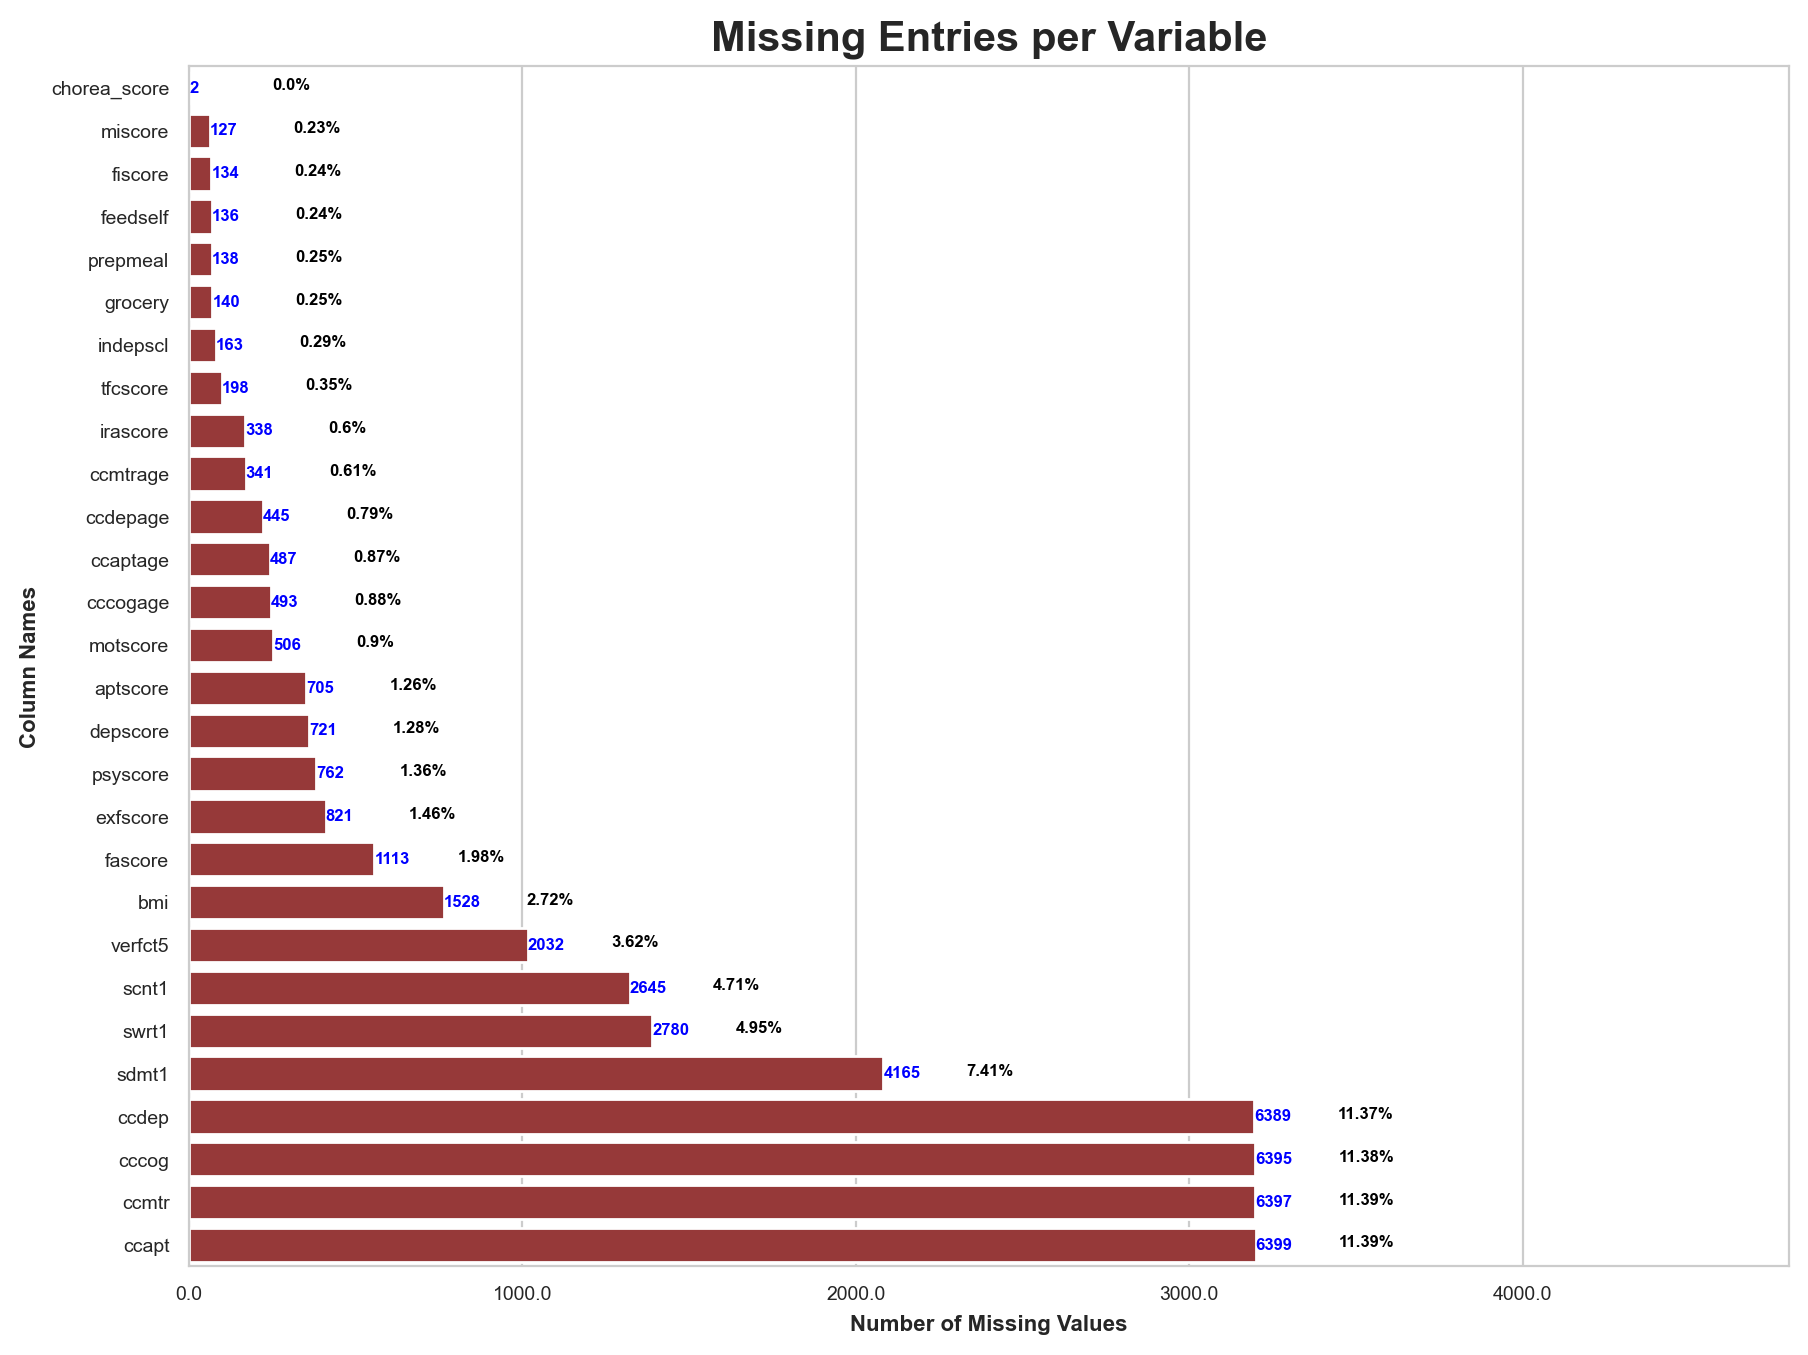

In [32]:
proj.visualize_nulls(enrl, use_bar=True, include_perc=True, perc_total=len(enrl), 
                     perc_labe_gap=500, h_labe_shift=-0.45)

In [33]:
cols = ['weight', 'height']
new_bmi = enrl[cols].apply(lambda row: proj.compute_bmi(row['weight'], row['height']),
                           axis=1)
enrl.loc[:, 'bmi'] = new_bmi

In [34]:
bmi_discretized = pd.DataFrame(proj.get_bmi_band(enrl))
enrl = pd.concat([enrl, bmi_discretized], axis=1)

display(enrl, proj.null_checker(enrl, only_nulls=True))


Only columns with null values are included


,subjid,visitnum,studyid,hdcat_0,hdcat_l,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,prepmeal,feedself,grocery,sdmt1,verfct5,scnt1,swrt1,depscore,aptscore,exfscore,irascore,psyscore,study_timeyr,bmi_level,bmi_outcome
0,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.9,185.4,19.8,1,0,48,11.0,28.0,28.0,95.0,24.0,24.0,11.0,1.0,1.0,1.0,21.0,11.0,43.0,45.0,8.0,1.0,6.0,10.0,0.0,5.2,1. normal,0
1,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.2,185.0,19.6,2,371,49,10.0,32.0,32.0,80.0,22.0,22.0,11.0,1.0,1.0,1.0,12.0,9.0,31.0,32.0,4.0,3.0,8.0,0.0,0.0,5.2,1. normal,0
2,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,65.4,185.0,19.1,3,734,50,21.0,45.0,45.0,75.0,20.0,20.0,11.0,0.0,1.0,0.0,9.0,6.0,53.0,26.0,3.0,2.0,2.0,0.0,0.0,5.2,1. normal,0
3,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,18.0,45.0,45.0,65.0,12.0,12.0,8.0,0.0,1.0,0.0,12.0,6.0,16.0,23.0,0.0,9.0,2.0,0.0,0.0,5.2,1. normal,0
4,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,17.0,47.0,47.0,70.0,15.0,15.0,6.0,1.0,1.0,0.0,1.0,6.0,9.0,11.0,0.0,0.0,6.0,0.0,0.0,5.2,0. underweight,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56170,R999989129,1,ENR,3.0,3.0,m,1.0,38.0,1.0,40.0,1.0,38.0,1.0,34.0,45,19,3.0,73.0,180.0,22.5,1,0,44,11.0,32.0,32.0,80.0,20.0,20.0,9.0,1.0,1.0,1.0,27.0,16.0,51.0,61.0,0.0,6.0,6.0,12.0,0.0,0.0,1. normal,0
56171,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0.0,0.0,0.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,50.0,23.0,72.0,97.0,0.0,0.0,0.0,1.0,0.0,3.2,1. normal,0
56172,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1.0,1.0,1.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,48.0,18.0,74.0,99.0,0.0,0.0,8.0,1.0,0.0,3.2,1. normal,0
56173,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,2.0,2.0,2.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,40.0,20.0,80.0,100.0,0.0,0.0,6.0,2.0,0.0,3.2,1. normal,0


chorea_score       2
miscore          127
fiscore          134
feedself         136
prepmeal         138
grocery          140
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
verfct5         2032
scnt1           2645
swrt1           2780
sdmt1           4165
ccdep           6389
cccog           6395
ccmtr           6397
ccapt           6399
dtype: int64

In [35]:
bmi_change_df = proj.get_bmi_change(enrl)
display(bmi_change_df)
enrl = pd.merge(enrl, bmi_change_df, left_index=True, right_index=True)
display(enrl)

,bmi_diff,bmi_change
0,-2.3,-1.0
1,-2.3,-1.0
2,-2.3,-1.0
3,-2.3,-1.0
4,-2.3,-1.0
...,...,...
56170,-999.0,-999.0
56171,1.3,1.0
56172,1.3,1.0
56173,1.3,1.0


,subjid,visitnum,studyid,hdcat_0,hdcat_l,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,prepmeal,feedself,grocery,sdmt1,verfct5,scnt1,swrt1,depscore,aptscore,exfscore,irascore,psyscore,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change
0,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.9,185.4,19.8,1,0,48,11.0,28.0,28.0,95.0,24.0,24.0,11.0,1.0,1.0,1.0,21.0,11.0,43.0,45.0,8.0,1.0,6.0,10.0,0.0,5.2,1. normal,0,-2.3,-1.0
1,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.2,185.0,19.6,2,371,49,10.0,32.0,32.0,80.0,22.0,22.0,11.0,1.0,1.0,1.0,12.0,9.0,31.0,32.0,4.0,3.0,8.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0
2,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,65.4,185.0,19.1,3,734,50,21.0,45.0,45.0,75.0,20.0,20.0,11.0,0.0,1.0,0.0,9.0,6.0,53.0,26.0,3.0,2.0,2.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0
3,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,18.0,45.0,45.0,65.0,12.0,12.0,8.0,0.0,1.0,0.0,12.0,6.0,16.0,23.0,0.0,9.0,2.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0
4,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,17.0,47.0,47.0,70.0,15.0,15.0,6.0,1.0,1.0,0.0,1.0,6.0,9.0,11.0,0.0,0.0,6.0,0.0,0.0,5.2,0. underweight,-1,-2.3,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56170,R999989129,1,ENR,3.0,3.0,m,1.0,38.0,1.0,40.0,1.0,38.0,1.0,34.0,45,19,3.0,73.0,180.0,22.5,1,0,44,11.0,32.0,32.0,80.0,20.0,20.0,9.0,1.0,1.0,1.0,27.0,16.0,51.0,61.0,0.0,6.0,6.0,12.0,0.0,0.0,1. normal,0,-999.0,-999.0
56171,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0.0,0.0,0.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,50.0,23.0,72.0,97.0,0.0,0.0,0.0,1.0,0.0,3.2,1. normal,0,1.3,1.0
56172,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1.0,1.0,1.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,48.0,18.0,74.0,99.0,0.0,0.0,8.0,1.0,0.0,3.2,1. normal,0,1.3,1.0
56173,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,2.0,2.0,2.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,40.0,20.0,80.0,100.0,0.0,0.0,6.0,2.0,0.0,3.2,1. normal,0,1.3,1.0


In [36]:
# for the sake of interval accuracy, change -999 to 0
bmi_diff = enrl['bmi_diff'].apply(lambda x: 0 if x == -999 else x)
# display(bmi_diff)

bmi_change_interval = proj.get_interval_freq(bmi_diff, bin_width=1, precision=1)
# display(bmi_change_interval)
enrl = pd.concat([enrl, bmi_change_interval], axis=1)
enrl

,subjid,visitnum,studyid,hdcat_0,hdcat_l,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,prepmeal,feedself,grocery,sdmt1,verfct5,scnt1,swrt1,depscore,aptscore,exfscore,irascore,psyscore,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band
0,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.9,185.4,19.8,1,0,48,11.0,28.0,28.0,95.0,24.0,24.0,11.0,1.0,1.0,1.0,21.0,11.0,43.0,45.0,8.0,1.0,6.0,10.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0)
1,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.2,185.0,19.6,2,371,49,10.0,32.0,32.0,80.0,22.0,22.0,11.0,1.0,1.0,1.0,12.0,9.0,31.0,32.0,4.0,3.0,8.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0)
2,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,65.4,185.0,19.1,3,734,50,21.0,45.0,45.0,75.0,20.0,20.0,11.0,0.0,1.0,0.0,9.0,6.0,53.0,26.0,3.0,2.0,2.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0)
3,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,18.0,45.0,45.0,65.0,12.0,12.0,8.0,0.0,1.0,0.0,12.0,6.0,16.0,23.0,0.0,9.0,2.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0)
4,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,17.0,47.0,47.0,70.0,15.0,15.0,6.0,1.0,1.0,0.0,1.0,6.0,9.0,11.0,0.0,0.0,6.0,0.0,0.0,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56170,R999989129,1,ENR,3.0,3.0,m,1.0,38.0,1.0,40.0,1.0,38.0,1.0,34.0,45,19,3.0,73.0,180.0,22.5,1,0,44,11.0,32.0,32.0,80.0,20.0,20.0,9.0,1.0,1.0,1.0,27.0,16.0,51.0,61.0,0.0,6.0,6.0,12.0,0.0,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0)
56171,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0.0,0.0,0.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,50.0,23.0,72.0,97.0,0.0,0.0,0.0,1.0,0.0,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0)
56172,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1.0,1.0,1.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,48.0,18.0,74.0,99.0,0.0,0.0,8.0,1.0,0.0,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0)
56173,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,2.0,2.0,2.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,40.0,20.0,80.0,100.0,0.0,0.0,6.0,2.0,0.0,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0)



Only columns with null values are included

In percentage

Only columns with null values are included


No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2281: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(np.round(axis.get_xticks(), precision), fontdict={'fontsize':xy_ticksize})


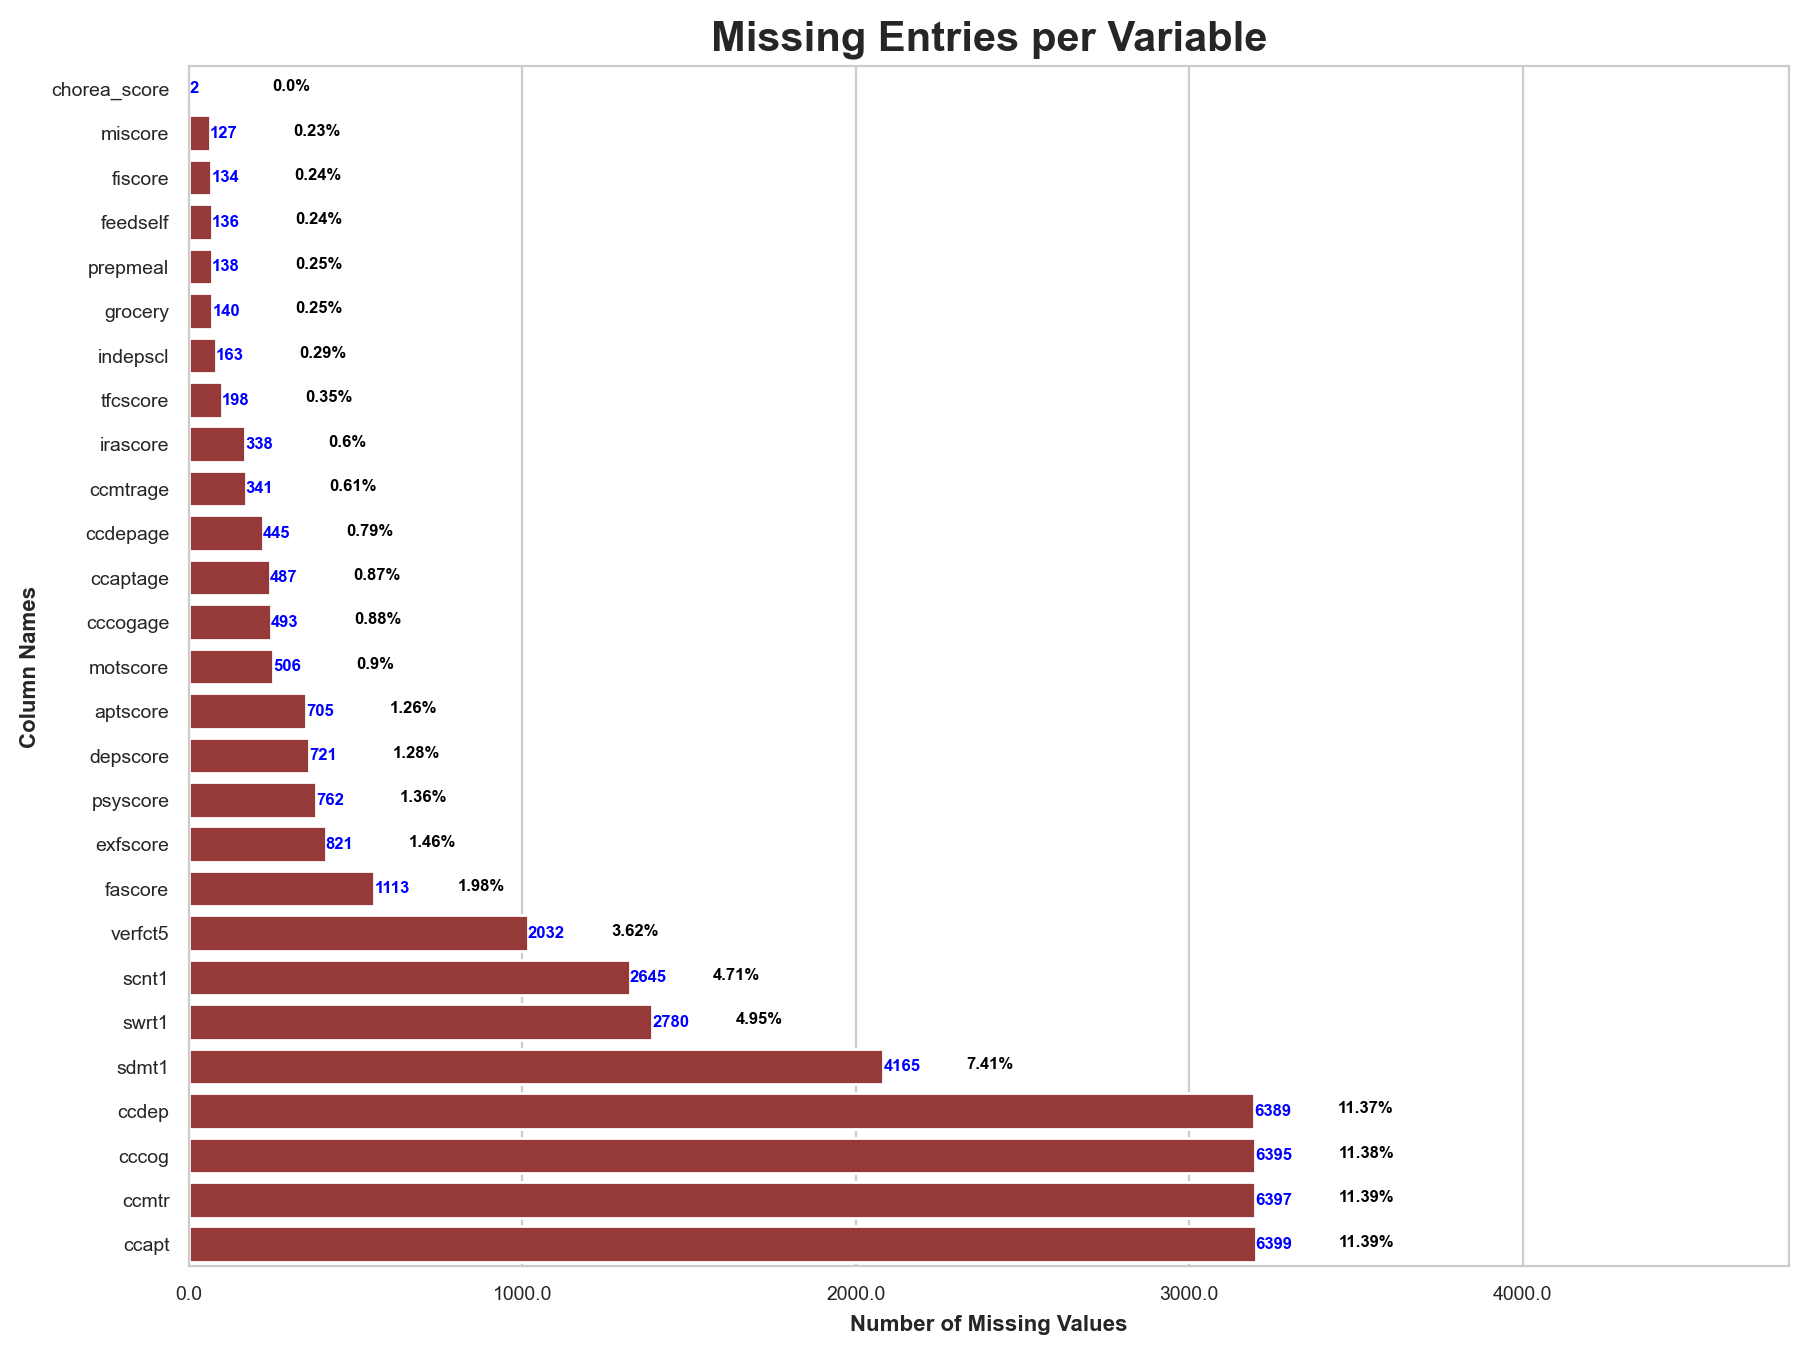

In [37]:
proj.visualize_nulls(enrl, use_bar=True, include_perc=True, perc_total=len(enrl), 
                     perc_labe_gap=500, h_labe_shift=-0.45)

In [38]:
for col in enrl.columns:
    print(f"{col}:\n{np.sort(enrl[col].unique())}\n\n")

subjid:
['R000024542' 'R00010372X' 'R000147438' ... 'R99990772X' 'R999989129'
 'R999993234']


visitnum:
[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15]


studyid:
['ENR']


hdcat_0:
[2. 3. 4. 5.]


hdcat_l:
[2. 3. 4. 5.]


sex:
['f' 'm']


ccdep:
[ 0.  1. nan]


ccdepage:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. nan]


cccog:
[ 0.  1. nan]


cccogage:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 

### Age Band

In [39]:
age_band = pd.DataFrame(proj.get_age_band(enrl, 'age'))
display(age_band)

enrl = pd.concat([enrl, age_band], axis=1)

display(enrl, proj.null_checker(enrl, only_nulls=True))

,age_bucket
0,2. 40 - 49
1,2. 40 - 49
2,3. 50 - 59
3,3. 50 - 59
4,3. 50 - 59
...,...
56170,2. 40 - 49
56171,2. 40 - 49
56172,2. 40 - 49
56173,2. 40 - 49



Only columns with null values are included


,subjid,visitnum,studyid,hdcat_0,hdcat_l,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,prepmeal,feedself,grocery,sdmt1,verfct5,scnt1,swrt1,depscore,aptscore,exfscore,irascore,psyscore,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket
0,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.9,185.4,19.8,1,0,48,11.0,28.0,28.0,95.0,24.0,24.0,11.0,1.0,1.0,1.0,21.0,11.0,43.0,45.0,8.0,1.0,6.0,10.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49
1,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.2,185.0,19.6,2,371,49,10.0,32.0,32.0,80.0,22.0,22.0,11.0,1.0,1.0,1.0,12.0,9.0,31.0,32.0,4.0,3.0,8.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49
2,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,65.4,185.0,19.1,3,734,50,21.0,45.0,45.0,75.0,20.0,20.0,11.0,0.0,1.0,0.0,9.0,6.0,53.0,26.0,3.0,2.0,2.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59
3,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,18.0,45.0,45.0,65.0,12.0,12.0,8.0,0.0,1.0,0.0,12.0,6.0,16.0,23.0,0.0,9.0,2.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59
4,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,17.0,47.0,47.0,70.0,15.0,15.0,6.0,1.0,1.0,0.0,1.0,6.0,9.0,11.0,0.0,0.0,6.0,0.0,0.0,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56170,R999989129,1,ENR,3.0,3.0,m,1.0,38.0,1.0,40.0,1.0,38.0,1.0,34.0,45,19,3.0,73.0,180.0,22.5,1,0,44,11.0,32.0,32.0,80.0,20.0,20.0,9.0,1.0,1.0,1.0,27.0,16.0,51.0,61.0,0.0,6.0,6.0,12.0,0.0,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49
56171,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0.0,0.0,0.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,50.0,23.0,72.0,97.0,0.0,0.0,0.0,1.0,0.0,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49
56172,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1.0,1.0,1.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,48.0,18.0,74.0,99.0,0.0,0.0,8.0,1.0,0.0,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49
56173,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,2.0,2.0,2.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,40.0,20.0,80.0,100.0,0.0,0.0,6.0,2.0,0.0,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49


chorea_score       2
miscore          127
fiscore          134
feedself         136
prepmeal         138
grocery          140
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
verfct5         2032
scnt1           2645
swrt1           2780
sdmt1           4165
ccdep           6389
cccog           6395
ccmtr           6397
ccapt           6399
dtype: int64

<AxesSubplot:>

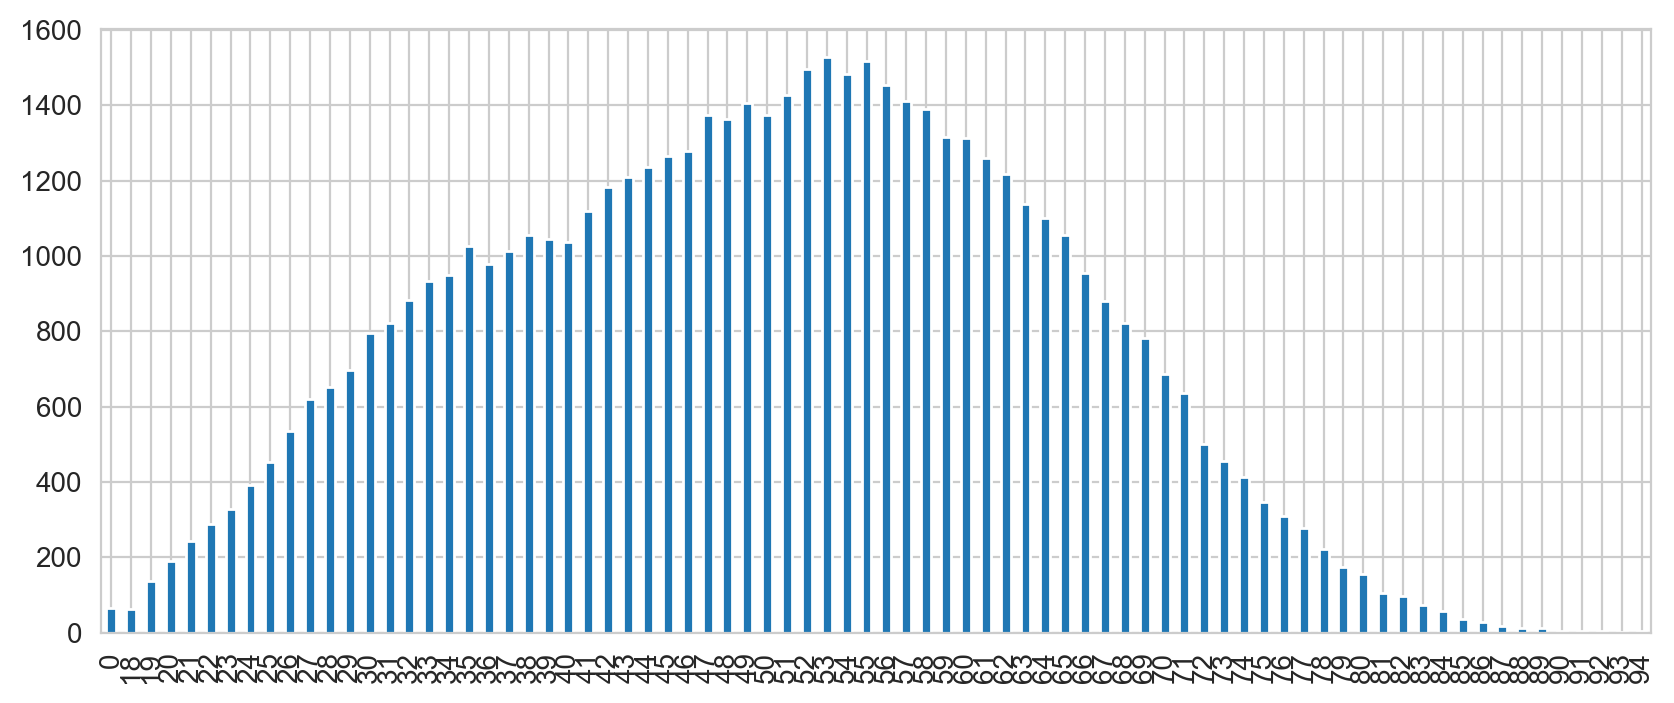

In [40]:
plt.figure(figsize=[10, 4], dpi=200)
enrl['age'].value_counts().sort_index().plot(kind='bar')

### Engineer baseline age >29yrs

In [41]:
# baseline age_bucket > 0. below 30
display(proj.age_band)
cols = ['subjid', 'age_bucket']
baseline_age_above29 = enrl[cols].groupby(cols[0]).agg(tuple)[cols[-1]].apply(lambda x: 
                                                                              0 if int(x[0].split('.')[0]) < 1 else 1)
young = pd.Series(baseline_age_above29,
                  name='baseline_age_above29').reset_index()
display(young['baseline_age_above29'].value_counts())
young = pd.merge(enrl[cols[0]], young, on=cols[0])
display(young)
enrl = pd.concat([enrl, young.drop(cols[0], axis=1)], axis=1)
display(enrl)

{'five_yr_band': {1: 'below 18',
  2: '18-24',
  3: '25-29',
  4: '30-34',
  5: '35-39',
  6: '40-44',
  7: '45-49',
  8: '50-54',
  9: '55-59',
  10: '60-64',
  11: '65-69',
  12: 'above 70'},
 'ten_yr_band': ('0. <30',
  '1. 30 - 39',
  '2. 40 - 49',
  '3. 50 - 59',
  '4. 60 - 69',
  '5. >=70')}

1    18803
0     2313
Name: baseline_age_above29, dtype: int64

,subjid,baseline_age_above29
0,R000024542,1
1,R000024542,1
2,R000024542,1
3,R000024542,1
4,R000024542,1
...,...,...
56170,R999989129,1
56171,R999993234,1
56172,R999993234,1
56173,R999993234,1


,subjid,visitnum,studyid,hdcat_0,hdcat_l,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,prepmeal,feedself,grocery,sdmt1,verfct5,scnt1,swrt1,depscore,aptscore,exfscore,irascore,psyscore,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29
0,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.9,185.4,19.8,1,0,48,11.0,28.0,28.0,95.0,24.0,24.0,11.0,1.0,1.0,1.0,21.0,11.0,43.0,45.0,8.0,1.0,6.0,10.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1
1,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,67.2,185.0,19.6,2,371,49,10.0,32.0,32.0,80.0,22.0,22.0,11.0,1.0,1.0,1.0,12.0,9.0,31.0,32.0,4.0,3.0,8.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1
2,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,65.4,185.0,19.1,3,734,50,21.0,45.0,45.0,75.0,20.0,20.0,11.0,0.0,1.0,0.0,9.0,6.0,53.0,26.0,3.0,2.0,2.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1
3,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,18.0,45.0,45.0,65.0,12.0,12.0,8.0,0.0,1.0,0.0,12.0,6.0,16.0,23.0,0.0,9.0,2.0,0.0,0.0,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1
4,R000024542,6,ENR,3.0,3.0,m,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,17.0,47.0,47.0,70.0,15.0,15.0,6.0,1.0,1.0,0.0,1.0,6.0,9.0,11.0,0.0,0.0,6.0,0.0,0.0,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56170,R999989129,1,ENR,3.0,3.0,m,1.0,38.0,1.0,40.0,1.0,38.0,1.0,34.0,45,19,3.0,73.0,180.0,22.5,1,0,44,11.0,32.0,32.0,80.0,20.0,20.0,9.0,1.0,1.0,1.0,27.0,16.0,51.0,61.0,0.0,6.0,6.0,12.0,0.0,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1
56171,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0.0,0.0,0.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,50.0,23.0,72.0,97.0,0.0,0.0,0.0,1.0,0.0,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1
56172,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1.0,1.0,1.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,48.0,18.0,74.0,99.0,0.0,0.0,8.0,1.0,0.0,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1
56173,R999993234,4,ENR,2.0,2.0,f,1.0,48.0,0.0,0.0,1.0,50.0,0.0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,2.0,2.0,2.0,100.0,25.0,25.0,13.0,1.0,1.0,1.0,40.0,20.0,80.0,100.0,0.0,0.0,6.0,2.0,0.0,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1


### Impute missing ccdep with participant's mode

In [42]:
cols = ['subjid', 'ccdep']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# x[x != 1]
# after confirming that ccdep is constant per participant
new_ccdep = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_ccdep,)# enrl['ccdep'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_ccdep

proj.null_checker(enrl, only_nulls=True)

array([ 0.,  1., nan])

0        0
1        0
2        0
3        0
4        0
        ..
56170    1
56171    1
56172    1
56173    1
56174    1
Name: ccdep, Length: 56175, dtype: int32


Only columns with null values are included


chorea_score       2
miscore          127
fiscore          134
feedself         136
prepmeal         138
grocery          140
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
verfct5         2032
scnt1           2645
swrt1           2780
sdmt1           4165
cccog           6395
ccmtr           6397
ccapt           6399
dtype: int64

### Impute missing cccog with participant's mode

In [43]:
cols = ['subjid', 'cccog']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# x[x != 1]
# after confirming that cccog is constant per participant
new_cccog = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_cccog,)# enrl['cccog'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_cccog

proj.null_checker(enrl, only_nulls=True)

array([ 0.,  1., nan])

0        0
1        0
2        0
3        0
4        0
        ..
56170    1
56171    0
56172    0
56173    0
56174    0
Name: cccog, Length: 56175, dtype: int32


Only columns with null values are included


chorea_score       2
miscore          127
fiscore          134
feedself         136
prepmeal         138
grocery          140
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
verfct5         2032
scnt1           2645
swrt1           2780
sdmt1           4165
ccmtr           6397
ccapt           6399
dtype: int64

### Impute missing ccapt with participant's mode

In [44]:
cols = ['subjid', 'ccapt']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# x[x != 1]
# after confirming that ccapt is constant per participant
new_ccapt = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_ccapt,)# enrl['ccapt'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_ccapt

proj.null_checker(enrl, only_nulls=True)

array([ 0.,  1., nan])

0        0
1        0
2        0
3        0
4        0
        ..
56170    1
56171    1
56172    1
56173    1
56174    1
Name: ccapt, Length: 56175, dtype: int32


Only columns with null values are included


chorea_score       2
miscore          127
fiscore          134
feedself         136
prepmeal         138
grocery          140
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
verfct5         2032
scnt1           2645
swrt1           2780
sdmt1           4165
ccmtr           6397
dtype: int64

### Impute missing ccmtr with participant's mode

In [45]:
cols = ['subjid', 'ccmtr']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# x[x != 1]
# after confirming that ccmtr is constant per participant
new_ccmtr = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_ccmtr,)# enrl['ccmtr'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_ccmtr

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        1
3        1
4        1
        ..
56170    1
56171    0
56172    0
56173    0
56174    0
Name: ccmtr, Length: 56175, dtype: int32


Only columns with null values are included


chorea_score       2
miscore          127
fiscore          134
feedself         136
prepmeal         138
grocery          140
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
verfct5         2032
scnt1           2645
swrt1           2780
sdmt1           4165
dtype: int64

### Impute missing swrt with participant's mode

In [46]:
cols = ['subjid', 'swrt1']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that swrt is constant per participant
new_swrt = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_swrt,)# enrl['swrt'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_swrt

proj.null_checker(enrl, only_nulls=True)

array([ 45.,  32.,  26.,  23.,  11.,  nan,  73.,  80.,  71.,  69.,  59.,
        70.,  52.,  89., 100., 120.,  88.,  83.,  90.,  79.,  82.,  93.,
         0.,  46.,  48., 111., 101.,  92.,  56., 122., 117., 137., 134.,
        62.,  63.,  97.,  95.,  86.,  49.,  53.,  84.,  74.,  38., 109.,
       123., 112.,  99., 108., 103.,  57.,  25.,  22.,  29.,  44.,  37.,
        98.,  58.,  50.,  28.,  34., 124., 119.,  77.,  76.,  72.,  35.,
        33.,  30.,  20.,  60.,  51.,  75.,  81., 114., 110., 105., 107.,
       104.,  94.,  42.,  55., 106.,  39.,  31., 118., 115.,  87.,  67.,
        96.,  91.,  43.,  15.,   7., 121.,  65.,  68.,  41.,  47., 140.,
       138., 113.,  54.,  40., 102.,  66., 148.,  21., 127., 116., 125.,
        24.,  17.,  19.,  13., 130.,  78.,  14.,  85.,  36.,  18.,  27.,
        64., 135., 136.,  61., 126., 128.,   4., 147.,  10., 133., 154.,
       129.,  12.,   9.,   6.,  16., 131.,   1.,   3., 146., 142., 132.,
       139., 160.,   5., 186., 149.,   8.,   2., 14

0         45
1         32
2         26
3         23
4         11
        ... 
56170     61
56171     97
56172     99
56173    100
56174     99
Name: swrt1, Length: 56175, dtype: int32


Only columns with null values are included


chorea_score       2
miscore          127
fiscore          134
feedself         136
prepmeal         138
grocery          140
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
verfct5         2032
scnt1           2645
sdmt1           4165
dtype: int64

### Impute missing scnt with participant's mode

In [47]:
cols = ['subjid', 'scnt1']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that scnt is constant per participant
new_scnt = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_scnt,)# enrl['scnt'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_scnt

proj.null_checker(enrl, only_nulls=True)

array([ 43.,  31.,  53.,  16.,   9.,  nan,  58.,  26.,  52.,  57.,  46.,
        48.,  36.,  66.,  75.,  82.,  54.,  56.,  45.,  78.,   0.,  28.,
        40.,  84.,  68.,  61.,  65.,  41.,  51.,  29.,  38.,  30.,  88.,
        85.,  90.,  83.,  49.,  64.,  62.,  70.,  73.,  92.,  97.,  94.,
        71.,  76.,  79.,  69.,  72.,  55.,  93.,  87.,  23.,  24.,  47.,
        34.,  35.,   5.,  33.,  81.,  60.,  74.,  63.,  44.,  80.,  50.,
       100.,  96.,  27.,  22.,  95.,  77.,  86., 102.,  98., 113.,  32.,
        67.,  37.,   8.,  42.,  89.,  11., 117.,  13.,  59.,  25.,  39.,
        91.,  99.,  14.,  20.,  21.,  17., 104., 101., 118., 103.,   7.,
         6.,  15.,  12., 106., 112., 127.,  19.,  18.,  10., 109., 130.,
       107., 120., 105., 111.,   1., 110., 108.,   4., 128., 129., 126.,
         2., 114., 115., 121., 134., 119.,   3., 122., 123., 116., 124.,
       125., 144., 217., 135., 140., 131., 160., 141., 145., 149., 155.,
       139., 132., 136.])

0        43
1        31
2        53
3        16
4         9
         ..
56170    51
56171    72
56172    74
56173    80
56174    75
Name: scnt1, Length: 56175, dtype: int32


Only columns with null values are included


chorea_score       2
miscore          127
fiscore          134
feedself         136
prepmeal         138
grocery          140
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
verfct5         2032
sdmt1           4165
dtype: int64

### Impute missing sdmt with participant's mode

In [48]:
cols = ['subjid', 'sdmt1']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that sdmt is constant per participant
new_sdmt = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_sdmt,)# enrl['sdmt'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_sdmt

proj.null_checker(enrl, only_nulls=True)

array([ 21.,  12.,   9.,   1.,  nan,  30.,  19.,  25.,  23.,  14.,  37.,
        62.,  63.,  38.,  36.,  35.,  33.,  50.,  52.,   0.,  18.,  17.,
        55.,  59.,  57.,  49.,  11.,  56.,  54.,  58.,  60.,  32.,  26.,
        53.,  20.,  29.,  61.,  47.,  41.,  66.,  67.,  80.,  70.,  46.,
        39.,  43.,  42.,  15.,   5.,   6.,  22.,   4.,  48.,  44.,  34.,
        31.,  51.,  16.,   3.,  40.,  10.,  28.,  24.,  45.,   8.,  13.,
        27.,  71.,  77.,  72.,  64.,   7.,  69.,  75.,  73.,  65., 105.,
        78.,  68.,  94.,  82.,  87.,  86.,  81.,  76.,   2.,  74.,  85.,
       110.,  84.,  89.,  83.,  93.,  79., 101.,  96.,  95.,  88.,  99.,
        97.,  92.,  98.,  91.,  90., 104., 109., 102.])

0        21
1        12
2         9
3        12
4         1
         ..
56170    27
56171    50
56172    48
56173    40
56174    50
Name: sdmt1, Length: 56175, dtype: int32


Only columns with null values are included


chorea_score       2
miscore          127
fiscore          134
feedself         136
prepmeal         138
grocery          140
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
verfct5         2032
dtype: int64

### Impute missing verfct with participant's mode

In [49]:
cols = ['subjid', 'verfct5']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that verfct is constant per participant
new_verfct = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_verfct,)# enrl['verfct'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_verfct

proj.null_checker(enrl, only_nulls=True)

array([11.,  9.,  6.,  3., 17., 15., 10., 16.,  5., 20., 24., 23., 22.,
       21., 19., nan,  0., 18., 26., 25., 27., 31., 12.,  8., 32., 28.,
        4.,  7., 14., 13., 30.,  2., 29., 34., 36., 37., 42., 43.,  1.,
       38., 41., 33., 39., 35., 47., 44., 45., 48., 40., 49., 57., 46.,
       75., 55.])

0        11
1         9
2         6
3         6
4         6
         ..
56170    16
56171    23
56172    18
56173    20
56174    19
Name: verfct5, Length: 56175, dtype: int32


Only columns with null values are included


chorea_score       2
miscore          127
fiscore          134
feedself         136
prepmeal         138
grocery          140
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
dtype: int64

### Impute missing prepmeal with participant's mode

In [50]:
cols = ['subjid', 'prepmeal']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that prepmeal is constant per participant
new_prepmeal = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_prepmeal,)# enrl['prepmeal'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_prepmeal

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        0
3        0
4        1
        ..
56170    1
56171    1
56172    1
56173    1
56174    1
Name: prepmeal, Length: 56175, dtype: int32


Only columns with null values are included


chorea_score       2
miscore          127
fiscore          134
feedself         136
grocery          140
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
dtype: int64

### Impute missing grocery with participant's mode

In [51]:
cols = ['subjid', 'grocery']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that grocery is constant per participant
new_grocery = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_grocery,)# enrl['grocery'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_grocery

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        0
3        0
4        0
        ..
56170    1
56171    1
56172    1
56173    1
56174    1
Name: grocery, Length: 56175, dtype: int32


Only columns with null values are included


chorea_score       2
miscore          127
fiscore          134
feedself         136
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
dtype: int64

### Impute missing feedself with participant's mode

In [52]:
cols = ['subjid', 'feedself']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that feedself is constant per participant
new_feedself = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_feedself,)# enrl['feedself'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_feedself

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  0., nan])

0        1
1        1
2        1
3        1
4        1
        ..
56170    1
56171    1
56172    1
56173    1
56174    1
Name: feedself, Length: 56175, dtype: int32


Only columns with null values are included


chorea_score       2
miscore          127
fiscore          134
indepscl         163
tfcscore         198
irascore         338
ccmtrage         341
ccdepage         445
ccaptage         487
cccogage         493
motscore         506
aptscore         705
depscore         721
psyscore         762
exfscore         821
fascore         1113
dtype: int64

### Impute missing chorea_score with participant's mode

In [53]:
cols = ['subjid', 'chorea_score']
display(enrl[cols[-1]].unique())

new_chorea_score = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_chorea_score,)

enrl.loc[:, cols[-1]] = new_chorea_score

proj.null_checker(enrl, only_nulls=True)

array([1.1000e+01, 1.0000e+01, 2.1000e+01, 1.8000e+01, 1.7000e+01,
       2.8000e+01, 8.0000e+00, 7.0000e+00, 9.0000e+00, 1.3000e+01,
       0.0000e+00, 1.2000e+01, 2.2000e+01, 2.3000e+01, 2.6000e+01,
       2.7000e+01, 3.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00,
       4.0000e+00, 6.0000e+00, 1.9000e+01, 1.4000e+01, 1.6000e+01,
       1.5000e+01, 2.0000e+01, 6.9986e+04, 2.5000e+01, 2.4000e+01,
       1.0001e+04, 3.9998e+04, 6.9985e+04, 1.0011e+04, 6.9979e+04,
       2.0012e+04, 2.0008e+04, 2.9997e+04,        nan, 1.0021e+04,
       1.0012e+04, 1.0007e+04, 1.0010e+04, 6.9984e+04, 6.9980e+04,
       1.9998e+04, 1.0002e+04, 1.9999e+04, 2.0001e+04, 2.0004e+04,
       1.9996e+04])

0        11
1        10
2        21
3        18
4        17
         ..
56170    11
56171     0
56172     1
56173     2
56174     0
Name: chorea_score, Length: 56175, dtype: int32


Only columns with null values are included


miscore      127
fiscore      134
indepscl     163
tfcscore     198
irascore     338
ccmtrage     341
ccdepage     445
ccaptage     487
cccogage     493
motscore     506
aptscore     705
depscore     721
psyscore     762
exfscore     821
fascore     1113
dtype: int64

### Impute missing psyscore with participant's mode

In [54]:
cols = ['subjid', 'psyscore']
display(enrl[cols[-1]].unique())

new_chorea_score = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_chorea_score,)

enrl.loc[:, cols[-1]] = new_chorea_score

proj.null_checker(enrl, only_nulls=True)

array([ 0., nan,  1.,  6.,  4.,  9.,  2., 24.,  8., 21.,  3., 18.,  5.,
       32., 28., 16., 20., 12., 10., 15.,  7., 22., 14., 13., 17., 11.,
       25., 19.])

0        0
1        0
2        0
3        0
4        0
        ..
56170    0
56171    0
56172    0
56173    0
56174    0
Name: psyscore, Length: 56175, dtype: int32


Only columns with null values are included


miscore      127
fiscore      134
indepscl     163
tfcscore     198
irascore     338
ccmtrage     341
ccdepage     445
ccaptage     487
cccogage     493
motscore     506
aptscore     705
depscore     721
exfscore     821
fascore     1113
dtype: int64

### Impute missing irascore with participant's mode

In [55]:
cols = ['subjid', 'irascore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that ownmeds is constant per participant
new_ownmeds = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_ownmeds,)# enrl['ownmeds'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_ownmeds

proj.null_checker(enrl, only_nulls=True)

array([10.,  0.,  2.,  1.,  3.,  4.,  8.,  9.,  5., 12.,  6., 21., 20.,
       24., 22., 18., 13.,  7., 11., 15., nan, 16., 17., 14., 32., 28.,
       25., 19.])

0        10
1         0
2         0
3         0
4         0
         ..
56170    12
56171     1
56172     1
56173     2
56174     4
Name: irascore, Length: 56175, dtype: int32


Only columns with null values are included


miscore      127
fiscore      134
indepscl     163
tfcscore     198
ccmtrage     341
ccdepage     445
ccaptage     487
cccogage     493
motscore     506
aptscore     705
depscore     721
exfscore     821
fascore     1113
dtype: int64

### IMPUTING SCORES

#### indepscl

In [56]:
cols = ['hdcat', 'age_bucket', 'ccmtr', 'cccog', 'ccdep']
y = 'indepscl'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

cccog    61.3
ccmtr    46.3
dtype: float64

Index(['cccog', 'ccmtr'], dtype='object')

In [57]:
cols = ['subjid', 'ccmtr', 'cccog', 'indepscl']
display(enrl[cols[-1]].unique())

new_indepscl = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_indepscl,)
enrl.loc[:, cols[-1]] = new_indepscl

proj.null_checker(enrl, only_nulls=True)

array([ 95.,  80.,  75.,  65.,  70.,  90., 100.,  85.,  20.,  25.,  15.,
        10.,  50.,  30.,  60.,  55.,  45.,  nan,  35.,  40.,   5.])

0         95
1         80
2         75
3         65
4         70
        ... 
56170     80
56171    100
56172    100
56173    100
56174    100
Name: indepscl, Length: 56175, dtype: int32


Only columns with null values are included


miscore      127
fiscore      134
tfcscore     198
ccmtrage     341
ccdepage     445
ccaptage     487
cccogage     493
motscore     506
aptscore     705
depscore     721
exfscore     821
fascore     1113
dtype: int64

#### miscore

In [58]:
cols = ['hdcat', 'bmi_level', 'age_bucket', 'ccmtr', 'cccog', 'ccdep']
y = 'miscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

cccog    60.6
ccmtr    54.0
dtype: float64

Index(['cccog', 'ccmtr'], dtype='object')

In [59]:
cols = ['subjid', 'ccmtr', 'cccog', 'miscore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that miscore is constant per participant
new_miscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_miscore,)# enrl['miscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_miscore

proj.null_checker(enrl, only_nulls=True)

array([ 28.,  32.,  45.,  47.,  60.,  20.,  16.,  25.,  31.,  36.,   0.,
         2.,  12.,  22.,  24.,  26.,  30., 109., 112., 120., 122., 116.,
        40.,  38.,  10.,  23.,   3.,  50.,  67.,   1.,   6.,  99., 102.,
        89.,  95.,   5.,  27.,  15.,   7.,  13.,  17.,  14.,   9.,   8.,
        55.,  48.,  59.,  57.,  61.,  64.,   4.,  21.,  53.,  46.,  42.,
        70.,  29.,  41.,  58.,  33.,  63.,  39.,  69.,  11.,  54.,  35.,
        18.,  44.,  52.,  37.,  49.,  71.,  19.,  nan,  34.,  65.,  79.,
        56.,  85.,  80.,  83.,  82.,  72.,  66.,  81.,  87.,  84.,  51.,
        73.,  62.,  68.,  77.,  88., 100., 108., 104.,  74.,  43.,  92.,
        76.,  98.,  90.,  78.,  86.,  75.,  91., 115.,  94., 101.,  93.,
       107., 119.,  97., 106., 105., 103., 111.,  96., 110., 118., 114.,
       113., 117., 124.])

0        28
1        32
2        45
3        45
4        47
         ..
56170    32
56171     0
56172     1
56173     2
56174     0
Name: miscore, Length: 56175, dtype: int32


Only columns with null values are included


fiscore      134
tfcscore     198
ccmtrage     341
ccdepage     445
ccaptage     487
cccogage     493
motscore     506
aptscore     705
depscore     721
exfscore     821
fascore     1113
dtype: int64

#### motscore

In [60]:
cols = ['hdcat', 'bmi_level', 'age_bucket', 'ccmtr', 'cccog', 'ccdep']
y = 'motscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

cccog    60.6
ccmtr    53.9
dtype: float64

Index(['cccog', 'ccmtr'], dtype='object')

In [61]:
cols = ['subjid', 'ccmtr', 'cccog', 'motscore']
display(enrl[cols[-1]].unique())
new_motscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_motscore,)# enrl['motscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_motscore

proj.null_checker(enrl, only_nulls=True)

array([ 28.,  32.,  45.,  47.,  60.,  20.,  16.,  25.,  31.,  36.,   0.,
         2.,  12.,  22.,  24.,  26.,  30., 109., 112., 120., 122., 116.,
        40.,  38.,  10.,  23.,   3.,  50.,  67.,   1.,   6.,  99., 102.,
        89.,  95.,   5.,  27.,  15.,   7.,  13.,  17.,  14.,   9.,   8.,
        55.,  48.,  59.,  57.,  61.,  64.,   4.,  21.,  53.,  46.,  42.,
        70.,  29.,  41.,  58.,  33.,  63.,  39.,  69.,  11.,  54.,  nan,
        35.,  18.,  44.,  52.,  37.,  49.,  71.,  19.,  34.,  65.,  79.,
        56.,  85.,  80.,  83.,  82.,  72.,  66.,  81.,  87.,  84.,  51.,
        73.,  62.,  68.,  88., 100., 108., 104.,  74.,  43.,  92.,  76.,
        98.,  90.,  77.,  78.,  86.,  75.,  91., 115.,  94., 101.,  93.,
       107., 119.,  97., 106., 105., 103., 111.,  96., 110., 118., 114.,
       113., 117., 124.])

0        28
1        32
2        45
3        45
4        47
         ..
56170    32
56171     0
56172     1
56173     2
56174     0
Name: motscore, Length: 56175, dtype: int32


Only columns with null values are included


fiscore      134
tfcscore     198
ccmtrage     341
ccdepage     445
ccaptage     487
cccogage     493
aptscore     705
depscore     721
exfscore     821
fascore     1113
dtype: int64

#### fiscore

In [62]:
cols = ['hdcat', 'bmi_level', 'age_bucket', 'ccmtr', 'cccog', 'ccdep']
y = 'fiscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

cccog    58.6
ccmtr    41.9
dtype: float64

Index(['cccog', 'ccmtr'], dtype='object')

In [63]:
cols = ['subjid', 'ccmtr', 'cccog', 'fiscore']
display(enrl[cols[-1]].unique())

new_fiscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_fiscore,)# enrl['fiscore'])

enrl.loc[:, cols[-1]] = new_fiscore

proj.null_checker(enrl, only_nulls=True)

array([24., 22., 20., 12., 15.,  7., 25., 23., 21.,  3.,  0.,  1., 17.,
       18., 19., 16.,  6., 14.,  9., 10., 11., 13.,  5., nan,  8.,  4.,
        2.])

0        24
1        22
2        20
3        12
4        15
         ..
56170    20
56171    25
56172    25
56173    25
56174    25
Name: fiscore, Length: 56175, dtype: int32


Only columns with null values are included


tfcscore     198
ccmtrage     341
ccdepage     445
ccaptage     487
cccogage     493
aptscore     705
depscore     721
exfscore     821
fascore     1113
dtype: int64

#### fascore

In [64]:
cols = ['hdcat', 'bmi_level', 'age_bucket', 'ccmtr', 'cccog', 'ccdep']
y = 'fascore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

cccog    58.5
ccmtr    41.8
dtype: float64

Index(['cccog', 'ccmtr'], dtype='object')

In [65]:
cols = ['subjid', 'ccmtr', 'cccog', 'fascore']
display(enrl[cols[-1]].unique())

new_fascore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_fascore,)# enrl['fascore'])

enrl.loc[:, cols[-1]] = new_fascore

proj.null_checker(enrl, only_nulls=True)

array([24., 22., 20., 12., 15.,  7., 25., 23., 21.,  3.,  0.,  1., 17.,
       18., 19., 16.,  6., 14.,  9., 10., 11., 13., nan,  5.,  8.,  4.,
        2.])

0        24
1        22
2        20
3        12
4        15
         ..
56170    20
56171    25
56172    25
56173    25
56174    25
Name: fascore, Length: 56175, dtype: int32


Only columns with null values are included


tfcscore    198
ccmtrage    341
ccdepage    445
ccaptage    487
cccogage    493
aptscore    705
depscore    721
exfscore    821
dtype: int64

#### tfcscore

In [66]:
cols = ['hdcat', 'bmi_level', 'age_bucket', 'ccmtr', 'cccog', 'ccdep']
y = 'tfcscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

cccog    64.0
ccmtr    47.8
dtype: float64

Index(['cccog', 'ccmtr'], dtype='object')

In [67]:
cols = ['subjid', 'cccog', 'ccmtr', 'tfcscore']
display(enrl[cols[-1]].unique())

# after contfcrming that tfcscore is constant per participant
new_tfcscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_tfcscore,)# enrl['tfcscore'])

enrl.loc[:, cols[-1]] = new_tfcscore

proj.null_checker(enrl, only_nulls=True)

array([11.,  8.,  6., 13., 10.,  9., 12.,  1.,  0.,  2.,  4.,  7.,  5.,
        3., nan])

0        11
1        11
2        11
3         8
4         6
         ..
56170     9
56171    13
56172    13
56173    13
56174    13
Name: tfcscore, Length: 56175, dtype: int32


Only columns with null values are included


ccmtrage    341
ccdepage    445
ccaptage    487
cccogage    493
aptscore    705
depscore    721
exfscore    821
dtype: int64

#### aptscore

In [68]:
cols = ['hdcat', 'bmi_level', 'age_bucket', 'ccmtr', 'cccog', 'ccdep']
y = 'aptscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

cccog    40.1
ccmtr    26.9
dtype: float64

Index(['cccog', 'ccmtr'], dtype='object')

In [69]:
cols = ['subjid', 'cccog', 'prepmeal', 'aptscore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that aptscore is constant per participant
new_aptscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_aptscore,)# enrl['aptscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_aptscore

proj.null_checker(enrl, only_nulls=True)

array([ 1.,  3.,  2.,  9.,  0.,  8., 12., nan,  4.,  6., 16.])

0        1
1        3
2        2
3        9
4        0
        ..
56170    6
56171    0
56172    0
56173    0
56174    1
Name: aptscore, Length: 56175, dtype: int32


Only columns with null values are included


ccmtrage    341
ccdepage    445
ccaptage    487
cccogage    493
depscore    721
exfscore    821
dtype: int64

#### depscore

In [70]:
cols = ['hdcat', 'bmi_level', 'age_bucket', 'feedself', 'prepmeal', 'ccmtr', 'cccog', 'ccdep']
y = 'depscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

ccdep    29.5
cccog    13.6
dtype: float64

Index(['ccdep', 'cccog'], dtype='object')

In [71]:
cols = ['subjid', 'cccog', 'ccdep', 'depscore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that depscore is constant per participant
new_depscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_depscore,)# enrl['depscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_depscore

proj.null_checker(enrl, only_nulls=True)

array([ 8.,  4.,  3.,  0.,  2.,  1., 10.,  6.,  5., nan, 11., 20., 28.,
       12., 14.,  9., 13., 22., 25., 16., 18.,  7., 15., 30., 27., 24.,
       41., 17., 21., 32., 35., 29., 36., 37., 19., 23., 34., 48., 44.,
       26., 33., 31., 38., 40.])

0        8
1        4
2        3
3        0
4        0
        ..
56170    0
56171    0
56172    0
56173    0
56174    3
Name: depscore, Length: 56175, dtype: int32


Only columns with null values are included


ccmtrage    341
ccdepage    445
ccaptage    487
cccogage    493
exfscore    821
dtype: int64

#### exfscore

In [72]:
cols = ['hdcat', 'bmi_level', 'age_bucket', 'feedself', 'prepmeal', 'ccmtr', 'cccog', 'ccdep']
y = 'exfscore'
corrn = proj.corr_with_pearson(X=enrl[cols], y=enrl[y], precision=1, top_n=2)
display(corrn, corrn.index)

prepmeal    31.9
cccog       30.2
dtype: float64

Index(['prepmeal', 'cccog'], dtype='object')

In [73]:
cols = ['subjid', 'cccog', 'prepmeal', 'exfscore']
display(enrl[cols[-1]].unique())
# a = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
# x = a.apply(lambda row: np.unique(row[cols[-1]]),
#             axis=1).apply(len)
# display(x[x != 1])
# after confirming that exfscore is constant per participant
new_exfscore = proj.impute_null_values(enrl, pivot_cols=cols[:-1], target_col=cols[-1], stat_used='mode').astype(int)
display(new_exfscore,)# enrl['exfscore'])
# display(proj.compare_variables(new_ccdep, enrl['ccdep'], where_equal=False))
enrl.loc[:, cols[-1]] = new_exfscore


proj.null_checker(enrl, only_nulls=True)

array([ 6.,  8.,  2.,  1.,  0.,  4., nan, 12., 16.,  7., 13., 24., 10.,
        5.,  9.,  3., 15., 18., 28., 22., 25., 11., 21., 20., 14., 17.,
       32., 19.])

0        6
1        8
2        2
3        2
4        6
        ..
56170    6
56171    0
56172    8
56173    6
56174    1
Name: exfscore, Length: 56175, dtype: int32


Only columns with null values are included


ccmtrage    341
ccdepage    445
ccaptage    487
cccogage    493
dtype: int64

#### Eating Ability (feedself + prepmeal + grocery)

In [74]:
cols = ['prepmeal', 'grocery']
# tfs = pd.Series(enrl[cols].sum(axis=1), name='eating_ability')
enrl = enrl.drop(cols, axis=1)#, tfs], axis=1)

#### Independent Feeder
cannot feed independently: indepscl <= 60<br>
can feed independently: indepscl > 60

In [75]:
eating_independently = pd.Series(enrl['indepscl'].apply(lambda x: 0 if x <= 60 else 1),
                                 name='independent_feeding')
enrl = pd.concat([enrl, eating_independently], axis=1)

#### Problem Behaviours Assessment (PBA)
Behaviour score = depscore + aptscore + exfscore + irascore + psyscore

In [76]:
cols = ['depscore', 'aptscore', 'exfscore', 'irascore', 'psyscore']
for  col in cols:
    display(enrl[col].describe())

count    56175.00
mean         4.19
std          5.75
min          0.00
25%          0.00
50%          2.00
75%          6.00
max         48.00
Name: depscore, dtype: float64

count    56175.00
mean         2.33
std          4.01
min          0.00
25%          0.00
50%          0.00
75%          4.00
max         16.00
Name: aptscore, dtype: float64

count    56175.00
mean         2.45
std          4.68
min          0.00
25%          0.00
50%          0.00
75%          4.00
max         32.00
Name: exfscore, dtype: float64

count    56175.00
mean         2.49
std          4.31
min          0.00
25%          0.00
50%          0.00
75%          4.00
max         32.00
Name: irascore, dtype: float64

count    56175.00
mean         0.21
std          1.41
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         32.00
Name: psyscore, dtype: float64

In [77]:
cols = ['depscore', 'aptscore', 'exfscore', 'irascore', 'psyscore']
tbs = pd.Series(enrl[cols].sum(axis=1), name='behaviour_score')
enrl = pd.concat([enrl.drop(cols, axis=1), tbs], axis=1)
display(enrl['behaviour_score'])

0        25
1        15
2         7
3        11
4         6
         ..
56170    24
56171     1
56172     9
56173     8
56174     9
Name: behaviour_score, Length: 56175, dtype: int64

In [78]:
enrl['behaviour_score'].describe()

count    56175.00
mean        11.67
std         13.97
min          0.00
25%          1.00
50%          7.00
75%         17.00
max        126.00
Name: behaviour_score, dtype: float64

In [79]:
proj.compare_variables(enrl['motscore'], enrl['miscore'], where_equal=False)

,motscore,miscore
717,79,84
718,79,77
719,79,62
883,9,24
1187,50,68
...,...,...
55814,41,48
55842,33,25
56030,87,54
56070,0,6


#### Core Cognitive Score
symbol digit modality test, verbal fluency test (categorical), stroop color naming test, stroop word reading test<br>
Constiuent variables convey total correct answer<br>
Cognitive score = ['sdmt', 'verfct', 'scnt', 'swrt']

In [80]:
cols = ['sdmt1', 'verfct5', 'scnt1', 'swrt1']
for col in cols:
    display(enrl[col].describe())

count    56175.00
mean        34.75
std         20.16
min          0.00
25%         18.00
50%         35.00
75%         51.00
max        110.00
Name: sdmt1, dtype: float64

count    56175.00
mean        16.42
std          7.86
min          0.00
25%         10.00
50%         17.00
75%         22.00
max         75.00
Name: verfct5, dtype: float64

count    56175.00
mean        56.17
std         24.22
min          0.00
25%         38.00
50%         58.00
75%         75.00
max        217.00
Name: scnt1, dtype: float64

count    56175.00
mean        72.34
std         30.39
min          0.00
25%         50.00
50%         76.00
75%         97.00
max        220.00
Name: swrt1, dtype: float64

In [81]:
cols = ['sdmt1', 'verfct5', 'scnt1', 'swrt1']
tbs = pd.Series(enrl[cols].sum(axis=1), name='cognitive_score')
enrl = pd.concat([enrl.drop(cols, axis=1), tbs], axis=1)
display(enrl['cognitive_score'])

0        120
1         84
2         94
3         57
4         27
        ... 
56170    155
56171    242
56172    239
56173    240
56174    243
Name: cognitive_score, Length: 56175, dtype: int64

### Drop variables containing null entries

In [82]:
proj.null_checker(enrl)

subjid                    0
chorea_score              0
motscore                  0
miscore                   0
indepscl                  0
fiscore                   0
fascore                   0
tfcscore                  0
feedself                  0
age                       0
study_timeyr              0
bmi_outcome               0
bmi_diff                  0
bmi_change                0
bmi_diff_class            0
bmi_diff_band             0
age_bucket                0
baseline_age_above29      0
independent_feeding       0
bmi_level                 0
behaviour_score           0
visdy                     0
bmi                       0
visitnum                  0
studyid                   0
hdcat_0                   0
hdcat_l                   0
sex                       0
ccdep                     0
cccog                     0
seq                       0
cognitive_score           0
ccmtr                     0
caghigh                   0
caglow                    0
hdcat               

In [83]:
# proj.convert_rows_to_columns(enrl, unique_identifier='subjid',
#                              shared_identifier='seq', var_prefix='vis')

cols = ['subjid', 'hdcat_0']
enrl[cols].groupby(cols[0]).agg(np.unique).value_counts()

hdcat_0
3.0        10947
2.0         5173
4.0         2639
5.0         2357
dtype: int64

In [84]:
proj.hd_status_guide

{2: '2. pre-manifest',
 3: '3. manifest',
 4: '4. genotype -ve',
 5: '5. family controls'}

In [85]:
print(len(enrl))

enrl = enrl.dropna(axis=0).drop('studyid', axis=1).reset_index(drop=True)
enrl

print(len(enrl))

56175
55026


In [86]:
proj.visualize_nulls(enrl, use_bar=True, include_perc=True, perc_total=len(enrl), 
                     perc_labe_gap=2500, h_labe_shift=-0.45)


In percentage


'No null values in the dataframe'

In [87]:
# proj.convert_rows_to_columns(enrl, unique_identifier='subjid',
#                              shared_identifier='seq', var_prefix='vis')

cols = ['subjid', 'hdcat_0']
proj.replace_value_with(enrl[cols].groupby(cols[0]).agg(np.unique).value_counts().reset_index(),
                        replacement_guide=proj.hd_status_guide)

,hdcat_0,0
0,3. manifest,10522
1,2. pre-manifest,5124
2,4. genotype -ve,2617
3,5. family controls,2357


#### Engineer new visitnum because of dropped rows

In [88]:
cols = 'subjid'
visno = enrl[cols].value_counts().reset_index().rename(columns={'subjid':'visitnum', 'index':cols})
enrl = pd.merge(enrl.drop('visitnum', axis=1), visno, on=cols) 
display(enrl)

,subjid,hdcat_0,hdcat_l,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,hdcat,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum
0,R000024542,3.0,3.0,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,3.0,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6
1,R000024542,3.0,3.0,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,3.0,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6
2,R000024542,3.0,3.0,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,3.0,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6
3,R000024542,3.0,3.0,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,3.0,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6
4,R000024542,3.0,3.0,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,3.0,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55021,R999989129,3.0,3.0,m,1,38.0,1,40.0,1,38.0,1,34.0,45,19,3.0,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1,1,24,155,1
55022,R999993234,2.0,2.0,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,2.0,57.0,168.0,20.2,1,0,47,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,1,242,4
55023,R999993234,2.0,2.0,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,2.0,57.3,167.6,20.4,2,380,48,1,1,1,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,9,239,4
55024,R999993234,2.0,2.0,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,2.0,57.0,167.0,20.4,3,777,49,2,2,2,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,8,240,4


### Convert hdcat from integer classes into labels

In [89]:
# check for pps who changed hd status
cols = ['subjid', 'hdcat']
df = enrl[cols].groupby(cols[0]).agg(tuple).reset_index()
df.loc[:, 'unq_hdcat'] = df.apply(lambda row: np.unique(row[cols[-1]]),
                                axis=1)
df.loc[:, 'n_hdcat'] = df.apply(lambda row: len(row['unq_hdcat']),
                                axis=1)
df.loc[:, 'hdcat0'] = df.apply(lambda row: row['unq_hdcat'][0],
                                axis=1)
df.loc[:, 'hdcat9'] = df.apply(lambda row: row['unq_hdcat'][-1],
                                axis=1)
display(df.loc[((df['n_hdcat'] > 1) &
                (df['hdcat0'] == 2))])

display(df.loc[((df['n_hdcat'] > 1) &
                (df['hdcat0'] == 3))])

,subjid,hdcat,unq_hdcat,n_hdcat,hdcat0,hdcat9
23,R001347826,"(2.0, 3.0, 3.0)","[2.0, 3.0]",2,2.0,3.0
50,R002593663,"(2.0, 2.0, 3.0, 3.0, 3.0, 3.0)","[2.0, 3.0]",2,2.0,3.0
96,R005033118,"(2.0, 3.0)","[2.0, 3.0]",2,2.0,3.0
108,R005796487,"(2.0, 3.0, 3.0, 3.0)","[2.0, 3.0]",2,2.0,3.0
111,R005895058,"(2.0, 2.0, 3.0, 3.0, 3.0, 3.0)","[2.0, 3.0]",2,2.0,3.0
...,...,...,...,...,...,...
20376,R988755452,"(2.0, 2.0, 2.0, 3.0, 3.0)","[2.0, 3.0]",2,2.0,3.0
20524,R995587389,"(2.0, 3.0)","[2.0, 3.0]",2,2.0,3.0
20538,R996268693,"(2.0, 2.0, 2.0, 3.0)","[2.0, 3.0]",2,2.0,3.0
20541,R996629325,"(2.0, 2.0, 3.0)","[2.0, 3.0]",2,2.0,3.0


,subjid,hdcat,unq_hdcat,n_hdcat,hdcat0,hdcat9


In [90]:
enrl.loc[:, 'hd_status'] = proj.get_hdcat_labes(enrl['hdcat'])
enrl.loc[:, 'hd_status0'] = proj.get_hdcat_labes(enrl['hdcat_0'])
enrl =  enrl.drop(['hdcat', 'hdcat_0', 'hdcat_l'], axis=1)
baseline_manifest_hd = pd.Series(enrl['hd_status0'].apply(lambda x: 1 if x == '3. manifest' else 0),
                                 name='baseline_manifest_hd')
enrl = pd.concat([enrl, baseline_manifest_hd], axis=1)
enrl

,subjid,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd
0,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1
1,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1
2,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1
3,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1
4,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55021,R999989129,m,1,38.0,1,40.0,1,38.0,1,34.0,45,19,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1,1,24,155,1,3. manifest,3. manifest,1
55022,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,168.0,20.2,1,0,47,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,1,242,4,2. pre-manifest,2. pre-manifest,0
55023,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.3,167.6,20.4,2,380,48,1,1,1,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,9,239,4,2. pre-manifest,2. pre-manifest,0
55024,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,167.0,20.4,3,777,49,2,2,2,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,8,240,4,2. pre-manifest,2. pre-manifest,0


### Clean up nutritional supplements variables

In [91]:
display(nutsup, nutsup[nutsuppl_key_vars])


display(proj.null_checker(nutsup, in_perc=True))

,subjid,cmcat,cmtrt__modify,cmtrt__decod,cmtrt__atc,cmtrt__ing,cmdostot,cmdosunit,cmdosfrq,cmstdy,cmenrf,cmendy
0,R000024542,1,"Multivitamins, plain",RX000128150,"A11B,A11BA","Multivitamins, plain, ingredient unspecified",1.0,5,1,330,1,NaN
1,R00010372X,1,Vitamin e,RX000126883,"A11HA,D02AX,D03AX",Tocopherol,1000.0,2,1,-1490,1,NaN
2,R00010372X,1,Cod-liver oil,RX000152993,"A11CB,D03AA",Cod-liver oil,415.0,2,1,-137,1,NaN
3,R00010372X,1,Omega 3,RX000085060,C10AX,Fish oil,1000.0,2,1,-759,1,NaN
4,R00010372X,1,Coq10,RX000071684,"A16AX,C01EB",Ubidecarenone,300.0,2,1,1955,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23256,R999820346,1,"Multivitamins, plain",RX000128150,"A11B,A11BA","Multivitamins, plain, ingredient unspecified",1.0,5,1,807,1,NaN
23257,R999841810,1,Magnesium,RX000135760,A12CC,Magnesium,9998.0,5,1,-172,1,NaN
23258,R999993234,1,Normocis,RX000013046,A03FA,Cisapride,400.0,2,1,370,0,737.0
23259,R999993234,1,Lipid modifying agents,RX000154853,C10,"Lipid modifying agents, ingredient unspecified",1.0,7,1,737,0,1050.0


,subjid,cmcat,cmstdy,cmenrf,cmendy
0,R000024542,1,330,1,NaN
1,R00010372X,1,-1490,1,NaN
2,R00010372X,1,-137,1,NaN
3,R00010372X,1,-759,1,NaN
4,R00010372X,1,1955,1,NaN
...,...,...,...,...,...
23256,R999820346,1,807,1,NaN
23257,R999841810,1,-172,1,NaN
23258,R999993234,1,370,0,737.0
23259,R999993234,1,737,0,1050.0



In percentage


subjid            0.00
cmcat             0.00
cmtrt__modify     0.00
cmtrt__decod      0.00
cmtrt__atc        0.00
cmtrt__ing        0.00
cmdostot          0.00
cmdosunit         0.00
cmdosfrq          0.00
cmstdy            0.00
cmenrf            0.00
cmendy           75.01
dtype: float64

In [92]:
high_calorie_diet = pd.Series(nutsup.apply(lambda row: 1 if row['cmcat'] == 7 else 0,
                                           axis=1),
                              name='is_high_calorie')
ns_df = pd.concat([nutsup, high_calorie_diet], axis=1)
drop_cols = ['cmcat', 'cmtrt__decod', 'cmtrt__atc', 'cmdostot', 'cmdosunit', 'cmendy']
col_rename = {'cmtrt__ing':'nsup_ingredients', 'cmdosfrq':'nsup_freq', 'cmtrt__modify':'nsup_name',
              'cmstdy':'nsup_start_day', 'cmenrf':'nsup_ongoing'}
# ns_df = ns_df.drop(drop_cols, axis=1).rename(columns=col_rename).fillna(-999)
# new_end = ns_df.apply(lambda row: row['nsup_start_day'] if row['nsup_end_day'] == -999 else row['nsup_end_day'],
#                       axis=1)
# ns_df['nsup_duration'] = np.int_(new_end - ns_df['nsup_start_day'])
# ns_df = ns_df.drop('nsup_end_day', axis=1)
clean_nutsup = proj.cleanup_participation(ns_df, startdate_col='cmstdy', enddate_col='cmendy', 
                              duration_output_name='nsup_duration', drop_colnames=drop_cols, 
                              rename_col_guide=col_rename)
display(clean_nutsup.loc[clean_nutsup['is_high_calorie'] == 1], clean_nutsup)

,subjid,nsup_name,nsup_ingredients,nsup_freq,nsup_start_day,nsup_ongoing,is_high_calorie,nsup_duration
166,R007549795,Carbohydrates nos w/Fatty acids nos/Minerals,"Carbohydrates nos,Fatty acids nos,Minerals nos...",1,183,1,1,0.0
188,R008158251,Carbohydrates nos w/Fats nos/Mineral,"Carbohydrates nos,Fats nos,Minerals nos,Protei...",1,770,0,1,321.0
189,R008243335,"Fat/carbohydrates/proteins/minerals/vitamins, ...","Fat/carbohydrates/proteins/minerals/vitamins, ...",1,1584,1,1,0.0
190,R008243335,Fortisip,"Carbohydrates nos,Fats nos,Minerals nos,Protei...",1,1584,1,1,0.0
205,R009059313,Fortisip,"Carbohydrates nos,Fats nos,Minerals nos,Protei...",1,711,1,1,0.0
...,...,...,...,...,...,...,...,...
22350,R961917976,Protein supplements,"Protein supplements, ingredient unspecified",1,54,1,1,0.0
22405,R963742917,General nutrients,"General nutrients, ingredient unspecified",1,766,1,1,0.0
22766,R981313200,Carbohydrates nos w/Fatty acids nos/Minerals,"Carbohydrates nos,Fatty acids nos,Minerals nos...",2,828,1,1,0.0
22889,R985142679,"Fat/carbohydrates/proteins/minerals/vitamins, ...","Fat/carbohydrates/proteins/minerals/vitamins, ...",1,736,1,1,0.0


,subjid,nsup_name,nsup_ingredients,nsup_freq,nsup_start_day,nsup_ongoing,is_high_calorie,nsup_duration
0,R000024542,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
1,R00010372X,Vitamin e,Tocopherol,1,-1490,1,0,0.0
2,R00010372X,Cod-liver oil,Cod-liver oil,1,-137,1,0,0.0
3,R00010372X,Omega 3,Fish oil,1,-759,1,0,0.0
4,R00010372X,Coq10,Ubidecarenone,1,1955,1,0,0.0
...,...,...,...,...,...,...,...,...
23256,R999820346,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,807,1,0,0.0
23257,R999841810,Magnesium,Magnesium,1,-172,1,0,0.0
23258,R999993234,Normocis,Cisapride,1,370,0,0,367.0
23259,R999993234,Lipid modifying agents,"Lipid modifying agents, ingredient unspecified",1,737,0,0,313.0


### Join nutsuppl to enroll

In [93]:
pd.merge(enrl, clean_nutsup, on='subjid')

,subjid,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,nsup_name,nsup_ingredients,nsup_freq,nsup_start_day,nsup_ongoing,is_high_calorie,nsup_duration
0,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
1,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
2,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
3,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
4,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,330,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75262,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,167.0,20.4,3,777,49,2,2,2,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,8,240,4,2. pre-manifest,2. pre-manifest,0,Lipid modifying agents,"Lipid modifying agents, ingredient unspecified",1,737,0,0,313.0
75263,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,167.0,20.4,3,777,49,2,2,2,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,8,240,4,2. pre-manifest,2. pre-manifest,0,"Multivitamins, plain","Multivitamins, plain, ingredient unspecified",1,1013,0,0,98.0
75264,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,60.0,167.0,21.5,4,1158,50,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),3. 50 - 59,1,1,9,243,4,2. pre-manifest,2. pre-manifest,0,Normocis,Cisapride,1,370,0,0,367.0
75265,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,60.0,167.0,21.5,4,1158,50,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),3. 50 - 59,1,1,9,243,4,2. pre-manifest,2. pre-manifest,0,Lipid modifying agents,"Lipid modifying agents, ingredient unspecified",1,737,0,0,313.0


In [94]:
enrl_nutsup = pd.merge(enrl, clean_nutsup, on='subjid')
proj.null_checker(enrl_nutsup, only_nulls=True)

Series([], dtype: int64)

#### Engineer high_calorie indicator from cmcat == 7
indicate participants who received high calorie diet supplement at some point during the study

In [95]:
cols = ['subjid', 'is_high_calorie']
hi_kal = np.unique(clean_nutsup.loc[clean_nutsup['is_high_calorie'] == 1, 'subjid'])
enrl.loc[:, 'is_high_calorie'] = enrl.apply(lambda row: 1 if row['subjid'] in hi_kal else 0,
                                            axis=1)
display(len(hi_kal), enrl)
proj.null_checker(enrl, only_nulls=True)

341

,subjid,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie
0,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0
1,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1,0
2,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1,0
3,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1,0
4,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55021,R999989129,m,1,38.0,1,40.0,1,38.0,1,34.0,45,19,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1,1,24,155,1,3. manifest,3. manifest,1,0
55022,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,168.0,20.2,1,0,47,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,1,242,4,2. pre-manifest,2. pre-manifest,0,0
55023,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.3,167.6,20.4,2,380,48,1,1,1,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,9,239,4,2. pre-manifest,2. pre-manifest,0,0
55024,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,167.0,20.4,3,777,49,2,2,2,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,8,240,4,2. pre-manifest,2. pre-manifest,0,0


Series([], dtype: int64)

In [96]:
# make dir for saving csv in the filesystem
# data_dir = 'clean_pds//'
# os.makedirs(data_dir, exist_ok=True)

In [97]:
# save to clean data to filesystem
# fname = 'enrl_nutsup.csv'
# enrl_nutsup.to_csv(data_dir+fname, index=False)

### Clean up pharmacotherapy variables

In [98]:
pharm = partic_dict['pharm']
display(proj.null_checker(pharm, in_perc=True), pharm)


In percentage


subjid             0.00
cmtrt__modify      0.00
cmtrt__decod       0.00
cmdosfrq           0.00
cmroute            0.00
cmstdy             0.00
cmenrf             0.00
cmdose__cmdosu     0.00
cmtrt__ing         0.00
cmtrt__atc         0.00
cmindc__decod      0.01
cmindc__modify     0.40
cmdostot           1.34
cmendy            57.57
dtype: float64

,subjid,cmtrt__modify,cmtrt__decod,cmtrt__ing,cmtrt__atc,cmindc__modify,cmindc__decod,cmdostot,cmdose__cmdosu,cmdosfrq,cmroute,cmstdy,cmenrf,cmendy
0,R000024542,Xenazine,RX000090013,Tetrabenazine,N07XX,Chorea,CX997675208,37.50,milligram,1,1,0,0,283.0
1,R000024542,Aleve,RX000126663,Naproxen sodium,"G02CC,M01AE,M02AA",Back pain,CX862962203,440.00,milligram,1,1,-400,0,1045.0
2,R000024542,Xenazine,RX000090013,Tetrabenazine,N07XX,Chorea,CX997675208,100.00,milligram,1,1,283,0,1198.0
3,R000024542,Celexa,RX000069660,Citalopram hydrobromide,N06AB,Anxiety,CX797206714,20.00,milligram,1,1,194,1,NaN
4,R000024542,Clonazepam,RX000134155,Clonazepam,"N03AE,N05BA",Insomnia,CX959836908,0.25,milligram,1,1,-355,0,1061.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110264,R999989129,Escitalopram,RX000127620,Escitalopram,N06AB,Depression,CX875727542,5.00,milligram,1,1,-2142,0,-1489.0
110265,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,12.50,milligram,1,1,-1994,0,-1835.0
110266,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,12.50,milligram,1,1,-1834,0,-1645.0
110267,R999989129,Tetrabenazine,RX000135556,Tetrabenazine,N07XX,Chorea,CX997675208,25.00,milligram,1,1,-1644,1,NaN


In [99]:
drop_cols = ['cmindc__decod', 'cmtrt__decod', 'cmtrt__atc', 'cmdostot', 'cmdose__cmdosu', 'cmendy']
col_rename = {'cmtrt__ing':'drug_ingredients', 'cmdosfrq':'drug_freq', 'cmindc__modify':'indication',
              'cmtrt__modify':'drug_name', 'cmstdy':'drug_start_day', 'cmenrf':'drug_ongoing', 'cmroute':'drug_intake'}
clean_pharm = proj.cleanup_participation(pharm, startdate_col='cmstdy', enddate_col='cmendy', duration_output_name='drug_duration', 
                                   drop_colnames=drop_cols, rename_col_guide=col_rename).dropna().reset_index(drop=True)
display(clean_pharm, proj.null_checker(clean_pharm))

,subjid,drug_name,drug_ingredients,indication,drug_freq,drug_intake,drug_start_day,drug_ongoing,drug_duration
0,R000024542,Xenazine,Tetrabenazine,Chorea,1,1,0,0,283.0
1,R000024542,Aleve,Naproxen sodium,Back pain,1,1,-400,0,1445.0
2,R000024542,Xenazine,Tetrabenazine,Chorea,1,1,283,0,915.0
3,R000024542,Celexa,Citalopram hydrobromide,Anxiety,1,1,194,1,0.0
4,R000024542,Clonazepam,Clonazepam,Insomnia,1,1,-355,0,1416.0
...,...,...,...,...,...,...,...,...,...
109816,R999989129,Escitalopram,Escitalopram,Depression,1,1,-2142,0,653.0
109817,R999989129,Tetrabenazine,Tetrabenazine,Chorea,1,1,-1994,0,159.0
109818,R999989129,Tetrabenazine,Tetrabenazine,Chorea,1,1,-1834,0,189.0
109819,R999989129,Tetrabenazine,Tetrabenazine,Chorea,1,1,-1644,1,0.0


subjid              0
drug_name           0
drug_ingredients    0
indication          0
drug_freq           0
drug_intake         0
drug_start_day      0
drug_ongoing        0
drug_duration       0
dtype: int64

### Engineer Treated_chorea

In [100]:
cols = ['subjid', 'drug_ingredients', 'indication']
cond = ((clean_pharm[cols[-1]] == 'Chorea'))# &
#        (clean_pharm[cols[-2]] == 'Tetrabenazine'))

# sorted(clean_pharm[cols[-1]].unique())
treat_chorea = clean_pharm.loc[cond, cols[0]].unique()
# treat_chorea

enrl.loc[:, 'treated_chorea'] = enrl.apply(lambda row: 1 if row[cols[0]] in treat_chorea else 0,
                                           axis=1)
display(enrl['treated_chorea'])

0        1
1        1
2        1
3        1
4        1
        ..
55021    1
55022    0
55023    0
55024    0
55025    0
Name: treated_chorea, Length: 55026, dtype: int64

### Engineer Tetrabenazine_use

In [101]:
cols = ['subjid', 'drug_ingredients', 'indication']
cond = ((clean_pharm[cols[-2]] == 'Tetrabenazine'))

# sorted(clean_pharm[cols[-1]].unique())
treat_chorea = clean_pharm.loc[cond, cols[0]].unique()
# treat_chorea

enrl.loc[:, 'tetrabenazine_use'] = enrl.apply(lambda row: 1 if row[cols[0]] in treat_chorea else 0,
                                           axis=1)
display(enrl['tetrabenazine_use'])

0        1
1        1
2        1
3        1
4        1
        ..
55021    1
55022    0
55023    0
55024    0
55025    0
Name: tetrabenazine_use, Length: 55026, dtype: int64

In [102]:
# x = proj.count_occurrences(clean_pharm, ['indication'])
# x.loc[((x['total_count'] >= 1) &
#        (x['indication'].str.lower().str.contains('app')) |
#       (x['indication'].str.lower().str.contains('eat')))]

### Join pharmacotherapy to enroll

In [103]:
# enrl = pd.merge(enrl, clean_pharm)
# enrl_pharm = pd.merge(enrl, clean_pharm)
# proj.null_checker(enrl_pharm, only_nulls=True)

In [104]:
# enrl_pharm

In [105]:
# save to clean data to filesystem
# data_dir = 'clean_pds//'
# fname = 'enrl_pharm.csv'
# enrl_pharm.to_csv(data_dir+fname, index=False)

### Clean up non-pharmacologic therapies variables

In [106]:
nonpharm = partic_dict['nonpharm']
display(proj.null_checker(nonpharm, in_perc=True), nonpharm)


In percentage


subjid       0.00
cmtrt        0.00
cmfrq        0.00
cmdosfrq     0.00
cmstdy       0.00
cmenrf       0.00
cmendy      63.71
dtype: float64

,subjid,cmtrt,cmfrq,cmdosfrq,cmstdy,cmenrf,cmendy
0,R000024542,1,3.0,2,1014,0,1045.0
1,R000147438,1,2.0,2,-331,1,NaN
2,R00023946X,1,1.0,2,-164,0,201.0
3,R00023946X,1,3.0,2,201,1,NaN
4,R00023946X,1,4.0,2,932,1,NaN
...,...,...,...,...,...,...,...
15548,R99990772X,1,1.0,2,1236,1,NaN
15549,R999989129,1,2.0,2,-3208,1,NaN
15550,R999989129,5,2.0,2,-3208,1,NaN
15551,R999989129,3,2.0,2,-3208,1,NaN


In [107]:
drop_cols = ['cmendy']
col_rename = {'cmtrt':'therapy_name', 'cmfrq':'therapy_freq', 'cmdosfrq':'therapy_dose_freq',
              'cmstdy':'therapy_start_day','cmenrf':'therapy_ongoing'}
swallow_indicator = pd.Series(nonpharm['cmtrt'].apply(lambda x: 1 if x == 6 else 0),
                              name='received_swallowing_therapy')
nonph_df = pd.concat([nonpharm.drop('cmtrt', axis=1),
                     swallow_indicator], axis=1)
display(nonph_df)
clean_nonpharm = proj.cleanup_participation(nonph_df, startdate_col='cmstdy', enddate_col='cmendy', 
                                            duration_output_name='therapy_duration', drop_colnames=drop_cols, rename_col_guide=col_rename)
display(clean_nonpharm, proj.null_checker(clean_nonpharm))

,subjid,cmfrq,cmdosfrq,cmstdy,cmenrf,cmendy,received_swallowing_therapy
0,R000024542,3.0,2,1014,0,1045.0,0
1,R000147438,2.0,2,-331,1,NaN,0
2,R00023946X,1.0,2,-164,0,201.0,0
3,R00023946X,3.0,2,201,1,NaN,0
4,R00023946X,4.0,2,932,1,NaN,0
...,...,...,...,...,...,...,...
15548,R99990772X,1.0,2,1236,1,NaN,0
15549,R999989129,2.0,2,-3208,1,NaN,0
15550,R999989129,2.0,2,-3208,1,NaN,0
15551,R999989129,2.0,2,-3208,1,NaN,0


,subjid,therapy_freq,therapy_dose_freq,therapy_start_day,therapy_ongoing,received_swallowing_therapy,therapy_duration
0,R000024542,3.0,2,1014,0,0,31.0
1,R000147438,2.0,2,-331,1,0,0.0
2,R00023946X,1.0,2,-164,0,0,365.0
3,R00023946X,3.0,2,201,1,0,0.0
4,R00023946X,4.0,2,932,1,0,0.0
...,...,...,...,...,...,...,...
15548,R99990772X,1.0,2,1236,1,0,0.0
15549,R999989129,2.0,2,-3208,1,0,0.0
15550,R999989129,2.0,2,-3208,1,0,0.0
15551,R999989129,2.0,2,-3208,1,0,0.0


subjid                         0
therapy_freq                   0
therapy_dose_freq              0
therapy_start_day              0
therapy_ongoing                0
received_swallowing_therapy    0
therapy_duration               0
dtype: int64

### Join nonpharmacotherapy to enroll

In [108]:
# nonph_key_vars = ['subjid', 'received_swallowing_therapy', 'therapy_duration', 'therapy_ongoing']
enrl_nonph = pd.merge(enrl, clean_nonpharm)#[nonph_key_vars])
proj.null_checker(enrl_nonph, only_nulls=True)

Series([], dtype: int64)

In [109]:
enrl_nonph

,subjid,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,therapy_freq,therapy_dose_freq,therapy_start_day,therapy_ongoing,received_swallowing_therapy,therapy_duration
0,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,3.0,2,1014,0,0,31.0
1,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1,0,1,1,3.0,2,1014,0,0,31.0
2,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1,0,1,1,3.0,2,1014,0,0,31.0
3,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1,0,1,1,3.0,2,1014,0,0,31.0
4,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1,0,1,1,3.0,2,1014,0,0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47849,R99990772X,m,1,47.0,0,0.0,0,0.0,1,67.0,41,24,72.4,172.0,24.5,5,1426,75,8,40,40,85,23,23,11,1,3.9,1. normal,0,-0.9,-1.0,29,[-1.0 to 0.0),5. >69,1,1,0,133,5,3. manifest,3. manifest,1,0,1,0,1.0,2,1236,1,0,0.0
47850,R999989129,m,1,38.0,1,40.0,1,38.0,1,34.0,45,19,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1,1,24,155,1,3. manifest,3. manifest,1,0,1,1,2.0,2,-3208,1,0,0.0
47851,R999989129,m,1,38.0,1,40.0,1,38.0,1,34.0,45,19,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1,1,24,155,1,3. manifest,3. manifest,1,0,1,1,2.0,2,-3208,1,0,0.0
47852,R999989129,m,1,38.0,1,40.0,1,38.0,1,34.0,45,19,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1,1,24,155,1,3. manifest,3. manifest,1,0,1,1,2.0,2,-3208,1,0,0.0


#### Engineer  received_swallow_therapy indicator from cmtrt == 6
indicate participants who received swallowing therapy at some point during the study

In [110]:
cols = ['subjid', 'received_swallowing_therapy']
swallow_ther = np.unique(clean_nonpharm.loc[clean_nonpharm[cols[-1]] == 1, 'subjid'])
enrl.loc[:, 'received_swallowing_therapy'] = enrl.apply(lambda row: 1 if row['subjid'] in swallow_ther else 0,
                                            axis=1)
display(len(swallow_ther), enrl)
proj.null_checker(enrl, only_nulls=True)

512

,subjid,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy
0,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0
1,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1,0,1,1,0
2,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1,0,1,1,0
3,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1,0,1,1,0
4,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55021,R999989129,m,1,38.0,1,40.0,1,38.0,1,34.0,45,19,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1,1,24,155,1,3. manifest,3. manifest,1,0,1,1,0
55022,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,168.0,20.2,1,0,47,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,1,242,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0
55023,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.3,167.6,20.4,2,380,48,1,1,1,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,9,239,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0
55024,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,167.0,20.4,3,777,49,2,2,2,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,8,240,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0


Series([], dtype: int64)

In [111]:
# save to clean data to filesystem
# data_dir = 'clean_pds//'

# fname = 'enrl_nonph.csv'
# enrl_nonph.to_csv(data_dir+fname, index=False)

### Clean up comorbidities variables

In [112]:
comorb = partic_dict['comorbid']
display(proj.null_checker(comorb, in_perc=True), comorb)


In percentage


subjid             0.00
mhterm__modify     0.00
mhterm__decod      0.00
mhbodsys           0.00
mhstdy             0.00
mhenrf             0.00
mhendy            59.24
dtype: float64

,subjid,mhterm__modify,mhterm__decod,mhbodsys,mhstdy,mhenrf,mhendy
0,R000024542,Presence of spectacles and contact lenses,Z97.3,14,-765,1,NaN
1,R000024542,Low back pain,M54.5,12,-1131,1,NaN
2,R000024542,"Chronic sinusitis, unspecified",J32.9,13,-8801,1,NaN
3,R000024542,Other chorea,G25.5,3,-2226,1,NaN
4,R000024542,Irritability and anger,R45.4,11,-400,1,NaN
...,...,...,...,...,...,...,...
82315,R999993234,"Strabismus, unspecified",H50.9,14,-14208,0,-14208.0
82316,R999993234,Nontoxic single thyroid nodule,E04.1,8,-5442,1,NaN
82317,R999993234,Allergic rhinitis due to pollen,J30.1,13,-5442,1,NaN
82318,R999993234,"Coagulation defect, unspecified",D68.9,8,173,1,NaN


In [113]:
# cols = ['subjid', 'mhbodsys']
# visnum_df = comorb[cols].groupby(cols[0]).agg(len).rename(columns={cols[-1]:'visitnum'}).reset_index()
# display(visnum_df)
# seq = pd.Series(visnum_df.apply(lambda row: np.arange(1, row['visitnum']+1), axis=1),
#                 name='seq')

# vis_seq = pd.DataFrame.explode(pd.concat([visnum_df, seq], axis=1), 'seq').reset_index(drop=True)
# display(vis_seq)

# comorb = pd.merge(comorb, vis_seq.drop(cols[0], axis=1), left_index=True, right_index=True)
# display(comorb)

In [114]:
# cond = ((comorb['visitnum'] > 5) &
#         (comorb['seq'] < 7))
# proj.convert_rows_to_columns(comorb.loc[cond], unique_identifier='subjid', shared_identifier='seq')

In [115]:
drop_cols = ['mhterm__decod', 'mhterm__decod', 'mhendy']
col_rename = {'mhterm__modify':'illness', 'mhenrf':'illness_ongoing', 'mhbodsys':'affected_body_sys',
             'mhstdy':'illness_start'}

# having gastrointestinal illness per visit
gi_indicator = pd.Series(comorb['mhbodsys'].apply(lambda x: 1 if x == 7 else 0),
                         name='had_gi_illness')
comb_df = pd.concat([comorb.drop('mhbodsys', axis=1),
                     gi_indicator], axis=1)
display(gi_indicator.sum(), comb_df)
clean_comorb = proj.cleanup_participation(comb_df, startdate_col='mhstdy', enddate_col='mhendy', 
                                            duration_output_name='illness_duration', drop_colnames=drop_cols, rename_col_guide=col_rename)
display(clean_comorb, proj.null_checker(clean_comorb))

7283

,subjid,mhterm__modify,mhterm__decod,mhstdy,mhenrf,mhendy,had_gi_illness
0,R000024542,Presence of spectacles and contact lenses,Z97.3,-765,1,NaN,0
1,R000024542,Low back pain,M54.5,-1131,1,NaN,0
2,R000024542,"Chronic sinusitis, unspecified",J32.9,-8801,1,NaN,0
3,R000024542,Other chorea,G25.5,-2226,1,NaN,0
4,R000024542,Irritability and anger,R45.4,-400,1,NaN,0
...,...,...,...,...,...,...,...
82315,R999993234,"Strabismus, unspecified",H50.9,-14208,0,-14208.0,0
82316,R999993234,Nontoxic single thyroid nodule,E04.1,-5442,1,NaN,0
82317,R999993234,Allergic rhinitis due to pollen,J30.1,-5442,1,NaN,0
82318,R999993234,"Coagulation defect, unspecified",D68.9,173,1,NaN,0


,subjid,illness,illness_start,illness_ongoing,had_gi_illness,illness_duration
0,R000024542,Presence of spectacles and contact lenses,-765,1,0,0.0
1,R000024542,Low back pain,-1131,1,0,0.0
2,R000024542,"Chronic sinusitis, unspecified",-8801,1,0,0.0
3,R000024542,Other chorea,-2226,1,0,0.0
4,R000024542,Irritability and anger,-400,1,0,0.0
...,...,...,...,...,...,...
82315,R999993234,"Strabismus, unspecified",-14208,0,0,0.0
82316,R999993234,Nontoxic single thyroid nodule,-5442,1,0,0.0
82317,R999993234,Allergic rhinitis due to pollen,-5442,1,0,0.0
82318,R999993234,"Coagulation defect, unspecified",173,1,0,0.0


subjid              0
illness             0
illness_start       0
illness_ongoing     0
had_gi_illness      0
illness_duration    0
dtype: int64

### Join comorbidities to enroll

In [116]:
# comb_key_vars = ['subjid', 'received_swallowing_therapy', 'therapy_duration', 'therapy_ongoing']
enrl_comb = pd.merge(enrl, clean_comorb)#[comb_key_vars])
proj.null_checker(enrl_comb, only_nulls=True)

Series([], dtype: int64)

In [117]:
enrl_comb

,subjid,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,illness,illness_start,illness_ongoing,had_gi_illness,illness_duration
0,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,Presence of spectacles and contact lenses,-765,1,0,0.0
1,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,Low back pain,-1131,1,0,0.0
2,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,"Chronic sinusitis, unspecified",-8801,1,0,0.0
3,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,Other chorea,-2226,1,0,0.0
4,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,Irritability and anger,-400,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244783,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,60.0,167.0,21.5,4,1158,50,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),3. 50 - 59,1,1,9,243,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,"Strabismus, unspecified",-14208,0,0,0.0
244784,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,60.0,167.0,21.5,4,1158,50,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),3. 50 - 59,1,1,9,243,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,Nontoxic single thyroid nodule,-5442,1,0,0.0
244785,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,60.0,167.0,21.5,4,1158,50,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),3. 50 - 59,1,1,9,243,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,Allergic rhinitis due to pollen,-5442,1,0,0.0
244786,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,60.0,167.0,21.5,4,1158,50,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),3. 50 - 59,1,1,9,243,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,"Coagulation defect, unspecified",173,1,0,0.0


In [118]:
# save to clean data to filesystem
# data_dir = 'clean_pds//'
# fname = 'enrl_comb.csv'
# enrl_comb.to_csv(data_dir+fname, index=False)

#### Engineer gi_illness indicator from mhbodsys == 7
indicate which participant had gastrointestinal illness at some point during the study

In [119]:
cols = ['subjid', 'had_gi_illness']
gi_ill = np.unique(clean_comorb.loc[clean_comorb['had_gi_illness'] == 1, 'subjid'])
enrl.loc[:, 'had_gi_illness'] = enrl.apply(lambda row: 1 if row['subjid'] in gi_ill else 0,
                                            axis=1)
display(len(gi_ill), enrl)
proj.null_checker(enrl, only_nulls=True)

5122

,subjid,sex,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness
0,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,0
1,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1,0,1,1,0,0
2,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1,0,1,1,0,0
3,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1,0,1,1,0,0
4,R000024542,m,0,0.0,0,0.0,0,0.0,1,42.0,44,19,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55021,R999989129,m,1,38.0,1,40.0,1,38.0,1,34.0,45,19,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1,1,24,155,1,3. manifest,3. manifest,1,0,1,1,0,1
55022,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,168.0,20.2,1,0,47,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,1,242,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1
55023,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.3,167.6,20.4,2,380,48,1,1,1,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,9,239,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1
55024,R999993234,f,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,167.0,20.4,3,777,49,2,2,2,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,8,240,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1


Series([], dtype: int64)

### Engineer is_male from sex

In [120]:
is_male = pd.Series(enrl['sex'].map({'m':1, 'f':0}), name='is_male')
enrl = pd.concat([enrl.drop('sex', axis=1), is_male], axis=1)
display(enrl)

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,caghigh,caglow,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,0,1
1,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,44,19,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1,0,1,1,0,0,1
2,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,44,19,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1,0,1,1,0,0,1
3,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,44,19,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1,0,1,1,0,0,1
4,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,44,19,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55021,R999989129,1,38.0,1,40.0,1,38.0,1,34.0,45,19,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1,1,24,155,1,3. manifest,3. manifest,1,0,1,1,0,1,1
55022,R999993234,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,168.0,20.2,1,0,47,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,1,242,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1,0
55023,R999993234,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.3,167.6,20.4,2,380,48,1,1,1,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,9,239,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1,0
55024,R999993234,1,48.0,0,0.0,1,50.0,0,0.0,41,17,57.0,167.0,20.4,3,777,49,2,2,2,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,8,240,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1,0


### Convert caglow and caghigh to numeric variables

In [121]:
caglow_num = pd.Series(enrl['caglow'].map(proj.generate_cagrepeat_guide(enrl, get_caglow=True)),
                       name='caglow_num')

caghigh_num = pd.Series(enrl['caghigh'].map(proj.generate_cagrepeat_guide(enrl, get_caglow=False)),
                       name='caghigh_num')
cag_repeat_num = pd.concat([caglow_num, caghigh_num], axis=1)

enrl = pd.concat([enrl.drop(['caghigh', 'caglow'], axis=1), cag_repeat_num], axis=1)
display(cag_repeat_num, enrl)

,caglow_num,caghigh_num
0,19,44
1,19,44
2,19,44
3,19,44
4,19,44
...,...,...
55021,19,45
55022,17,41
55023,17,41
55024,17,41


,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
1,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
2,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
3,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
4,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55021,R999989129,1,38.0,1,40.0,1,38.0,1,34.0,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1,1,24,155,1,3. manifest,3. manifest,1,0,1,1,0,1,1,19,45
55022,R999993234,1,48.0,0,0.0,1,50.0,0,0.0,57.0,168.0,20.2,1,0,47,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,1,242,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1,0,17,41
55023,R999993234,1,48.0,0,0.0,1,50.0,0,0.0,57.3,167.6,20.4,2,380,48,1,1,1,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,9,239,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1,0,17,41
55024,R999993234,1,48.0,0,0.0,1,50.0,0,0.0,57.0,167.0,20.4,3,777,49,2,2,2,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,8,240,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1,0,17,41


In [122]:
proj.null_checker(enrl, only_nulls=True)

Series([], dtype: int64)

In [123]:
#save clean enrl to filesystem
# data_dir = 'clean_pds//'
fname = 'enr_part_prof.csv'
enrl.to_csv(fname, index=False)

## Convert dataset format from visit-a-row to participant-a-row

## Check for static variance across variables

In [124]:
static_variables = []

for col in enrl.columns:
    if col.lower() == 'subjid':
        continue
    
    cols = ['subjid', col]
    x = enrl[cols].groupby(cols[0]).agg(pd.Series.nunique).reset_index()
    
    check = x.loc[x[cols[-1]] > 1]
    if not len(check):
        static_variables.append(col)
    
display(len(static_variables), static_variables)

25

['ccdep',
 'ccdepage',
 'cccog',
 'cccogage',
 'ccapt',
 'ccaptage',
 'ccmtr',
 'ccmtrage',
 'study_timeyr',
 'bmi_diff',
 'bmi_change',
 'bmi_diff_class',
 'bmi_diff_band',
 'baseline_age_above29',
 'visitnum',
 'hd_status0',
 'baseline_manifest_hd',
 'is_high_calorie',
 'treated_chorea',
 'tetrabenazine_use',
 'received_swallowing_therapy',
 'had_gi_illness',
 'is_male',
 'caglow_num',
 'caghigh_num']

### All Visits

In [125]:
# unique participants record (per visits)
x = enrl.drop(static_variables, axis=1)
display(x)

# unique participants' fluctuating variables per visit
numvar_per_vis = proj.convert_rows_to_columns(x, unique_identifier='subjid', shared_identifier='seq', var_prefix='vis')
# display(numvar_per_vis)

# unique participants' static variables per visit
cols = ['subjid'] + static_variables
# display(cols)
static_vars = enrl[cols].groupby(cols[0]).agg(pd.Series.unique).reset_index()
display(numvar_per_vis, static_vars)

all_vis = pd.merge(static_vars, numvar_per_vis, on='subjid', how='inner')
display(all_vis)

,subjid,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,bmi_level,bmi_outcome,age_bucket,independent_feeding,behaviour_score,cognitive_score,hd_status
0,R000024542,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,1. normal,0,2. 40 - 49,1,25,120,3. manifest
1,R000024542,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,1. normal,0,2. 40 - 49,1,15,84,3. manifest
2,R000024542,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,1. normal,0,3. 50 - 59,1,7,94,3. manifest
3,R000024542,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,1. normal,0,3. 50 - 59,1,11,57,3. manifest
4,R000024542,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,0. underweight,-1,3. 50 - 59,1,6,27,3. manifest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55021,R999989129,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,1. normal,0,2. 40 - 49,1,24,155,3. manifest
55022,R999993234,57.0,168.0,20.2,1,0,47,0,0,0,100,25,25,13,1,1. normal,0,2. 40 - 49,1,1,242,2. pre-manifest
55023,R999993234,57.3,167.6,20.4,2,380,48,1,1,1,100,25,25,13,1,1. normal,0,2. 40 - 49,1,9,239,2. pre-manifest
55024,R999993234,57.0,167.0,20.4,3,777,49,2,2,2,100,25,25,13,1,1. normal,0,2. 40 - 49,1,8,240,2. pre-manifest


,subjid,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,weight_vis_7,weight_vis_8,weight_vis_9,weight_vis_10,weight_vis_11,weight_vis_12,weight_vis_13,weight_vis_14,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,height_vis_7,height_vis_8,height_vis_9,height_vis_10,height_vis_11,height_vis_12,height_vis_13,height_vis_14,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,bmi_vis_7,bmi_vis_8,bmi_vis_9,bmi_vis_10,bmi_vis_11,bmi_vis_12,bmi_vis_13,bmi_vis_14,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,visdy_vis_7,visdy_vis_8,visdy_vis_9,visdy_vis_10,visdy_vis_11,visdy_vis_12,visdy_vis_13,visdy_vis_14,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,age_vis_7,age_vis_8,age_vis_9,age_vis_10,age_vis_11,age_vis_12,age_vis_13,age_vis_14,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,chorea_score_vis_7,chorea_score_vis_8,chorea_score_vis_9,chorea_score_vis_10,chorea_score_vis_11,chorea_score_vis_12,chorea_score_vis_13,chorea_score_vis_14,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,motscore_vis_7,motscore_vis_8,motscore_vis_9,motscore_vis_10,motscore_vis_11,motscore_vis_12,motscore_vis_13,motscore_vis_14,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,miscore_vis_7,miscore_vis_8,miscore_vis_9,miscore_vis_10,miscore_vis_11,miscore_vis_12,miscore_vis_13,miscore_vis_14,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,indepscl_vis_7,indepscl_vis_8,indepscl_vis_9,indepscl_vis_10,indepscl_vis_11,indepscl_vis_12,indepscl_vis_13,indepscl_vis_14,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fiscore_vis_7,fiscore_vis_8,fiscore_vis_9,fiscore_vis_10,fiscore_vis_11,fiscore_vis_12,fiscore_vis_13,fiscore_vis_14,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,fascore_vis_7,fascore_vis_8,fascore_vis_9,fascore_vis_10,fascore_vis_11,fascore_vis_12,fascore_vis_13,fascore_vis_14,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,tfcscore_vis_7,tfcscore_vis_8,tfcscore_vis_9,tfcscore_vis_10,tfcscore_vis_11,tfcscore_vis_12,tfcscore_vis_13,tfcscore_vis_14,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,feedself_vis_7,feedself_vis_8,feedself_vis_9,feedself_vis_10,feedself_vis_11,feedself_vis_12,feedself_vis_13,feedself_vis_14,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_level_vis_7,bmi_level_vis_8,bmi_level_vis_9,bmi_level_vis_10,bmi_level_vis_11,bmi_level_vis_12,bmi_level_vis_13,bmi_level_vis_14,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_outcome_vis_7,bmi_outcome_vis_8,bmi_outcome_vis_9,bmi_outcome_vis_10,bmi_outcome_vis_11,bmi_outcome_vis_12,bmi_outcome_vis_13,bmi_outcome_vis_14,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,age_bucket_vis_7,age_bucket_vis_8,age_bucket_vis_9,age_bucket_vis_10,age_bucket_vis_11,age_bucket_vis_12,age_bucket_vis_13,age_bucket_vis_14,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,independent_feeding_vis_7,independent_feeding_vis_8,independent_feeding_vis_9,independent_feeding_vis_10,independent_feeding_vis_11,independent_feeding_vis_12,independent_feeding_vis_13,independent_feeding_vis_14,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,behaviour_score_vis_7,behaviour_score_vis_8,behaviour_score_vis_9,behaviour_score_vis_10,behaviour_score_vis_11,behaviour_score_vis_12,behaviour_score_vis_13,behaviour_score_vis_14,cognitive_

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41
2,R000147438,1,33.0,0,0.0,1,80.0,1,76.0,0.0,-999.0,-999.0,30,[0.0 to 1.0),1,1,3. manifest,1,0,0,0,0,1,1,23,41
3,R00021725X,0,0.0,0,0.0,0,0.0,0,0.0,3.7,1.2,1.0,31,[1.0 to 2.0),1,3,2. pre-manifest,0,0,0,0,0,0,0,24,38
4,R00023946X,0,0.0,0,0.0,1,75.0,1,65.0,3.9,-0.3,-1.0,29,[-1.0 to 0.0),1,5,3. manifest,1,0,0,0,0,1,1,20,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20615,R999841810,1,51.0,0,0.0,1,51.0,1,40.0,1.1,3.5,1.0,33,[3.0 to 4.0),1,2,3. manifest,1,0,1,0,0,0,0,18,44
20616,R999891140,1,62.0,0,0.0,1,62.0,1,59.0,0.0,-999.0,-999.0,30,[0.0 to 1.0),1,1,3. manifest,1,0,0,0,0,0,1,26,40
20617,R99990772X,1,47.0,0,0.0,0,0.0,1,67.0,3.9,-0.9,-1.0,29,[-1.0 to 0.0),1,5,3. manifest,1,0,1,0,0,1,1,24,41
20618,R999989129,1,38.0,1,40.0,1,38.0,1,34.0,0.0,-999.0,-999.0,30,[0.0 to 1.0),1,1,3. manifest,1,0,1,1,0,1,1,19,45


,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,weight_vis_7,weight_vis_8,weight_vis_9,weight_vis_10,weight_vis_11,weight_vis_12,weight_vis_13,weight_vis_14,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,height_vis_7,height_vis_8,height_vis_9,height_vis_10,height_vis_11,height_vis_12,height_vis_13,height_vis_14,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,bmi_vis_7,bmi_vis_8,bmi_vis_9,bmi_vis_10,bmi_vis_11,bmi_vis_12,bmi_vis_13,bmi_vis_14,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,visdy_vis_7,visdy_vis_8,visdy_vis_9,visdy_vis_10,visdy_vis_11,visdy_vis_12,visdy_vis_13,visdy_vis_14,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,age_vis_7,age_vis_8,age_vis_9,age_vis_10,age_vis_11,age_vis_12,age_vis_13,age_vis_14,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,chorea_score_vis_7,chorea_score_vis_8,chorea_score_vis_9,chorea_score_vis_10,chorea_score_vis_11,chorea_score_vis_12,chorea_score_vis_13,chorea_score_vis_14,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,motscore_vis_7,motscore_vis_8,motscore_vis_9,motscore_vis_10,motscore_vis_11,motscore_vis_12,motscore_vis_13,motscore_vis_14,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,miscore_vis_7,miscore_vis_8,miscore_vis_9,miscore_vis_10,miscore_vis_11,miscore_vis_12,miscore_vis_13,miscore_vis_14,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,indepscl_vis_7,indepscl_vis_8,indepscl_vis_9,indepscl_vis_10,indepscl_vis_11,indepscl_vis_12,indepscl_vis_13,indepscl_vis_14,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fiscore_vis_7,fiscore_vis_8,fiscore_vis_9,fiscore_vis_10,fiscore_vis_11,fiscore_vis_12,fiscore_vis_13,fiscore_vis_14,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,fascore_vis_7,fascore_vis_8,fascore_vis_9,fascore_vis_10,fascore_vis_11,fascore_vis_12,fascore_vis_13,fascore_vis_14,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,tfcscore_vis_7,tfcscore_vis_8,tfcscore_vis_9,tfcscore_vis_10,tfcscore_vis_11,tfcscore_vis_12,tfcscore_vis_13,tfcscore_vis_14,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,feedself_vis_7,feedself_vis_8,feedself_vis_9,feedself_vis_10,feedself_vis_11,feedself_vis_12,feedself_vis_13,feedself_vis_14,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_level_vis_7,bmi_level_vis_8,bmi_level_vis_9,bmi_level_vis_10,bmi_level_vis_11,bmi_level_vis_12,bmi_level_vis_13,bmi_level_vis_14,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_outcome_vis_7,bmi_outcome_vis_8,bmi_outcome_vis_9,bmi_outcome_vis_10,bmi_outcome_vis_11,bmi_outcome_vis_12,bmi_outcome_vis_13,bmi_outcome_vis_14,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,age_bucket_vis_7,age_bucket_vis_8,age_bucket_vis_9,age_bucket_vis_10,age_bucket_vis_11,age_bucket_vis_12,age_bucket_vis_13,age_bucket_vis_14,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,independent_feeding_vis_7,independent_feeding_vis_8,independent_feeding_vis_9,independent_feeding_vis_10,independent_feeding_vis_11,independent_feeding_vis_12,independent_feeding_vis_13,independent_feeding_vis_14,behaviour_score_

#### Outcome - clinical_bmi

In [126]:
display(proj.null_checker(proj.get_columns_with_pattern(all_vis, 'vis_'), 
                          only_nulls=True))


Only columns with null values are included


bmi_outcome_vis_2         7456
visdy_vis_2               7456
age_vis_2                 7456
feedself_vis_2            7456
cognitive_score_vis_2     7456
                         ...  
fascore_vis_12           20619
fiscore_vis_12           20619
indepscl_vis_14          20619
feedself_vis_12          20619
hd_status_vis_14         20619
Length: 260, dtype: int64

In [127]:
# data_dir = 'clean_pds//'
fname = 'enrl_per_vis.csv'

all_vis.to_csv(fname, index=False)

###  Only participants with >5 visits

In [128]:
# cols = ['first_bmi', 'last_bmi', 'total_avg_bmi', 'total_bmi_diff']

# pps with more than 5 visits
cond = ((enrl['visitnum'] >= 6) &
        (enrl['seq'].isin([1, 2, 3, 4, 5, 6])))
six_vis = enrl.loc[cond]
display(six_vis)

# select first 6 visits
only6 = six_vis.loc[six_vis['seq'] <= 6].reset_index(drop=True)#.drop(cols, axis=1)
display(only6)

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
1,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
2,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
3,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
4,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54941,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,65.0,174.0,21.5,2,288,19,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,3,252,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47
54942,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,63.0,174.0,20.8,3,721,20,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,2,262,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47
54943,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,65.0,174.0,21.5,4,1057,21,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,0,262,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47
54944,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,69.0,174.0,22.8,5,1458,22,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,1,272,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47


,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
1,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
2,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
3,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
4,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7671,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,65.0,174.0,21.5,2,288,19,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,3,252,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47
7672,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,63.0,174.0,20.8,3,721,20,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,2,262,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47
7673,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,65.0,174.0,21.5,4,1057,21,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,0,262,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47
7674,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,69.0,174.0,22.8,5,1458,22,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,1,272,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47


### Check for static variance across variables

In [129]:
static_variables = []

for col in only6.columns:
    if col.lower() == 'subjid':
        continue
    
    cols = ['subjid', col]
#     print(cols)
    x = only6[cols].groupby(cols[0]).agg(pd.Series.nunique).reset_index()
    
    check = x.loc[x[cols[-1]] > 1]
    if not len(check):
        static_variables.append(col)
#         print(col)
    
display(len(static_variables), static_variables)

25

['ccdep',
 'ccdepage',
 'cccog',
 'cccogage',
 'ccapt',
 'ccaptage',
 'ccmtr',
 'ccmtrage',
 'study_timeyr',
 'bmi_diff',
 'bmi_change',
 'bmi_diff_class',
 'bmi_diff_band',
 'baseline_age_above29',
 'visitnum',
 'hd_status0',
 'baseline_manifest_hd',
 'is_high_calorie',
 'treated_chorea',
 'tetrabenazine_use',
 'received_swallowing_therapy',
 'had_gi_illness',
 'is_male',
 'caglow_num',
 'caghigh_num']

In [130]:
# unique participants record (per visits)
x = only6.drop(static_variables, axis=1)
display(x)

# unique participants' fluctuating variables per visit
numvar_per_vis = proj.convert_rows_to_columns(x, unique_identifier='subjid', shared_identifier='seq', var_prefix='vis')
# display(numvar_per_vis)

,subjid,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,bmi_level,bmi_outcome,age_bucket,independent_feeding,behaviour_score,cognitive_score,hd_status
0,R000024542,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,1. normal,0,2. 40 - 49,1,25,120,3. manifest
1,R000024542,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,1. normal,0,2. 40 - 49,1,15,84,3. manifest
2,R000024542,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,1. normal,0,3. 50 - 59,1,7,94,3. manifest
3,R000024542,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,1. normal,0,3. 50 - 59,1,11,57,3. manifest
4,R000024542,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,0. underweight,-1,3. 50 - 59,1,6,27,3. manifest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7671,R99871078X,65.0,174.0,21.5,2,288,19,0,0,0,100,25,25,13,1,1. normal,0,0. <30,1,3,252,2. pre-manifest
7672,R99871078X,63.0,174.0,20.8,3,721,20,0,0,0,100,25,25,13,1,1. normal,0,0. <30,1,2,262,2. pre-manifest
7673,R99871078X,65.0,174.0,21.5,4,1057,21,0,0,0,100,25,25,13,1,1. normal,0,0. <30,1,0,262,2. pre-manifest
7674,R99871078X,69.0,174.0,22.8,5,1458,22,0,0,0,100,25,25,13,1,1. normal,0,0. <30,1,1,272,2. pre-manifest


In [131]:
# unique participants' static variables per visit
cols = ['subjid'] + static_variables
# display(cols)
static_vars = only6[cols].groupby(cols[0]).agg(pd.Series.unique).reset_index()
display(numvar_per_vis, static_vars)

first6_vis = pd.merge(static_vars, numvar_per_vis, on='subjid', how='inner')
display(first6_vis)

,subjid,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6
0,R000024542,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0.0,371.0,734.0,1098.0,1469.0,1911.0,48.0,49.0,50.0,51.0,52.0,53.0,11.0,10.0,21.0,18.0,17.0,28.0,28.0,32.0,45.0,45.0,47.0,60.0,28.0,32.0,45.0,45.0,47.0,60.0,95.0,80.0,75.0,65.0,70.0,65.0,24.0,22.0,20.0,12.0,15.0,7.0,24.0,22.0,20.0,12.0,15.0,7.0,11.0,11.0,11.0,8.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0.0,0.0,0.0,0.0,-1.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,1.0,120.0,84.0,94.0,57.0,27.0,35.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest
1,R00010372X,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0.0,364.0,728.0,1084.0,1448.0,1815.0,64.0,65.0,66.0,67.0,68.0,69.0,8.0,7.0,9.0,13.0,13.0,7.0,20.0,16.0,25.0,32.0,31.0,25.0,20.0,16.0,25.0,32.0,31.0,25.0,90.0,90.0,80.0,80.0,75.0,75.0,25.0,25.0,23.0,22.0,21.0,20.0,25.0,25.0,23.0,22.0,21.0,20.0,13.0,11.0,10.0,9.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1.0,1.0,1.0,1.0,1.0,0.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,0.0,178.0,142.0,152.0,167.0,139.0,149.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest
2,R000458994,60.0,52.0,61.0,59.0,63.5,70.2,170.0,170.0,170.0,170.0,170.0,170.0,20.8,18.0,21.1,20.4,22.0,24.3,0.0,392.0,707.0,1160.0,1566.0,1881.0,51.0,52.0,53.0,54.0,55.0,56.0,22.0,23.0,21.0,26.0,27.0,22.0,109.0,112.0,112.0,120.0,122.0,116.0,109.0,112.0,112.0,120.0,122.0,116.0,20.0,25.0,25.0,15.0,20.0,10.0,3.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1. normal,0. underweight,1. normal,1. normal,1. normal,1. normal,0.0,-1.0,0.0,0.0,0.0,0.0,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,12.0,20.0,24.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,3. mani

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41
2,R000458994,1,37.0,1,45.0,1,47.0,1,41.0,5.1,3.5,1.0,33,[3.0 to 4.0),1,6,3. manifest,1,0,1,1,1,0,0,17,45
3,R001225384,1,45.0,1,44.0,0,0.0,1,45.0,5.2,3.5,1.0,33,[3.0 to 4.0),1,6,3. manifest,1,0,0,0,0,0,1,17,41
4,R00170741X,1,44.0,1,41.0,1,41.0,1,35.0,6.3,-8.4,-1.0,21,[-9.0 to -8.0),1,7,3. manifest,1,0,1,0,0,0,1,18,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,R994514445,1,39.0,0,0.0,0,0.0,1,62.0,5.2,0.1,1.0,30,[0.0 to 1.0),1,6,3. manifest,1,0,0,0,0,0,0,18,40
1311,R995458444,1,0.0,0,0.0,0,0.0,1,0.0,4.9,-4.7,-1.0,25,[-5.0 to -4.0),1,6,5. family controls,0,0,0,0,0,0,0,18,20
1312,R996811185,1,10.0,0,0.0,1,62.0,1,57.0,5.0,1.6,1.0,31,[1.0 to 2.0),1,6,2. pre-manifest,0,0,0,0,0,0,0,18,40
1313,R996853063,1,26.0,0,0.0,0,0.0,0,0.0,5.0,1.3,1.0,31,[1.0 to 2.0),1,6,2. pre-manifest,0,0,0,0,0,0,0,27,40


,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0.0,371.0,734.0,1098.0,1469.0,1911.0,48.0,49.0,50.0,51.0,52.0,53.0,11.0,10.0,21.0,18.0,17.0,28.0,28.0,32.0,45.0,45.0,47.0,60.0,28.0,32.0,45.0,45.0,47.0,60.0,95.0,80.0,75.0,65.0,70.0,65.0,24.0,22.0,20.0,12.0,15.0,7.0,24.0,22.0,20.0,12.0,15.0,7.0,11.0,11.0,11.0,8.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0.0,0.0,0.0,0.0,-1.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,1.0,120.0,84.0,94.0,57.0,27.0,35.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0.0,364.0,728.0,1084.0,1448.0,1815.0,64.0,65.0,66.0,67.0,68.0,69.0,8.0,7.0,9.0,13.0,13.0,7.0,20.0,16.0,25.0,32.0,31.0,25.0,20.0,16.0,25.0,32.0,31.0,25.0,90.0,90.0,80.0,80.0,75.0,75.0,25.0,25.0,23.0,22.0,21.0,20.0,25.0,25.0,23.0,22.0,21.0,20.0,13.0,11.0,10.0,9.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1.0,1.0,1.0,1.0,1.0,0.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,0.0,178.0,142.0,152.0,167.0,139.0,149.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest
2,R000458994,1,37.0,1,45.0,1,47.0,1,41.0,5.1,3.5,1.0,33,[3.0 to 4.0),1,6,3. manifest,1,0,1,1,1,0,0,17,45,60.0,52.0,61.0,59.0,63.5,70.2,170.0,170.0,17

#### Engineer Average BMI variables

In [132]:
# bmi_vis = proj.get_columns_with_pattern(first6_vis, search_pattern='bmi_vis')
# avg_bmi = pd.Series(bmi_vis.mean(axis=1).round(1), name='avg_bmi')
# avg_bmi_outcome = pd.Series(proj.get_bmi_band(pd.DataFrame(avg_bmi).rename(columns={'avg_bmi':'bmi'}))['bmi_outcome'],
#                             name='avg_bmi_outcome')
# avg_bmi_lvl = pd.Series(proj.get_bmi_band(pd.DataFrame(avg_bmi).rename(columns={'avg_bmi':'bmi'}))['bmi_level'],
#                         name='avg_bmi_level')
# avg_bmi_df = pd.concat([avg_bmi, avg_bmi_outcome, avg_bmi_lvl], axis=1)
# first6_vis = pd.concat([first6_vis, avg_bmi_df], axis=1)
# display(avg_bmi_df, first6_vis)

#### Engineer BMI change/diff between sixth and baseline visits

In [133]:
cols = ['bmi_vis_1', 'bmi_vis_6']
first6_vis.loc[:, 'v1v6_bmi_diff'] = first6_vis[cols].apply(lambda row: row[cols[-1]] - row[cols[0]],
                                               axis=1)
first6_vis.loc[:, 'v1v6_bmi_change'] = first6_vis['v1v6_bmi_diff'].apply(lambda x: 
                                                                         '-1. decrease' if x < 0 else '1. increase'
                                                                         if x > 0 else '0. no change')

#### Engineer caghigh_band
categorize CAG repeat extensions into 4 classes:<br>
    0. normal: < 27<br>
    1. intermediate: 27 <= x < 36<br>
    2. reduced penetrance: 36 <= x < 40<br>
    3. full penetrance: x >= 40

In [134]:
proj.get_columns_with_pattern(first6_vis, 'cag')

,caglow_num,caghigh_num
0,19,44
1,22,41
2,17,45
3,17,41
4,18,47
...,...,...
1310,18,40
1311,18,20
1312,18,40
1313,27,40


In [135]:
lc = proj.get_cagrepeat_band(first6_vis['caghigh_num'])
display(lc)
first6_vis.loc[:, 'caghigh_band'] = lc
proj.get_columns_with_pattern(first6_vis, 'cag')

0       3. full penetrance
1       3. full penetrance
2       3. full penetrance
3       3. full penetrance
4       3. full penetrance
               ...        
1310    3. full penetrance
1311             0. normal
1312    3. full penetrance
1313    3. full penetrance
1314    3. full penetrance
Name: caghigh_band, Length: 1315, dtype: object

,caglow_num,caghigh_num,caghigh_band
0,19,44,3. full penetrance
1,22,41,3. full penetrance
2,17,45,3. full penetrance
3,17,41,3. full penetrance
4,18,47,3. full penetrance
...,...,...,...
1310,18,40,3. full penetrance
1311,18,20,0. normal
1312,18,40,3. full penetrance
1313,27,40,3. full penetrance


In [136]:
proj.get_columns_with_pattern(first6_vis.loc[first6_vis['hd_status0'] == '4. genotype -ve'], 'cag')

,caglow_num,caghigh_num,caghigh_band
20,17,18,0. normal
28,19,26,0. normal
29,17,17,0. normal
33,15,15,0. normal
45,26,29,1. intermediate
...,...,...,...
1273,17,18,0. normal
1280,17,18,0. normal
1294,29,31,1. intermediate
1301,10,20,0. normal


In [137]:
lc.value_counts().sort_index()

0. normal                325
1. intermediate           18
2. reduced penetrance     56
3. full penetrance       916
Name: caghigh_band, dtype: int64

In [138]:
display(proj.null_checker(first6_vis, only_nulls=True),
        first6_vis)


Only columns with null values are included


bmi_level_vis_2              38
bmi_outcome_vis_2            38
tfcscore_vis_2               38
motscore_vis_2               38
fiscore_vis_2                38
                             ..
miscore_vis_3                55
feedself_vis_3               55
independent_feeding_vis_3    55
cognitive_score_vis_3        55
age_bucket_vis_3             55
Length: 101, dtype: int64

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0.0,371.0,734.0,1098.0,1469.0,1911.0,48.0,49.0,50.0,51.0,52.0,53.0,11.0,10.0,21.0,18.0,17.0,28.0,28.0,32.0,45.0,45.0,47.0,60.0,28.0,32.0,45.0,45.0,47.0,60.0,95.0,80.0,75.0,65.0,70.0,65.0,24.0,22.0,20.0,12.0,15.0,7.0,24.0,22.0,20.0,12.0,15.0,7.0,11.0,11.0,11.0,8.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0.0,0.0,0.0,0.0,-1.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,1.0,120.0,84.0,94.0,57.0,27.0,35.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-2.3,-1. decrease,3. full penetrance
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0.0,364.0,728.0,1084.0,1448.0,1815.0,64.0,65.0,66.0,67.0,68.0,69.0,8.0,7.0,9.0,13.0,13.0,7.0,20.0,16.0,25.0,32.0,31.0,25.0,20.0,16.0,25.0,32.0,31.0,25.0,90.0,90.0,80.0,80.0,75.0,75.0,25.0,25.0,23.0,22.0,21.0,20.0,25.0,25.0,23.0,22.0,21.0,20.0,13.0,11.0,10.0,9.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1.0,1.0,1.0,1.0,1.0,0.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,0.0,178.0,142.0,152.0,167.0,139.0,149.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-3.6,-1. decrease,3. full penetrance
2,R000458994,1,37.0,1,45.0,1,47.

In [139]:
# proj.convert_rows_to_columns(enrl, unique_identifier='subjid',
#                              shared_identifier='seq', var_prefix='vis')

cols = ['subjid', 'hd_status0']
proj.replace_value_with(first6_vis[cols].groupby(cols[0]).agg(np.unique).value_counts().reset_index(),
                        replacement_guide=proj.hd_status_guide)

,hd_status0,0
0,3. manifest,647
1,2. pre-manifest,325
2,5. family controls,178
3,4. genotype -ve,165


In [140]:
# proj.convert_rows_to_columns(enrl, unique_identifier='subjid',
#                              shared_identifier='seq', var_prefix='vis')

cols = ['subjid', 'visitnum']
proj.replace_value_with(first6_vis[cols].groupby(cols[0]).agg(np.unique).value_counts().reset_index(),
                        replacement_guide=proj.hd_status_guide)

,visitnum,0
0,6,984
1,7,281
2,8,49
3,9,1


#### Drop pps with baseline age <18

In [141]:
first6_vis = first6_vis.loc[~first6_vis['subjid'].isin(tuple(first6_vis.loc[first6_vis['age_vis_1'] == 0,
                                                                            'subjid']))].reset_index(drop=True)
display(first6_vis.loc[first6_vis['age_vis_1'] == 0], first6_vis)

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band


,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0.0,371.0,734.0,1098.0,1469.0,1911.0,48.0,49.0,50.0,51.0,52.0,53.0,11.0,10.0,21.0,18.0,17.0,28.0,28.0,32.0,45.0,45.0,47.0,60.0,28.0,32.0,45.0,45.0,47.0,60.0,95.0,80.0,75.0,65.0,70.0,65.0,24.0,22.0,20.0,12.0,15.0,7.0,24.0,22.0,20.0,12.0,15.0,7.0,11.0,11.0,11.0,8.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0.0,0.0,0.0,0.0,-1.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,1.0,120.0,84.0,94.0,57.0,27.0,35.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-2.3,-1. decrease,3. full penetrance
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0.0,364.0,728.0,1084.0,1448.0,1815.0,64.0,65.0,66.0,67.0,68.0,69.0,8.0,7.0,9.0,13.0,13.0,7.0,20.0,16.0,25.0,32.0,31.0,25.0,20.0,16.0,25.0,32.0,31.0,25.0,90.0,90.0,80.0,80.0,75.0,75.0,25.0,25.0,23.0,22.0,21.0,20.0,25.0,25.0,23.0,22.0,21.0,20.0,13.0,11.0,10.0,9.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1.0,1.0,1.0,1.0,1.0,0.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,0.0,178.0,142.0,152.0,167.0,139.0,149.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-3.6,-1. decrease,3. full penetrance
2,R000458994,1,37.0,1,45.0,1,47.

In [142]:
first6_vis.loc[first6_vis['chorea_score_vis_6'] > 28, 'chorea_score_vis_6'] = 28
first6_vis.loc[first6_vis['chorea_score_vis_6'] > 28, 'chorea_score_vis_6']

Series([], Name: chorea_score_vis_6, dtype: float64)

#### After dropping pps <18 yo

In [143]:
# proj.convert_rows_to_columns(enrl, unique_identifier='subjid',
#                              shared_identifier='seq', var_prefix='vis')

cols = ['subjid', 'hd_status0']
proj.replace_value_with(first6_vis[cols].groupby(cols[0]).agg(np.unique).value_counts().reset_index(),
                        replacement_guide=proj.hd_status_guide)

,hd_status0,0
0,3. manifest,645
1,2. pre-manifest,325
2,5. family controls,178
3,4. genotype -ve,165


In [144]:
# proj.convert_rows_to_columns(enrl, unique_identifier='subjid',
#                              shared_identifier='seq', var_prefix='vis')

cols = ['subjid', 'visitnum']
proj.replace_value_with(first6_vis[cols].groupby(cols[0]).agg(np.unique).value_counts().reset_index(),
                        replacement_guide=proj.hd_status_guide)

,visitnum,0
0,6,982
1,7,281
2,8,49
3,9,1


### CAG-Age Product score & Combined Clinical Characteristics

In [145]:
cols = 'CAP'
first6_vis.loc[:, cols] = first6_vis.apply(lambda row: row['caghigh_num']*row['age_vis_1'],
                                          axis=1)
display(first6_vis[cols])

0       2112.0
1       2624.0
2       2295.0
3       1968.0
4       2021.0
         ...  
1308    2560.0
1309    1440.0
1310    2280.0
1311    1840.0
1312     846.0
Name: CAP, Length: 1313, dtype: float64

In [146]:
ccols = ['ccmtr', 'cccog', 'ccapt', 'ccdep']
cols = 'CCC'
first6_vis.loc[:, cols] = first6_vis.apply(lambda row: row[ccols[0]]+row[ccols[1]]+row[ccols[2]]+row[ccols[-1]],
                                          axis=1)
# first6_vis = first6_vis.drop(ccols, axis=1)
display(first6_vis[cols])

0       1
1       3
2       4
3       3
4       4
       ..
1308    2
1309    2
1310    3
1311    1
1312    0
Name: CCC, Length: 1313, dtype: int64

#### Subject Category

In [147]:
proj.hd_status_guide

{2: '2. pre-manifest',
 3: '3. manifest',
 4: '4. genotype -ve',
 5: '5. family controls'}

In [148]:
first6_vis.loc[:, 'hd_status_gen'] = first6_vis['hd_status_vis_1'].apply(lambda x: x.split('. ')[-1] if 'manifest' in x or 'pre-manifest' in x else 'control')
display(first6_vis['hd_status_gen'])

0           manifest
1           manifest
2           manifest
3           manifest
4           manifest
            ...     
1308        manifest
1309         control
1310    pre-manifest
1311    pre-manifest
1312    pre-manifest
Name: hd_status_gen, Length: 1313, dtype: object

In [149]:
first6_vis

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0.0,371.0,734.0,1098.0,1469.0,1911.0,48.0,49.0,50.0,51.0,52.0,53.0,11.0,10.0,21.0,18.0,17.0,28.0,28.0,32.0,45.0,45.0,47.0,60.0,28.0,32.0,45.0,45.0,47.0,60.0,95.0,80.0,75.0,65.0,70.0,65.0,24.0,22.0,20.0,12.0,15.0,7.0,24.0,22.0,20.0,12.0,15.0,7.0,11.0,11.0,11.0,8.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0.0,0.0,0.0,0.0,-1.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,1.0,120.0,84.0,94.0,57.0,27.0,35.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,manifest
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0.0,364.0,728.0,1084.0,1448.0,1815.0,64.0,65.0,66.0,67.0,68.0,69.0,8.0,7.0,9.0,13.0,13.0,7.0,20.0,16.0,25.0,32.0,31.0,25.0,20.0,16.0,25.0,32.0,31.0,25.0,90.0,90.0,80.0,80.0,75.0,75.0,25.0,25.0,23.0,22.0,21.0,20.0,25.0,25.0,23.0,22.0,21.0,20.0,13.0,11.0,10.0,9.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1.0,1.0,1.0,1.0,1.0,0.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,0.0,178.0,142.0,152.0,167.0,139.0,149.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-3.6,-1. decrease,3. full pen

#### Fill missing age

#### Fill missing age

In [150]:
display(proj.null_checker(proj.get_columns_with_pattern(first6_vis, 'age_vis')))
first6_vis.loc[:, 'age_vis_2'] = first6_vis['age_vis_1'] + 1
first6_vis.loc[:, 'age_vis_3'] = first6_vis['age_vis_1'] + 2
first6_vis.loc[:, 'age_vis_4'] = first6_vis['age_vis_1'] + 3
first6_vis.loc[:, 'age_vis_5'] = first6_vis['age_vis_1'] + 4
first6_vis.loc[:, 'age_vis_6'] = first6_vis['age_vis_1'] + 5
display(proj.null_checker(proj.get_columns_with_pattern(first6_vis, 'age_vis')))

age_vis_1     0
age_vis_2    38
age_vis_4    39
age_vis_6    40
age_vis_5    42
age_vis_3    55
dtype: int64

age_vis_1    0
age_vis_2    0
age_vis_3    0
age_vis_4    0
age_vis_5    0
age_vis_6    0
dtype: int64

#### Fill missing age bucket

In [151]:
display(proj.null_checker(proj.get_columns_with_pattern(first6_vis, 'age_bucket_vis')))
for col in proj.get_columns_with_pattern(first6_vis, 'age_vis').columns:
    first6_vis.loc[:, f'age_bucket_vis_{col[-1]}'] = proj.get_age_band(first6_vis, col)
display(proj.null_checker(proj.get_columns_with_pattern(first6_vis, 'age_bucket_vis')))

age_bucket_vis_1     0
age_bucket_vis_2    38
age_bucket_vis_4    39
age_bucket_vis_6    40
age_bucket_vis_5    42
age_bucket_vis_3    55
dtype: int64

age_bucket_vis_1    0
age_bucket_vis_2    0
age_bucket_vis_3    0
age_bucket_vis_4    0
age_bucket_vis_5    0
age_bucket_vis_6    0
dtype: int64

#### Fill all other missing variables with mean/mode per pps

In [152]:
nan_cols = proj.null_checker(first6_vis, only_nulls=True).index
# display(nan_cols)
num_nans = first6_vis[nan_cols].select_dtypes(exclude='object').columns
str_nans = first6_vis[nan_cols].select_dtypes(include='object').columns
display(num_nans, str_nans)


Only columns with null values are included


Index(['behaviour_score_vis_2', 'tfcscore_vis_2', 'height_vis_2',
       'fascore_vis_2', 'bmi_outcome_vis_2', 'fiscore_vis_2',
       'independent_feeding_vis_2', 'cognitive_score_vis_2', 'feedself_vis_2',
       'indepscl_vis_2', 'motscore_vis_2', 'bmi_vis_2', 'visdy_vis_2',
       'chorea_score_vis_2', 'miscore_vis_2', 'weight_vis_2', 'feedself_vis_4',
       'chorea_score_vis_4', 'weight_vis_4', 'visdy_vis_4',
       'independent_feeding_vis_4', 'cognitive_score_vis_4',
       'behaviour_score_vis_4', 'tfcscore_vis_4', 'bmi_outcome_vis_4',
       'bmi_vis_4', 'indepscl_vis_4', 'fascore_vis_4', 'miscore_vis_4',
       'height_vis_4', 'fiscore_vis_4', 'motscore_vis_4', 'height_vis_6',
       'bmi_outcome_vis_6', 'indepscl_vis_6', 'visdy_vis_6', 'fascore_vis_6',
       'independent_feeding_vis_6', 'weight_vis_6', 'bmi_vis_6',
       'behaviour_score_vis_6', 'cognitive_score_vis_6', 'motscore_vis_6',
       'miscore_vis_6', 'fiscore_vis_6', 'v1v6_bmi_diff', 'tfcscore_vis_6',
       'fe

Index(['bmi_level_vis_2', 'hd_status_vis_2', 'hd_status_vis_4',
       'bmi_level_vis_4', 'bmi_level_vis_6', 'hd_status_vis_6',
       'hd_status_vis_5', 'bmi_level_vis_5', 'hd_status_vis_3',
       'bmi_level_vis_3'],
      dtype='object')

In [153]:
# imputing numeric features with mean per pps
for col in num_nans:
    print(col)
    # get average/mode per pps 
    gen_vis = proj.get_columns_with_pattern(first6_vis, col[:-1]).apply(pd.Series.mean, axis=1).round(1)
    gen_vis.name = col
    display(gen_vis)

    # replace nan with pps average/mode
    repl_nan = pd.merge(gen_vis, first6_vis.loc[first6_vis[col].isna(), col], 
                        left_index=True, right_index=True).dropna(axis=1)
    repl_nan.columns = repl_nan.columns.astype(str).str.replace('_x', '')
#     display(repl_nan)

    # drop nan rows in the original df
    original = first6_vis.loc[first6_vis[col].notna(), [col]]

    display(original)
    first6_vis.loc[:, col] = pd.concat([original, repl_nan]).sort_index()
#     break

behaviour_score_vis_2


0       10.8
1        3.3
2       16.3
3        9.2
4       14.2
        ... 
1308     8.5
1309     1.0
1310    30.0
1311     6.8
1312     1.2
Name: behaviour_score_vis_2, Length: 1313, dtype: float64

,behaviour_score_vis_2
0,15.0
1,13.0
2,24.0
3,16.0
4,20.0
...,...
1308,19.0
1309,0.0
1310,18.0
1311,14.0


tfcscore_vis_2


0        8.8
1       10.3
2        0.5
3        8.7
4        3.3
        ... 
1308    12.7
1309    13.0
1310    10.5
1311    13.0
1312    13.0
Name: tfcscore_vis_2, Length: 1313, dtype: float64

,tfcscore_vis_2
0,11.0
1,11.0
2,0.0
3,10.0
4,4.0
...,...
1308,13.0
1309,13.0
1310,12.0
1311,13.0


height_vis_2


0       185.1
1       188.0
2       170.0
3       172.0
4       186.0
        ...  
1308    158.0
1309    163.6
1310    157.7
1311    164.0
1312    174.0
Name: height_vis_2, Length: 1313, dtype: float64

,height_vis_2
0,185.0
1,188.0
2,170.0
3,172.0
4,186.0
...,...
1308,158.0
1309,164.0
1310,157.0
1311,164.0


fascore_vis_2


0       16.7
1       22.7
2        1.0
3       20.5
4       10.8
        ... 
1308    24.8
1309    25.0
1310    24.3
1311    24.2
1312    25.0
Name: fascore_vis_2, Length: 1313, dtype: float64

,fascore_vis_2
0,22.0
1,25.0
2,0.0
3,23.0
4,15.0
...,...
1308,25.0
1309,25.0
1310,25.0
1311,24.0


bmi_outcome_vis_2


0      -0.3
1       0.8
2      -0.2
3       0.0
4       0.8
       ... 
1308    0.0
1309    0.8
1310    1.0
1311    0.0
1312    0.0
Name: bmi_outcome_vis_2, Length: 1313, dtype: float64

,bmi_outcome_vis_2
0,0.0
1,1.0
2,-1.0
3,0.0
4,1.0
...,...
1308,0.0
1309,1.0
1310,1.0
1311,0.0


fiscore_vis_2


0       16.7
1       22.7
2        1.0
3       20.5
4       10.8
        ... 
1308    24.8
1309    25.0
1310    24.3
1311    24.2
1312    25.0
Name: fiscore_vis_2, Length: 1313, dtype: float64

,fiscore_vis_2
0,22.0
1,25.0
2,0.0
3,23.0
4,15.0
...,...
1308,25.0
1309,25.0
1310,25.0
1311,24.0


independent_feeding_vis_2


0       1.0
1       1.0
2       0.0
3       1.0
4       0.3
       ... 
1308    1.0
1309    1.0
1310    1.0
1311    1.0
1312    1.0
Name: independent_feeding_vis_2, Length: 1313, dtype: float64

,independent_feeding_vis_2
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
1308,1.0
1309,1.0
1310,1.0
1311,1.0


cognitive_score_vis_2


0        69.5
1       154.5
2         0.0
3       272.2
4        94.8
        ...  
1308    238.8
1309    260.0
1310    230.2
1311    232.7
1312    257.8
Name: cognitive_score_vis_2, Length: 1313, dtype: float64

,cognitive_score_vis_2
0,84.0
1,142.0
2,0.0
3,278.0
4,120.0
...,...
1308,235.0
1309,265.0
1310,243.0
1311,220.0


feedself_vis_2


0       0.8
1       1.0
2       0.0
3       1.0
4       0.8
       ... 
1308    1.0
1309    1.0
1310    1.0
1311    1.0
1312    1.0
Name: feedself_vis_2, Length: 1313, dtype: float64

,feedself_vis_2
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
1308,1.0
1309,1.0
1310,1.0
1311,1.0


indepscl_vis_2


0        75.0
1        81.7
2        19.2
3        81.7
4        60.0
        ...  
1308    100.0
1309    100.0
1310     93.3
1311    100.0
1312    100.0
Name: indepscl_vis_2, Length: 1313, dtype: float64

,indepscl_vis_2
0,80.0
1,90.0
2,25.0
3,90.0
4,70.0
...,...
1308,100.0
1309,100.0
1310,100.0
1311,100.0


motscore_vis_2


0        42.8
1        24.8
2       115.2
3        11.3
4        49.5
        ...  
1308     10.8
1309      2.3
1310      6.8
1311      2.0
1312      0.0
Name: motscore_vis_2, Length: 1313, dtype: float64

,motscore_vis_2
0,32.0
1,16.0
2,112.0
3,12.0
4,53.0
...,...
1308,13.0
1309,0.0
1310,4.0
1311,0.0


bmi_vis_2


0       18.8
1       26.8
2       21.1
3       22.0
4       34.0
        ... 
1308    22.8
1309    25.8
1310    27.7
1311    19.9
1312    22.2
Name: bmi_vis_2, Length: 1313, dtype: float64

,bmi_vis_2
0,19.6
1,27.6
2,18.0
3,20.0
4,36.7
...,...
1308,22.5
1309,25.8
1310,27.2
1311,19.4


visdy_vis_2


0        930.5
1        906.5
2        951.0
3        997.0
4        850.7
         ...  
1308    1025.2
1309     887.8
1310     898.0
1311     905.8
1312     900.5
Name: visdy_vis_2, Length: 1313, dtype: float64

,visdy_vis_2
0,371.0
1,364.0
2,392.0
3,441.0
4,278.0
...,...
1308,519.0
1309,358.0
1310,413.0
1311,343.0


chorea_score_vis_2


0       17.5
1        9.5
2       23.5
3        5.7
4        5.7
        ... 
1308     5.2
1309     0.0
1310     1.7
1311     0.0
1312     0.0
Name: chorea_score_vis_2, Length: 1313, dtype: float64

,chorea_score_vis_2
0,10.0
1,7.0
2,23.0
3,7.0
4,7.0
...,...
1308,7.0
1309,0.0
1310,1.0
1311,0.0


miscore_vis_2


0        42.8
1        24.8
2       115.2
3        11.3
4        49.5
        ...  
1308     10.8
1309      2.3
1310      6.8
1311      2.0
1312      0.0
Name: miscore_vis_2, Length: 1313, dtype: float64

,miscore_vis_2
0,32.0
1,16.0
2,112.0
3,12.0
4,53.0
...,...
1308,13.0
1309,0.0
1310,4.0
1311,0.0


weight_vis_2


0        64.4
1        94.8
2        61.0
3        64.9
4       117.7
        ...  
1308     57.0
1309     69.2
1310     68.9
1311     53.6
1312     67.0
Name: weight_vis_2, Length: 1313, dtype: float64

,weight_vis_2
0,67.2
1,97.5
2,52.0
3,59.1
4,127.0
...,...
1308,56.2
1309,69.3
1310,67.1
1311,52.1


feedself_vis_4


0       0.8
1       1.0
2       0.0
3       1.0
4       0.8
       ... 
1308    1.0
1309    1.0
1310    1.0
1311    1.0
1312    1.0
Name: feedself_vis_4, Length: 1313, dtype: float64

,feedself_vis_4
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
1308,1.0
1309,1.0
1310,1.0
1311,1.0


chorea_score_vis_4


0       17.5
1        9.5
2       23.5
3        5.7
4        5.7
        ... 
1308     5.2
1309     0.0
1310     1.7
1311     0.0
1312     0.0
Name: chorea_score_vis_4, Length: 1313, dtype: float64

,chorea_score_vis_4
0,18.0
1,13.0
2,26.0
3,8.0
4,7.0
...,...
1308,4.0
1309,0.0
1310,2.0
1311,0.0


weight_vis_4


0        64.4
1        94.8
2        61.0
3        64.9
4       117.7
        ...  
1308     57.0
1309     69.2
1310     68.9
1311     53.6
1312     67.0
Name: weight_vis_4, Length: 1313, dtype: float64

,weight_vis_4
0,63.8
1,93.4
2,59.0
3,69.1
4,128.0
...,...
1308,54.4
1309,69.9
1310,68.9
1311,54.0


visdy_vis_4


0        930.5
1        906.5
2        951.0
3        997.0
4        850.7
         ...  
1308    1025.2
1309     887.8
1310     898.0
1311     905.8
1312     900.5
Name: visdy_vis_4, Length: 1313, dtype: float64

,visdy_vis_4
0,1098.0
1,1084.0
2,1160.0
3,1240.0
4,928.0
...,...
1308,1241.0
1309,1061.0
1310,1038.0
1311,1121.0


independent_feeding_vis_4


0       1.0
1       1.0
2       0.0
3       1.0
4       0.3
       ... 
1308    1.0
1309    1.0
1310    1.0
1311    1.0
1312    1.0
Name: independent_feeding_vis_4, Length: 1313, dtype: float64

,independent_feeding_vis_4
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
1308,1.0
1309,1.0
1310,1.0
1311,1.0


cognitive_score_vis_4


0        69.5
1       154.5
2         0.0
3       272.2
4        94.8
        ...  
1308    238.8
1309    260.0
1310    230.2
1311    232.7
1312    257.8
Name: cognitive_score_vis_4, Length: 1313, dtype: float64

,cognitive_score_vis_4
0,57.0
1,167.0
2,0.0
3,268.0
4,94.0
...,...
1308,226.0
1309,268.0
1310,219.0
1311,247.0


behaviour_score_vis_4


0       10.8
1        3.3
2       16.3
3        9.2
4       14.2
        ... 
1308     8.5
1309     1.0
1310    30.0
1311     6.8
1312     1.2
Name: behaviour_score_vis_4, Length: 1313, dtype: float64

,behaviour_score_vis_4
0,11.0
1,1.0
2,20.0
3,2.0
4,20.0
...,...
1308,0.0
1309,2.0
1310,50.0
1311,14.0


tfcscore_vis_4


0        8.8
1       10.3
2        0.5
3        8.7
4        3.3
        ... 
1308    12.7
1309    13.0
1310    10.5
1311    13.0
1312    13.0
Name: tfcscore_vis_4, Length: 1313, dtype: float64

,tfcscore_vis_4
0,8.0
1,9.0
2,0.0
3,7.0
4,2.0
...,...
1308,13.0
1309,13.0
1310,9.0
1311,13.0


bmi_outcome_vis_4


0      -0.3
1       0.8
2      -0.2
3       0.0
4       0.8
       ... 
1308    0.0
1309    0.8
1310    1.0
1311    0.0
1312    0.0
Name: bmi_outcome_vis_4, Length: 1313, dtype: float64

,bmi_outcome_vis_4
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
1308,0.0
1309,1.0
1310,1.0
1311,0.0


bmi_vis_4


0       18.8
1       26.8
2       21.1
3       22.0
4       34.0
        ... 
1308    22.8
1309    25.8
1310    27.7
1311    19.9
1312    22.2
Name: bmi_vis_4, Length: 1313, dtype: float64

,bmi_vis_4
0,18.6
1,26.4
2,20.4
3,23.4
4,37.0
...,...
1308,21.8
1309,26.3
1310,28.0
1311,20.1


indepscl_vis_4


0        75.0
1        81.7
2        19.2
3        81.7
4        60.0
        ...  
1308    100.0
1309    100.0
1310     93.3
1311    100.0
1312    100.0
Name: indepscl_vis_4, Length: 1313, dtype: float64

,indepscl_vis_4
0,65.0
1,80.0
2,15.0
3,75.0
4,60.0
...,...
1308,100.0
1309,100.0
1310,80.0
1311,100.0


fascore_vis_4


0       16.7
1       22.7
2        1.0
3       20.5
4       10.8
        ... 
1308    24.8
1309    25.0
1310    24.3
1311    24.2
1312    25.0
Name: fascore_vis_4, Length: 1313, dtype: float64

,fascore_vis_4
0,12.0
1,22.0
2,1.0
3,19.0
4,10.0
...,...
1308,25.0
1309,25.0
1310,25.0
1311,24.0


miscore_vis_4


0        42.8
1        24.8
2       115.2
3        11.3
4        49.5
        ...  
1308     10.8
1309      2.3
1310      6.8
1311      2.0
1312      0.0
Name: miscore_vis_4, Length: 1313, dtype: float64

,miscore_vis_4
0,45.0
1,32.0
2,120.0
3,14.0
4,46.0
...,...
1308,10.0
1309,7.0
1310,6.0
1311,2.0


height_vis_4


0       185.1
1       188.0
2       170.0
3       172.0
4       186.0
        ...  
1308    158.0
1309    163.6
1310    157.7
1311    164.0
1312    174.0
Name: height_vis_4, Length: 1313, dtype: float64

,height_vis_4
0,185.0
1,188.0
2,170.0
3,172.0
4,186.0
...,...
1308,158.0
1309,163.0
1310,157.0
1311,164.0


fiscore_vis_4


0       16.7
1       22.7
2        1.0
3       20.5
4       10.8
        ... 
1308    24.8
1309    25.0
1310    24.3
1311    24.2
1312    25.0
Name: fiscore_vis_4, Length: 1313, dtype: float64

,fiscore_vis_4
0,12.0
1,22.0
2,1.0
3,19.0
4,10.0
...,...
1308,25.0
1309,25.0
1310,25.0
1311,24.0


motscore_vis_4


0        42.8
1        24.8
2       115.2
3        11.3
4        49.5
        ...  
1308     10.8
1309      2.3
1310      6.8
1311      2.0
1312      0.0
Name: motscore_vis_4, Length: 1313, dtype: float64

,motscore_vis_4
0,45.0
1,32.0
2,120.0
3,14.0
4,46.0
...,...
1308,10.0
1309,7.0
1310,6.0
1311,2.0


height_vis_6


0       185.1
1       188.0
2       170.0
3       172.0
4       186.0
        ...  
1308    158.0
1309    163.6
1310    157.7
1311    164.0
1312    174.0
Name: height_vis_6, Length: 1313, dtype: float64

,height_vis_6
0,185.0
1,188.0
2,170.0
3,172.0
4,186.0
...,...
1308,158.0
1309,163.0
1310,158.8
1311,164.0


bmi_outcome_vis_6


0      -0.3
1       0.8
2      -0.2
3       0.0
4       0.8
       ... 
1308    0.0
1309    0.8
1310    1.0
1311    0.0
1312    0.0
Name: bmi_outcome_vis_6, Length: 1313, dtype: float64

,bmi_outcome_vis_6
0,-1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1308,0.0
1309,0.0
1310,1.0
1311,0.0


indepscl_vis_6


0        75.0
1        81.7
2        19.2
3        81.7
4        60.0
        ...  
1308    100.0
1309    100.0
1310     93.3
1311    100.0
1312    100.0
Name: indepscl_vis_6, Length: 1313, dtype: float64

,indepscl_vis_6
0,65.0
1,75.0
2,10.0
3,75.0
4,30.0
...,...
1308,100.0
1309,100.0
1310,95.0
1311,100.0


visdy_vis_6


0        930.5
1        906.5
2        951.0
3        997.0
4        850.7
         ...  
1308    1025.2
1309     887.8
1310     898.0
1311     905.8
1312     900.5
Name: visdy_vis_6, Length: 1313, dtype: float64

,visdy_vis_6
0,1911.0
1,1815.0
2,1881.0
3,1911.0
4,2014.0
...,...
1308,1912.0
1309,1786.0
1310,1836.0
1311,1814.0


fascore_vis_6


0       16.7
1       22.7
2        1.0
3       20.5
4       10.8
        ... 
1308    24.8
1309    25.0
1310    24.3
1311    24.2
1312    25.0
Name: fascore_vis_6, Length: 1313, dtype: float64

,fascore_vis_6
0,7.0
1,20.0
2,0.0
3,20.0
4,1.0
...,...
1308,25.0
1309,25.0
1310,24.0
1311,24.0


independent_feeding_vis_6


0       1.0
1       1.0
2       0.0
3       1.0
4       0.3
       ... 
1308    1.0
1309    1.0
1310    1.0
1311    1.0
1312    1.0
Name: independent_feeding_vis_6, Length: 1313, dtype: float64

,independent_feeding_vis_6
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
1308,1.0
1309,1.0
1310,1.0
1311,1.0


weight_vis_6


0        64.4
1        94.8
2        61.0
3        64.9
4       117.7
        ...  
1308     57.0
1309     69.2
1310     68.9
1311     53.6
1312     67.0
Name: weight_vis_6, Length: 1313, dtype: float64

,weight_vis_6
0,59.9
1,86.6
2,70.2
3,68.2
4,82.0
...,...
1308,57.4
1309,61.7
1310,72.1
1311,56.0


bmi_vis_6


0       18.8
1       26.8
2       21.1
3       22.0
4       34.0
        ... 
1308    22.8
1309    25.8
1310    27.7
1311    19.9
1312    22.2
Name: bmi_vis_6, Length: 1313, dtype: float64

,bmi_vis_6
0,17.5
1,24.5
2,24.3
3,23.1
4,23.7
...,...
1308,23.0
1309,23.2
1310,28.6
1311,20.8


behaviour_score_vis_6


0       10.8
1        3.3
2       16.3
3        9.2
4       14.2
        ... 
1308     8.5
1309     1.0
1310    30.0
1311     6.8
1312     1.2
Name: behaviour_score_vis_6, Length: 1313, dtype: float64

,behaviour_score_vis_6
0,1.0
1,0.0
2,18.0
3,2.0
4,6.0
...,...
1308,9.0
1309,2.0
1310,60.0
1311,0.0


cognitive_score_vis_6


0        69.5
1       154.5
2         0.0
3       272.2
4        94.8
        ...  
1308    238.8
1309    260.0
1310    230.2
1311    232.7
1312    257.8
Name: cognitive_score_vis_6, Length: 1313, dtype: float64

,cognitive_score_vis_6
0,35.0
1,149.0
2,0.0
3,264.0
4,36.0
...,...
1308,231.0
1309,262.0
1310,228.0
1311,227.0


motscore_vis_6


0        42.8
1        24.8
2       115.2
3        11.3
4        49.5
        ...  
1308     10.8
1309      2.3
1310      6.8
1311      2.0
1312      0.0
Name: motscore_vis_6, Length: 1313, dtype: float64

,motscore_vis_6
0,60.0
1,25.0
2,116.0
3,9.0
4,64.0
...,...
1308,11.0
1309,1.0
1310,7.0
1311,0.0


miscore_vis_6


0        42.8
1        24.8
2       115.2
3        11.3
4        49.5
        ...  
1308     10.8
1309      2.3
1310      6.8
1311      2.0
1312      0.0
Name: miscore_vis_6, Length: 1313, dtype: float64

,miscore_vis_6
0,60.0
1,25.0
2,116.0
3,9.0
4,64.0
...,...
1308,11.0
1309,1.0
1310,7.0
1311,0.0


fiscore_vis_6


0       16.7
1       22.7
2        1.0
3       20.5
4       10.8
        ... 
1308    24.8
1309    25.0
1310    24.3
1311    24.2
1312    25.0
Name: fiscore_vis_6, Length: 1313, dtype: float64

,fiscore_vis_6
0,7.0
1,20.0
2,0.0
3,20.0
4,1.0
...,...
1308,25.0
1309,25.0
1310,24.0
1311,24.0


v1v6_bmi_diff


0       -2.3
1       -3.6
2        3.5
3        3.5
4      -13.0
        ... 
1308     0.1
1309    -4.7
1310     1.6
1311     1.3
1312     1.3
Name: v1v6_bmi_diff, Length: 1313, dtype: float64

,v1v6_bmi_diff
0,-2.3
1,-3.6
2,3.5
3,3.5
4,-13.0
...,...
1308,0.1
1309,-4.7
1310,1.6
1311,1.3


tfcscore_vis_6


0        8.8
1       10.3
2        0.5
3        8.7
4        3.3
        ... 
1308    12.7
1309    13.0
1310    10.5
1311    13.0
1312    13.0
Name: tfcscore_vis_6, Length: 1313, dtype: float64

,tfcscore_vis_6
0,6.0
1,9.0
2,0.0
3,8.0
4,1.0
...,...
1308,13.0
1309,13.0
1310,9.0
1311,13.0


feedself_vis_6


0       0.8
1       1.0
2       0.0
3       1.0
4       0.8
       ... 
1308    1.0
1309    1.0
1310    1.0
1311    1.0
1312    1.0
Name: feedself_vis_6, Length: 1313, dtype: float64

,feedself_vis_6
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
1308,1.0
1309,1.0
1310,1.0
1311,1.0


chorea_score_vis_6


0       17.5
1        9.5
2       23.5
3        5.7
4        5.7
        ... 
1308     5.2
1309     0.0
1310     1.7
1311     0.0
1312     0.0
Name: chorea_score_vis_6, Length: 1313, dtype: float64

,chorea_score_vis_6
0,28.0
1,7.0
2,22.0
3,4.0
4,4.0
...,...
1308,4.0
1309,0.0
1310,2.0
1311,0.0


behaviour_score_vis_5


0       10.8
1        3.3
2       16.3
3        9.2
4       14.2
        ... 
1308     8.5
1309     1.0
1310    30.0
1311     6.8
1312     1.2
Name: behaviour_score_vis_5, Length: 1313, dtype: float64

,behaviour_score_vis_5
0,6.0
1,2.0
2,24.0
3,8.0
4,14.0
...,...
1308,0.0
1309,2.0
1310,0.0
1311,8.0


tfcscore_vis_5


0        8.8
1       10.3
2        0.5
3        8.7
4        3.3
        ... 
1308    12.7
1309    13.0
1310    10.5
1311    13.0
1312    13.0
Name: tfcscore_vis_5, Length: 1313, dtype: float64

,tfcscore_vis_5
0,6.0
1,10.0
2,0.0
3,7.0
4,3.0
...,...
1308,12.0
1309,13.0
1310,9.0
1311,13.0


independent_feeding_vis_5


0       1.0
1       1.0
2       0.0
3       1.0
4       0.3
       ... 
1308    1.0
1309    1.0
1310    1.0
1311    1.0
1312    1.0
Name: independent_feeding_vis_5, Length: 1313, dtype: float64

,independent_feeding_vis_5
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
1308,1.0
1309,1.0
1310,1.0
1311,1.0


height_vis_5


0       185.1
1       188.0
2       170.0
3       172.0
4       186.0
        ...  
1308    158.0
1309    163.6
1310    157.7
1311    164.0
1312    174.0
Name: height_vis_5, Length: 1313, dtype: float64

,height_vis_5
0,185.0
1,188.0
2,170.0
3,172.0
4,186.0
...,...
1308,158.0
1309,163.0
1310,158.8
1311,164.0


cognitive_score_vis_5


0        69.5
1       154.5
2         0.0
3       272.2
4        94.8
        ...  
1308    238.8
1309    260.0
1310    230.2
1311    232.7
1312    257.8
Name: cognitive_score_vis_5, Length: 1313, dtype: float64

,cognitive_score_vis_5
0,27.0
1,139.0
2,0.0
3,273.0
4,101.0
...,...
1308,233.0
1309,258.0
1310,225.0
1311,259.0


chorea_score_vis_5


0       17.5
1        9.5
2       23.5
3        5.7
4        5.7
        ... 
1308     5.2
1309     0.0
1310     1.7
1311     0.0
1312     0.0
Name: chorea_score_vis_5, Length: 1313, dtype: float64

,chorea_score_vis_5
0,17.0
1,13.0
2,27.0
3,5.0
4,4.0
...,...
1308,6.0
1309,0.0
1310,3.0
1311,0.0


fiscore_vis_5


0       16.7
1       22.7
2        1.0
3       20.5
4       10.8
        ... 
1308    24.8
1309    25.0
1310    24.3
1311    24.2
1312    25.0
Name: fiscore_vis_5, Length: 1313, dtype: float64

,fiscore_vis_5
0,15.0
1,21.0
2,1.0
3,19.0
4,11.0
...,...
1308,24.0
1309,25.0
1310,22.0
1311,24.0


indepscl_vis_5


0        75.0
1        81.7
2        19.2
3        81.7
4        60.0
        ...  
1308    100.0
1309    100.0
1310     93.3
1311    100.0
1312    100.0
Name: indepscl_vis_5, Length: 1313, dtype: float64

,indepscl_vis_5
0,70.0
1,75.0
2,20.0
3,75.0
4,60.0
...,...
1308,100.0
1309,100.0
1310,85.0
1311,100.0


visdy_vis_5


0        930.5
1        906.5
2        951.0
3        997.0
4        850.7
         ...  
1308    1025.2
1309     887.8
1310     898.0
1311     905.8
1312     900.5
Name: visdy_vis_5, Length: 1313, dtype: float64

,visdy_vis_5
0,1469.0
1,1448.0
2,1566.0
3,1512.0
4,1236.0
...,...
1308,1603.0
1309,1425.0
1310,1430.0
1311,1435.0


feedself_vis_5


0       0.8
1       1.0
2       0.0
3       1.0
4       0.8
       ... 
1308    1.0
1309    1.0
1310    1.0
1311    1.0
1312    1.0
Name: feedself_vis_5, Length: 1313, dtype: float64

,feedself_vis_5
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
1308,1.0
1309,1.0
1310,1.0
1311,1.0


weight_vis_5


0        64.4
1        94.8
2        61.0
3        64.9
4       117.7
        ...  
1308     57.0
1309     69.2
1310     68.9
1311     53.6
1312     67.0
Name: weight_vis_5, Length: 1313, dtype: float64

,weight_vis_5
0,62.5
1,96.2
2,63.5
3,71.0
4,113.0
...,...
1308,59.4
1309,68.5
1310,71.2
1311,53.0


bmi_vis_5


0       18.8
1       26.8
2       21.1
3       22.0
4       34.0
        ... 
1308    22.8
1309    25.8
1310    27.7
1311    19.9
1312    22.2
Name: bmi_vis_5, Length: 1313, dtype: float64

,bmi_vis_5
0,18.3
1,27.2
2,22.0
3,24.0
4,32.7
...,...
1308,23.8
1309,25.8
1310,28.2
1311,19.7


bmi_outcome_vis_5


0      -0.3
1       0.8
2      -0.2
3       0.0
4       0.8
       ... 
1308    0.0
1309    0.8
1310    1.0
1311    0.0
1312    0.0
Name: bmi_outcome_vis_5, Length: 1313, dtype: float64

,bmi_outcome_vis_5
0,-1.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
1308,0.0
1309,1.0
1310,1.0
1311,0.0


fascore_vis_5


0       16.7
1       22.7
2        1.0
3       20.5
4       10.8
        ... 
1308    24.8
1309    25.0
1310    24.3
1311    24.2
1312    25.0
Name: fascore_vis_5, Length: 1313, dtype: float64

,fascore_vis_5
0,15.0
1,21.0
2,1.0
3,19.0
4,11.0
...,...
1308,24.0
1309,25.0
1310,22.0
1311,24.0


miscore_vis_5


0        42.8
1        24.8
2       115.2
3        11.3
4        49.5
        ...  
1308     10.8
1309      2.3
1310      6.8
1311      2.0
1312      0.0
Name: miscore_vis_5, Length: 1313, dtype: float64

,miscore_vis_5
0,47.0
1,31.0
2,122.0
3,10.0
4,42.0
...,...
1308,11.0
1309,5.0
1310,9.0
1311,5.0


motscore_vis_5


0        42.8
1        24.8
2       115.2
3        11.3
4        49.5
        ...  
1308     10.8
1309      2.3
1310      6.8
1311      2.0
1312      0.0
Name: motscore_vis_5, Length: 1313, dtype: float64

,motscore_vis_5
0,47.0
1,31.0
2,122.0
3,10.0
4,42.0
...,...
1308,11.0
1309,5.0
1310,9.0
1311,5.0


bmi_vis_3


0       18.8
1       26.8
2       21.1
3       22.0
4       34.0
        ... 
1308    22.8
1309    25.8
1310    27.7
1311    19.9
1312    22.2
Name: bmi_vis_3, Length: 1313, dtype: float64

,bmi_vis_3
0,19.1
1,27.1
2,21.1
3,21.7
4,37.3
...,...
1308,22.9
1309,26.1
1310,27.2
1311,20.1


bmi_outcome_vis_3


0      -0.3
1       0.8
2      -0.2
3       0.0
4       0.8
       ... 
1308    0.0
1309    0.8
1310    1.0
1311    0.0
1312    0.0
Name: bmi_outcome_vis_3, Length: 1313, dtype: float64

,bmi_outcome_vis_3
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
1308,0.0
1309,1.0
1310,1.0
1311,0.0


behaviour_score_vis_3


0       10.8
1        3.3
2       16.3
3        9.2
4       14.2
        ... 
1308     8.5
1309     1.0
1310    30.0
1311     6.8
1312     1.2
Name: behaviour_score_vis_3, Length: 1313, dtype: float64

,behaviour_score_vis_3
0,7.0
1,2.0
2,12.0
3,0.0
4,15.0
...,...
1308,19.0
1309,0.0
1310,31.0
1311,5.0


independent_feeding_vis_3


0       1.0
1       1.0
2       0.0
3       1.0
4       0.3
       ... 
1308    1.0
1309    1.0
1310    1.0
1311    1.0
1312    1.0
Name: independent_feeding_vis_3, Length: 1313, dtype: float64

,independent_feeding_vis_3
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
1308,1.0
1309,1.0
1310,1.0
1311,1.0


visdy_vis_3


0        930.5
1        906.5
2        951.0
3        997.0
4        850.7
         ...  
1308    1025.2
1309     887.8
1310     898.0
1311     905.8
1312     900.5
Name: visdy_vis_3, Length: 1313, dtype: float64

,visdy_vis_3
0,734.0
1,728.0
2,707.0
3,878.0
4,648.0
...,...
1308,876.0
1309,697.0
1310,671.0
1311,722.0


weight_vis_3


0        64.4
1        94.8
2        61.0
3        64.9
4       117.7
        ...  
1308     57.0
1309     69.2
1310     68.9
1311     53.6
1312     67.0
Name: weight_vis_3, Length: 1313, dtype: float64

,weight_vis_3
0,65.4
1,95.9
2,61.0
3,64.1
4,129.0
...,...
1308,57.2
1309,69.9
1310,67.1
1311,54.0


chorea_score_vis_3


0       17.5
1        9.5
2       23.5
3        5.7
4        5.7
        ... 
1308     5.2
1309     0.0
1310     1.7
1311     0.0
1312     0.0
Name: chorea_score_vis_3, Length: 1313, dtype: float64

,chorea_score_vis_3
0,21.0
1,9.0
2,21.0
3,7.0
4,7.0
...,...
1308,5.0
1309,0.0
1310,2.0
1311,0.0


feedself_vis_3


0       0.8
1       1.0
2       0.0
3       1.0
4       0.8
       ... 
1308    1.0
1309    1.0
1310    1.0
1311    1.0
1312    1.0
Name: feedself_vis_3, Length: 1313, dtype: float64

,feedself_vis_3
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
1308,1.0
1309,1.0
1310,1.0
1311,1.0


tfcscore_vis_3


0        8.8
1       10.3
2        0.5
3        8.7
4        3.3
        ... 
1308    12.7
1309    13.0
1310    10.5
1311    13.0
1312    13.0
Name: tfcscore_vis_3, Length: 1313, dtype: float64

,tfcscore_vis_3
0,11.0
1,10.0
2,2.0
3,8.0
4,2.0
...,...
1308,12.0
1309,13.0
1310,11.0
1311,13.0


motscore_vis_3


0        42.8
1        24.8
2       115.2
3        11.3
4        49.5
        ...  
1308     10.8
1309      2.3
1310      6.8
1311      2.0
1312      0.0
Name: motscore_vis_3, Length: 1313, dtype: float64

,motscore_vis_3
0,45.0
1,25.0
2,112.0
3,17.0
4,47.0
...,...
1308,9.0
1309,1.0
1310,10.0
1311,5.0


fascore_vis_3


0       16.7
1       22.7
2        1.0
3       20.5
4       10.8
        ... 
1308    24.8
1309    25.0
1310    24.3
1311    24.2
1312    25.0
Name: fascore_vis_3, Length: 1313, dtype: float64

,fascore_vis_3
0,20.0
1,23.0
2,1.0
3,19.0
4,9.0
...,...
1308,25.0
1309,25.0
1310,25.0
1311,25.0


fiscore_vis_3


0       16.7
1       22.7
2        1.0
3       20.5
4       10.8
        ... 
1308    24.8
1309    25.0
1310    24.3
1311    24.2
1312    25.0
Name: fiscore_vis_3, Length: 1313, dtype: float64

,fiscore_vis_3
0,20.0
1,23.0
2,1.0
3,19.0
4,9.0
...,...
1308,25.0
1309,25.0
1310,25.0
1311,25.0


indepscl_vis_3


0        75.0
1        81.7
2        19.2
3        81.7
4        60.0
        ...  
1308    100.0
1309    100.0
1310     93.3
1311    100.0
1312    100.0
Name: indepscl_vis_3, Length: 1313, dtype: float64

,indepscl_vis_3
0,75.0
1,80.0
2,25.0
3,75.0
4,60.0
...,...
1308,100.0
1309,100.0
1310,100.0
1311,100.0


miscore_vis_3


0        42.8
1        24.8
2       115.2
3        11.3
4        49.5
        ...  
1308     10.8
1309      2.3
1310      6.8
1311      2.0
1312      0.0
Name: miscore_vis_3, Length: 1313, dtype: float64

,miscore_vis_3
0,45.0
1,25.0
2,112.0
3,17.0
4,47.0
...,...
1308,9.0
1309,1.0
1310,10.0
1311,5.0


cognitive_score_vis_3


0        69.5
1       154.5
2         0.0
3       272.2
4        94.8
        ...  
1308    238.8
1309    260.0
1310    230.2
1311    232.7
1312    257.8
Name: cognitive_score_vis_3, Length: 1313, dtype: float64

,cognitive_score_vis_3
0,94.0
1,152.0
2,0.0
3,286.0
4,110.0
...,...
1308,251.0
1309,259.0
1310,235.0
1311,225.0


height_vis_3


0       185.1
1       188.0
2       170.0
3       172.0
4       186.0
        ...  
1308    158.0
1309    163.6
1310    157.7
1311    164.0
1312    174.0
Name: height_vis_3, Length: 1313, dtype: float64

,height_vis_3
0,185.0
1,188.0
2,170.0
3,172.0
4,186.0
...,...
1308,158.0
1309,163.5
1310,157.0
1311,164.0


In [154]:
proj.null_checker(first6_vis, only_nulls=True)


Only columns with null values are included


bmi_level_vis_2    38
hd_status_vis_2    38
hd_status_vis_4    39
bmi_level_vis_4    39
hd_status_vis_6    40
v1v6_bmi_diff      40
bmi_level_vis_6    40
hd_status_vis_5    42
bmi_level_vis_5    42
bmi_level_vis_3    55
hd_status_vis_3    55
dtype: int64

In [155]:
# imputing bmi class
cols = ['bmi_vis_2', 'bmi_level_vis_2']
first6_vis.loc[:, cols[-1]] = proj.get_bmi_band(first6_vis[cols[0]])['bmi_level']
first6_vis.loc[:, cols[-1]]

cols = ['bmi_vis_3', 'bmi_level_vis_3']
first6_vis.loc[:, cols[-1]] = proj.get_bmi_band(first6_vis[cols[0]])['bmi_level']
first6_vis.loc[:, cols[-1]]

cols = ['bmi_vis_4', 'bmi_level_vis_4']
first6_vis.loc[:, cols[-1]] = proj.get_bmi_band(first6_vis[cols[0]])['bmi_level']
first6_vis.loc[:, cols[-1]]

cols = ['bmi_vis_5', 'bmi_level_vis_5']
first6_vis.loc[:, cols[-1]] = proj.get_bmi_band(first6_vis[cols[0]])['bmi_level']
first6_vis.loc[:, cols[-1]]

cols = ['bmi_vis_6', 'bmi_level_vis_6']
first6_vis.loc[:, cols[-1]] = proj.get_bmi_band(first6_vis[cols[0]])['bmi_level']
first6_vis.loc[:, cols[-1]]

0       0. underweight
1            1. normal
2            1. normal
3            1. normal
4            1. normal
             ...      
1308         1. normal
1309         1. normal
1310     2. overweight
1311         1. normal
1312         1. normal
Name: bmi_level_vis_6, Length: 1313, dtype: object

In [156]:
# imputing hd_status
cols = 'hd_status_vis_2'
first6_vis.loc[:, cols] = proj.get_columns_with_pattern(first6_vis, cols[:-2]).apply(pd.Series.mode, axis=1)[0]

cols = 'hd_status_vis_3'
first6_vis.loc[:, cols] = proj.get_columns_with_pattern(first6_vis, cols[:-2]).apply(pd.Series.mode, axis=1)[0]

cols = 'hd_status_vis_4'
first6_vis.loc[:, cols] = proj.get_columns_with_pattern(first6_vis, cols[:-2]).apply(pd.Series.mode, axis=1)[0]

cols = 'hd_status_vis_5'
first6_vis.loc[:, cols] = proj.get_columns_with_pattern(first6_vis, cols[:-2]).apply(pd.Series.mode, axis=1)[0]

cols = 'hd_status_vis_6'
first6_vis.loc[:, cols] = proj.get_columns_with_pattern(first6_vis, cols[:-2]).apply(pd.Series.mode, axis=1)[0]

In [157]:
# imputing v1v6_bmi_diff
cols = ['bmi_vis_1', 'bmi_vis_6']
first6_vis.loc[:, 'v1v6_bmi_diff'] = first6_vis[cols[-1]] - first6_vis[cols[0]]

In [158]:
proj.null_checker(first6_vis, only_nulls=True)

Series([], dtype: int64)

In [159]:
# # include only baseline and last visit variables
# display(proj.null_checker(first6_vis, only_nulls=True))
# display(proj.get_columns_with_pattern(first6_vis, 'vis_'), first6_vis)

# # drop pps with missing variables
# first6_vis = first6_vis.dropna().reset_index(drop=True)
# display(proj.null_checker(first6_vis, only_nulls=True))
# display(proj.null_checker(first6_vis, only_nulls=True))
# display(first6_vis)

# # drop all variables at sixth visit
# drop_cols = list(proj.get_columns_with_pattern(first6_vis, 'vis_6').columns)
# first6_vis = pd.concat([first6_vis.drop(drop_cols, axis=1), first6_vis['bmi_level_vis_6']], axis=1)
# display(first6_vis)

In [160]:
first6_vis

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0.0,371.0,734.0,1098.0,1469.0,1911.0,48,49,50,51,52,53,11.0,10.0,21.0,18.0,17.0,28.0,28.0,32.0,45.0,45.0,47.0,60.0,28.0,32.0,45.0,45.0,47.0,60.0,95.0,80.0,75.0,65.0,70.0,65.0,24.0,22.0,20.0,12.0,15.0,7.0,24.0,22.0,20.0,12.0,15.0,7.0,11.0,11.0,11.0,8.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0.0,0.0,0.0,0.0,-1.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,1.0,120.0,84.0,94.0,57.0,27.0,35.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,manifest
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0.0,364.0,728.0,1084.0,1448.0,1815.0,64,65,66,67,68,69,8.0,7.0,9.0,13.0,13.0,7.0,20.0,16.0,25.0,32.0,31.0,25.0,20.0,16.0,25.0,32.0,31.0,25.0,90.0,90.0,80.0,80.0,75.0,75.0,25.0,25.0,23.0,22.0,21.0,20.0,25.0,25.0,23.0,22.0,21.0,20.0,13.0,11.0,10.0,9.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1.0,1.0,1.0,1.0,1.0,0.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,0.0,178.0,142.0,152.0,167.0,139.0,149.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,manifes

In [161]:
# save to filesystem
fname = 'only6_visits.csv'
first6_vis.to_csv(fname, index=False)

### Filtering proces

In [162]:
# pre-manifest pps ==> 325 DROPPED
cols = 'hd_status_gen'
first6_vis[cols].value_counts()

manifest        645
control         343
pre-manifest    325
Name: hd_status_gen, dtype: int64

In [163]:
# manifest and control pps who received swallowing therapy ==> 59 DROPPED
cols = ['hd_status_gen', 'received_swallowing_therapy']
cond = (first6_vis[cols[0]] != 'pre-manifest')
first6_vis.loc[cond, cols[-1]].value_counts()

0    929
1     59
Name: received_swallowing_therapy, dtype: int64

In [164]:
# manifest and control pps who 
# did not receive swallowing therapy and 
# below age 30 ==> 45 DROPPED
cols = ['hd_status_gen', 'received_swallowing_therapy', 'baseline_age_above29']
cond = ((first6_vis[cols[0]] != 'pre-manifest') &
        (first6_vis[cols[1]] == 0))
first6_vis.loc[cond, cols[-1]].value_counts()

1    884
0     45
Name: baseline_age_above29, dtype: int64

In [165]:
# manifest and control pps who 
# did not receive swallowing therapy, 
# are above age 29, and 
# took high calorie supplement ==> 18 DROPPED
cols = ['hd_status_gen', 'received_swallowing_therapy', 'baseline_age_above29', 'is_high_calorie']
cond = ((first6_vis[cols[0]] != 'pre-manifest') &
        (first6_vis[cols[1]] == 0) &
       (first6_vis[cols[2]] == 1))
first6_vis.loc[cond, cols[-1]].value_counts()

0    866
1     18
Name: is_high_calorie, dtype: int64

In [166]:
stopt

NameError: name 'stopt' is not defined